In [1]:

from PyQt5.QtWidgets import QMainWindow, QApplication, QLineEdit, QComboBox, QDialogButtonBox, QLabel, QDialog, QPushButton, QFileDialog
from PyQt5 import uic
import sys
import all_funcs
from math import ceil
import os
import csv
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
from skimage import data
from skimage.data import astronaut
import cv2
import numpy as np
from tifffile import imwrite
from nd2reader import ND2Reader
import numpy as np
import glob
import csv
import os
from all_funcs import extract_roi_coordinates
from all_funcs import cell_size_extractor
from all_funcs import clean_roi_borders
from all_funcs import pre_clean
from all_funcs import noisify
from all_funcs import crop_using_roi_tuple
from skimage.measure import label, regionprops, regionprops_table
import math
import pickle

In [2]:

output_path="/Users/YeastMan/Documents/Data/FA24/AgarosePadTimelapse/YNBD/Output/BF2/cell_0/Output"
#roi_path = "/Volumes/KINGSTON/Pos1/Microcolony_Analysis/"


In [5]:
import pandas as pd
import numpy as np

# Load the CSV file once
df = pd.read_csv("/Users/YeastMan/Documents/Data/FA24/AgarosePadTimelapse/YNBD/Output/BF2/cell_0/AllPos_acdc_output/AllPos_acdc_output_BF_cell_cycle.csv")

# Get unique Cell_IDs
unique_cell_ids = np.unique(df['Cell_ID'])

grand_dict = dict() #key is mother index

# Loop through each unique Cell ID
for cell_id in unique_cell_ids:
    time_history = []
    for frame in range(70):  # Iterate through each time frame
        # Create a DataFrame for the current timepoint
        df_timepoint = df[df['frame_i'] == frame]

        # Check if the Cell_ID exists in the current timepoint DataFrame
        if cell_id in df_timepoint['Cell_ID'].values:
            print(cell_id)  # Print the Cell ID
           
            # Check if it is a mother
            is_mother = df_timepoint[df_timepoint["Cell_ID"] == (cell_id)]["relationship"].eq("mother").any()
            if is_mother:
                #add the relative_ID, -1 means its a G1 mother
                time_history.append(list(df_timepoint[df_timepoint["Cell_ID"]==cell_id]["relative_ID"])[0])
            else:
                time_history.append(0)
        else:
                time_history.append(0)                
    grand_dict[str(cell_id)]=time_history


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
17
17
17
19
19


In [6]:
#Code to save a dictionary corresponding to
#relativeID,Cell-CycleStage,Relationship (bud or mother) for each time-point

import pandas as pd
import numpy as np

# Load the CSV file once
df = pd.read_csv("/Users/YeastMan/Documents/Data/FA24/AgarosePadTimelapse/YNBD/Output/BF2/cell_0/AllPos_acdc_output/AllPos_acdc_output_BF_cell_cycle.csv")

# Get unique Cell_IDs
unique_cell_ids = np.unique(df['Cell_ID'])

##For each mask ID/region as the following in each iteration with the key as the mask ID for the dictionary
relative_IDs = dict() #what is the ID of your relative (if any?)
cc_stage = dict() #what stage for the cell-cycle are you in?
identity = dict() #are you mother or a bud?


# Loop through each unique Cell ID
for cell_id in unique_cell_ids:

    time_history_relativeID = []
    time_history_cc_stage = []
    time_history_identity = []

    for frame in range(70):  # Iterate through each time frame
        # Create a DataFrame for the current timepoint
        df_timepoint = df[df['frame_i'] == frame]

        # Check if the Cell_ID exists in the current timepoint DataFrame
        
        if cell_id in df_timepoint['Cell_ID'].values:
            print(cell_id)  # Print the Cell ID
            
            # Check if it is a G1 mother
            is_in_G1 = df_timepoint[df_timepoint["Cell_ID"] == (cell_id)]["cell_cycle_stage"].eq("G1").any()
            
            if is_in_G1:
                #add the relative_ID, -1 means its a G1 mother
                time_history_relativeID.append(-1)
                time_history_identity.append("mother")
                time_history_cc_stage.append("G1")
            else:
                time_history_relativeID.append(list(df_timepoint[df_timepoint["Cell_ID"]==cell_id]["relative_ID"])[0])
                time_history_cc_stage.append("S")
                time_history_identity.append(list(df_timepoint[df_timepoint["Cell_ID"]==cell_id]["relationship"])[0])
        else:
            #The ID doesn't exist at this time_point time-frame
                time_history_relativeID.append(np.nan)
                time_history_cc_stage.append(np.nan)
                time_history_identity.append(np.nan)


    relative_IDs[str(cell_id)]=time_history_relativeID
    cc_stage[str(cell_id)]=time_history_cc_stage
    identity[str(cell_id)]=time_history_identity



1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
17
17
17
19
19


In [7]:
#make mask zstack

def make_mask_zstack(mask_image,num_z_slices):
    vac_stack = np.empty((17,np.shape(mask_image)[0],np.shape(mask_image)[1]))
    for z in range(num_z_slices):
        vac_stack[z]=mask_image
    return vac_stack

def ellipse_volume(mask): #assumes there's just one cell region, fits it with an ellipse and spits out the volume
    print(np.pi*regionprops(mask)[0].axis_major_length*regionprops(mask)[0].axis_minor_length*regionprops(mask)[0].axis_minor_length*0.156*0.156*0.156/6)

In [25]:
mask = cv2.imread("/Users/YeastMan/Documents/Data/FA24/AgarosePadTimelapse/YNBD+Lys/Output/BF2/cell_0/masks/test.tif",-1)
print(np.pi*regionprops(mask)[0].axis_major_length*regionprops(mask)[0].axis_minor_length*regionprops(mask)[0].axis_minor_length*0.156*0.156*0.156/6)

54.786083993802144


### Now for each cell ID, I need to make go through each time step -> find who its buds are if any, modify the mask by making everything else black in the mask -> apply to vac_max image and extract vacuole area after otsu binarization and plot the trajectory vs time

In [ ]:
import pandas as pd
from scipy import ndimage

import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu,threshold_otsu
from skimage.filters import median
from skimage.morphology import disk

import scienceplots


unique_cell_ids = np.unique(df['Cell_ID'])
vac_path = "/Users/YeastMan/Documents/Data/FA24/AgarosePadTimelapse/YNBD+Lys/Output/Vac/cell_0/"
mask_path = "/Users/YeastMan/Documents/Data/FA24/AgarosePadTimelapse/YNBD+Lys/Output/BF2/cell_0/masks/"

#unique_cell_ids
plt.style.use("ieee")
fig,ax = plt.subplots()
for cell_id in unique_cell_ids:

    mother_vol = []
    bud_area = []
    mother_vacvol = []
    bud_vacvol = []
    for time in range(70):

        ##Initialize a mask image for that time point

        if time<10:
           
            relative_id = grand_dict[str(cell_id)][time]
            
            if relative_id>0:

                bud_id = relative_id #this is the bud
                mother_id = cell_id #this is the mother

                mask_image = cv2.imread(mask_path+"mask000"+str(time)+'.tif',-1)
                mother_mask = mask_image.astype('uint16')
                mother_mask[mother_mask!=mother_id]=0
                mother_mask[mother_mask>0]=1

                mask_image = cv2.imread(mask_path+"mask000"+str(time)+'.tif',-1)
                bud_mask=mask_image.astype('uint16')
                bud_mask[bud_mask!=bud_id]=0
                bud_mask[bud_mask>0]=1
                
                vac_image = cv2.imread(vac_path+"Max_Vac000"+str(time)+'.tif',-1)
                #imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mask_image,dtype='uint16')
                #segment vacuole and make a segmented vac image
                image = np.array(vac_image)
                med = median(image, disk(4))
                thresholds = threshold_otsu(med)
                binary = med > thresholds
                binary = binary.astype('uint8') #step critical to be able to read the file later
                binary[binary>0] =1
                vac_segmented =binary

                mother_vac = np.multiply(vac_segmented,mother_mask)
                bud_vac = np.multiply(vac_segmented,bud_mask)
                mother_area.append(np.count_nonzero(mother_mask))
                bud_area.append(np.count_nonzero(bud_mask))
                mother_vacarea.append(np.count_nonzero(mother_vac))
                bud_vacarea.append(np.count_nonzero(bud_vac))

                os.makedirs(f"{output_path}mother_areas/", exist_ok=True)
                os.makedirs(f"{output_path}mothervac_areas/", exist_ok=True)
                
                imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_mask,dtype='uint16')
                imwrite(output_path+"mothervac_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_vac,dtype='uint16')

                
            elif relative_id == 0:
                #mother doesn't exist yet
                mother_area.append(0)
                mother_vacarea.append(0)
                bud_area.append(0)
                bud_vacarea.append(0)

            elif relative_id == -1:

                mother_id = cell_id

                 ## Then fetch the ID of the relative if any
                mask_image = cv2.imread(mask_path+"mask000"+str(time)+'.tif',-1)
                mother_mask = mask_image.astype('uint16')
                mother_mask[mother_mask!=mother_id]=0
                mother_mask[mother_mask>0]=1

                vac_image = cv2.imread(vac_path+"Max_Vac000"+str(time)+'.tif',-1)
                #imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mask_image,dtype='uint16')
                #segment vacuole and make a segmented vac image
                image = np.array(vac_image)
                med = median(image, disk(4))
                thresholds = threshold_otsu(med)
                binary = med > thresholds
                binary = binary.astype('uint16') #step critical to be able to read the file later
                binary[binary>0] =1
                vac_segmented =binary

                mother_vac = np.multiply(vac_segmented,mother_mask)
                mother_area.append(np.count_nonzero(mother_mask))
                bud_area.append(0)
                mother_vacarea.append(np.count_nonzero(mother_vac))
                bud_vacarea.append(0)

                os.makedirs(f"{output_path}mother_areas/", exist_ok=True)
                os.makedirs(f"{output_path}mothervac_areas/", exist_ok=True)
                
                imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif', mother_mask,dtype='uint16')
                imwrite(output_path+"mothervac_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_vac,dtype='uint16')



        elif time<100:
            relative_id = grand_dict[str(cell_id)][time]
            
            if relative_id>0:
                bud_id = relative_id #this is the bud of the cell
                mother_id = cell_id

               

            ## Then fetch the ID of the relative if any
                mask_image = cv2.imread(mask_path+"mask00"+str(time)+'.tif',-1)
                mother_mask = mask_image.astype('uint16')
                mother_mask[mother_mask!=mother_id]=0
                mother_mask[mother_mask>0]=1

                mask_image = cv2.imread(mask_path+"mask00"+str(time)+'.tif',-1)
                bud_mask=mask_image.astype('uint16')
                bud_mask[bud_mask!=bud_id]=0
                bud_mask[bud_mask>0]=1
                
                vac_image = cv2.imread(vac_path+"Max_Vac00"+str(time)+'.tif',-1)
                #imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mask_image,dtype='uint16')
                #segment vacuole and make a segmented vac image
                image = np.array(vac_image)
                med = median(image, disk(4))
                thresholds = threshold_otsu(med)
                binary = med > thresholds
                binary = binary.astype('uint16') #step critical to be able to read the file later
                binary[binary>0] =1
                vac_segmented =binary

                mother_vac = np.multiply(vac_segmented,mother_mask)
                bud_vac = np.multiply(vac_segmented,bud_mask)
                mother_area.append(np.count_nonzero(mother_mask))
                bud_area.append(np.count_nonzero(bud_mask))
                mother_vacarea.append(np.count_nonzero(mother_vac))
                bud_vacarea.append(np.count_nonzero(bud_vac))

                os.makedirs(f"{output_path}mother_areas/", exist_ok=True)
                os.makedirs(f"{output_path}mothervac_areas/", exist_ok=True)
                
                imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_mask,dtype='uint16')
                imwrite(output_path+"mothervac_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_vac,dtype='uint16')

                
            elif relative_id == 0:
                #mother doesn't exist yet
                mother_area.append(0)
                mother_vacarea.append(0)
                bud_area.append(0)
                bud_vacarea.append(0)

            elif relative_id == -1:

                mother_id = cell_id

                 ## Then fetch the ID of the relative if any
                mask_image = cv2.imread(mask_path+"mask00"+str(time)+'.tif',-1)
                mother_mask = mask_image.astype('uint16')
                mother_mask[mother_mask!=mother_id]=0
                mother_mask[mother_mask>0]=1

                vac_image = cv2.imread(vac_path+"Max_Vac00"+str(time)+'.tif',-1)
                #imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mask_image,dtype='uint16')
                #segment vacuole and make a segmented vac image
                image = np.array(vac_image)
                med = median(image, disk(4))
                thresholds = threshold_otsu(med)
                binary = med > thresholds
                binary = binary.astype('uint16') #step critical to be able to read the file later
                binary[binary>0] =1
                vac_segmented =binary

                mother_vac = np.multiply(vac_segmented,mother_mask)
                mother_area.append(np.count_nonzero(mother_mask))
                bud_area.append(0)
                mother_vacarea.append(np.count_nonzero(mother_vac))
                bud_vacarea.append(0)

                os.makedirs(f"{output_path}mother_areas/", exist_ok=True)
                os.makedirs(f"{output_path}mothervac_areas/", exist_ok=True)
                
                imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_mask,dtype='uint16')
                imwrite(output_path+"mothervac_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_vac,dtype='uint16')
    
    

    #ax.scatter(np.array(range(74))*0.083,np.array(mother_area)*0.156*0.156)
    ax.scatter(np.array(range(74))*0.083,np.array(mother_vacarea)/np.array(mother_area),s=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # plt.scatter(np.array(mother_vacarea)*0.156*0.156,np.array(mother_area)*0.156*0.156)
    # plt.plot(range(20),range(20),'--')
    plt.xlabel("time (h)")
    plt.ylabel("Vac Area ($\mum^{2}$)")
    plt.ylim([0,1])
    plt.xlim([0,6])

In [67]:
### Using the dictionaries for relativeIDs, identity and CC stage, this script makes a CSV corresponding to each mask ID
### and contains the following columns:

#### 1. RelativeID
#### 2. CC Stage
#### 3. Identity
#### 4. Cell Area
#### 5. Vac Area
#### 6. Cell Area (relative)
#### 7. Vac Area (relative)
#### 8. Med Vac Int
#### 9. Med Vac Int (Bud)

    #relative_IDs[str(cell_id)]
    #cc_stage[str(cell_id)]
    #identity[str(cell_id)]

import pandas as pd
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu,threshold_otsu
from skimage.filters import median
from skimage.morphology import disk
import scienceplots
import math


unique_cell_ids = np.unique(df['Cell_ID'])
vac_path = "/Volumes/KINGSTON/Pos1/Microcolony_BF/Vac/"
mask_path = "/Volumes/KINGSTON/Pos1/Microcolony_BF/masks_acdc_cell_cycle/"

#unique_cell_ids

for cell_id in unique_cell_ids:
    
    output = pd.DataFrame()
    cell_area = []
    relative_area = []
    vac_area = []
    vac_area_relative = []
    med_int = []
    med_int_relative = []
    mother_area=[]
    bud_area = []

    for time in range(74):

        ##Initialize a mask image for that time point

        if time<10:
           
            relative_id = relative_IDs[str(cell_id)][time]
            #cell_cyc = cc_stage[str(cell_id)][time]
            iden = identity[str(cell_id)][time]

            if math.isnan(relative_id): #the mask ID doesn't exist yet
                
                cell_area.append(np.nan)
                relative_area.append(np.nan)
                vac_area.append(np.nan)
                vac_area_relative.append(np.nan)
                med_int.append(np.nan)
                med_int_relative.append(np.nan)

            elif relative_id>0: #the cell is in S phase

                #Find if the cell is a bud or a mother

                if iden=="mother":
                    bud_id = relative_id #this is the bud
                    mother_id = cell_id #this is the mother
                elif iden=="bud":
                    bud_id = cell_id #this is the bud
                    mother_id = relative_id #this is the mother

                else:
                    print("wtf")

                mask_image = cv2.imread(mask_path+"mask000"+str(time)+'.tif',-1)
                mother_mask = mask_image.astype('uint16')
                mother_mask[mother_mask!=mother_id]=0
                mother_mask[mother_mask>0]=1

                mask_image = cv2.imread(mask_path+"mask000"+str(time)+'.tif',-1)
                bud_mask=mask_image.astype('uint16')
                bud_mask[bud_mask!=bud_id]=0
                bud_mask[bud_mask>0]=1
                
                vac_image = cv2.imread(vac_path+"Max_Vac000"+str(time)+'.tif',-1)
                #imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mask_image,dtype='uint16')
                #segment vacuole and make a segmented vac image
                image = np.array(vac_image)
                med = median(image, disk(4))
                thresholds = threshold_otsu(med)
                binary = med > thresholds
                binary = binary.astype('uint8') #step critical to be able to read the file later
                binary[binary>0] =1
                vac_segmented =binary

                mother_vac = np.multiply(vac_segmented,mother_mask)
                bud_vac = np.multiply(vac_segmented,bud_mask)
                #mother_area.append(np.count_nonzero(mother_mask))
                #bud_area.append(np.count_nonzero(bud_mask))
                #mother_vacarea.append(np.count_nonzero(mother_vac))
                #bud_vacarea.append(np.count_nonzero(bud_vac))


                if iden=="mother":
                    cell_area.append(np.count_nonzero(mother_mask))
                    relative_area.append(np.count_nonzero(bud_mask))
                    vac_area.append(np.count_nonzero(mother_vac))
                    vac_area_relative.append(np.count_nonzero(bud_vac))
                elif iden=="bud":
                    cell_area.append(np.count_nonzero(bud_mask))
                    relative_area.append(np.count_nonzero(mother_mask))
                    vac_area.append(np.count_nonzero(bud_vac))
                    vac_area_relative.append(np.count_nonzero(mother_vac))


                # os.makedirs(f"{output_path}mother_areas/", exist_ok=True)
                # os.makedirs(f"{output_path}mothervac_areas/", exist_ok=True)
                
                # imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_mask,dtype='uint16')
                # imwrite(output_path+"mothervac_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_vac,dtype='uint16')


            elif relative_id == -1: #its a G1 cell

                mother_id = cell_id

                 ## Then fetch the ID of the relative if any
                mask_image = cv2.imread(mask_path+"mask000"+str(time)+'.tif',-1)
                mother_mask = mask_image.astype('uint16')
                mother_mask[mother_mask!=mother_id]=0
                mother_mask[mother_mask>0]=1

                vac_image = cv2.imread(vac_path+"Max_Vac000"+str(time)+'.tif',-1)
                #imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mask_image,dtype='uint16')
                #segment vacuole and make a segmented vac image
                image = np.array(vac_image)
                med = median(image, disk(4))
                thresholds = threshold_otsu(med)
                binary = med > thresholds
                binary = binary.astype('uint16') #step critical to be able to read the file later
                binary[binary>0] =1
                vac_segmented =binary

                mother_vac = np.multiply(vac_segmented,mother_mask)
                mother_area.append(np.count_nonzero(mother_mask))

                cell_area.append(np.count_nonzero(mother_mask))
                relative_area.append(0) #bud volume is zero
                vac_area.append(np.count_nonzero(mother_vac))
                vac_area_relative.append(0)

                # os.makedirs(f"{output_path}mother_areas/", exist_ok=True)
                # os.makedirs(f"{output_path}mothervac_areas/", exist_ok=True)
                
                # imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif', mother_mask,dtype='uint16')
                # imwrite(output_path+"mothervac_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_vac,dtype='uint16')



        elif time<100:
            
            relative_id = relative_IDs[str(cell_id)][time]
            #cc_stage = cc_stage[str(cell_id)][time]
            iden = identity[str(cell_id)][time]


            if math.isnan(relative_id): #the mask ID doesn't exist yet
                
                cell_area.append(np.nan)
                relative_area.append(np.nan)
                vac_area.append(np.nan)
                vac_area_relative.append(np.nan)
                med_int.append(np.nan)
                med_int_relative.append(np.nan)

            elif relative_id>0: #the cell is in S phase

                #Find if the cell is a bud or a mother

                if iden=="mother":
                    bud_id = relative_id #this is the bud
                    mother_id = cell_id #this is the mother
                elif iden=="bud":
                    bud_id = cell_id #this is the bud
                    mother_id = relative_id #this is the mother

                mask_image = cv2.imread(mask_path+"mask00"+str(time)+'.tif',-1)
                mother_mask = mask_image.astype('uint16')
                mother_mask[mother_mask!=mother_id]=0
                mother_mask[mother_mask>0]=1

                mask_image = cv2.imread(mask_path+"mask00"+str(time)+'.tif',-1)
                bud_mask=mask_image.astype('uint16')
                bud_mask[bud_mask!=bud_id]=0
                bud_mask[bud_mask>0]=1
                
                vac_image = cv2.imread(vac_path+"Max_Vac00"+str(time)+'.tif',-1)
                #imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mask_image,dtype='uint16')
                #segment vacuole and make a segmented vac image
                image = np.array(vac_image)
                med = median(image, disk(4))
                thresholds = threshold_otsu(med)
                binary = med > thresholds
                binary = binary.astype('uint8') #step critical to be able to read the file later
                binary[binary>0] =1
                vac_segmented =binary

                mother_vac = np.multiply(vac_segmented,mother_mask)
                bud_vac = np.multiply(vac_segmented,bud_mask)
                #mother_area.append(np.count_nonzero(mother_mask))
                #bud_area.append(np.count_nonzero(bud_mask))
                #mother_vacarea.append(np.count_nonzero(mother_vac))
                #bud_vacarea.append(np.count_nonzero(bud_vac))


                if iden=="mother":
                    cell_area.append(np.count_nonzero(mother_mask))
                    relative_area.append(np.count_nonzero(bud_mask))
                    vac_area.append(np.count_nonzero(mother_vac))
                    vac_area_relative.append(np.count_nonzero(bud_vac))
                elif iden=="bud":
                    cell_area.append(np.count_nonzero(bud_mask))
                    relative_area.append(np.count_nonzero(mother_mask))
                    vac_area.append(np.count_nonzero(bud_vac))
                    vac_area_relative.append(np.count_nonzero(mother_vac))


                # os.makedirs(f"{output_path}mother_areas/", exist_ok=True)
                # os.makedirs(f"{output_path}mothervac_areas/", exist_ok=True)
                
                # imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_mask,dtype='uint16')
                # imwrite(output_path+"mothervac_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_vac,dtype='uint16')


            elif relative_id == -1: #its a G1 cell

                mother_id = cell_id

                 ## Then fetch the ID of the relative if any
                mask_image = cv2.imread(mask_path+"mask00"+str(time)+'.tif',-1)
                mother_mask = mask_image.astype('uint16')
                mother_mask[mother_mask!=mother_id]=0
                mother_mask[mother_mask>0]=1

                vac_image = cv2.imread(vac_path+"Max_Vac00"+str(time)+'.tif',-1)
                #imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mask_image,dtype='uint16')
                #segment vacuole and make a segmented vac image
                image = np.array(vac_image)
                med = median(image, disk(4))
                thresholds = threshold_otsu(med)
                binary = med > thresholds
                binary = binary.astype('uint16') #step critical to be able to read the file later
                binary[binary>0] =1
                vac_segmented =binary

                mother_vac = np.multiply(vac_segmented,mother_mask)
                mother_area.append(np.count_nonzero(mother_mask))

                cell_area.append(np.count_nonzero(mother_mask))
                relative_area.append(0) #bud volume is zero
                vac_area.append(np.count_nonzero(mother_vac))
                vac_area_relative.append(0)

                # os.makedirs(f"{output_path}mother_areas/", exist_ok=True)
                # os.makedirs(f"{output_path}mothervac_areas/", exist_ok=True)
                
                # imwrite(output_path+"mother_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif', mother_mask,dtype='uint16')
                # imwrite(output_path+"mothervac_areas/"+"cell_id_"+str(cell_id)+"_t_"+str(time)+'.tif',mother_vac,dtype='uint16')
    
    df_out = pd.DataFrame({"Relative_IDs": relative_IDs[str(cell_id)],"CC_stage":cc_stage[str(cell_id)],"Identity":identity[str(cell_id)],"Cell_Area":cell_area,"Relative_area":relative_area,"Vac_area":vac_area,"Vac_area_relative":vac_area_relative})
    df_out.to_csv(str(cell_id)+".csv")
    
    

In [5]:
#Make various plots from the CSV files

import pandas as pd
import os

# Specify the directory containing the CSV files
directory = '/Volumes/KINGSTON/Pos1/Microcolony_Analysis/Scripts/'



dataframes = {} #this dictionary will contain all the dataframes

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Construct full file path
        file_path = os.path.join(directory, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Use the filename (without .csv) as the key in the dictionary
        key = filename[:-4]  # Removes the '.csv' part
        dataframes[key] = df

# Now each CSV is stored in a separate DataFrame in the dictionary
# You can access them like this:
for name, df in dataframes.items():
    print(f"DataFrame for {name}:")
    print(df.head())  # Display the first few rows of each DataFrame





DataFrame for 1:
   Unnamed: 0  Relative_IDs CC_stage Identity  Cell_Area  Relative_area  \
0           0             2        S   mother        884            103   
1           1             2        S   mother        870            174   
2           2             2        S   mother        874            229   
3           3             2        S   mother        882            286   
4           4             2        S   mother        894            373   

   Vac_area  Vac_area_relative  
0       292                  0  
1       320                  0  
2       290                 24  
3       318                 45  
4       307                 84  
DataFrame for 2:
   Unnamed: 0  Relative_IDs CC_stage Identity  Cell_Area  Relative_area  \
0           0             1        S      bud        103            884   
1           1             1        S      bud        174            870   
2           2             1        S      bud        229            874   
3           3    

In [ ]:
import scienceplots
plt.style.use('ieee')


for name, df in dataframes.items():

    print(f"DataFrame for {name}:")
    fig,ax = plt.subplots()
    ax.scatter(range(74),df["Cell_Area"],label="Cell")
    ax.scatter(range(74),df["Relative_area"],label="Relative")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.xlim([0,74])
    plt.savefig("cell_"+str(name)+".tif",dpi=600)
    


In [ ]:
import scienceplots
plt.style.use('ieee')


for name, df in dataframes.items():

    print(f"DataFrame for {name}:")
    fig,ax = plt.subplots()
    ax.scatter(range(74),df["Vac_area"],label="Cell")
    ax.scatter(range(74),df["Vac_area_relative"],label="Relative")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.xlim([0,74])
    plt.savefig("vac_area_"+str(name)+".tif",dpi=600)

In [ ]:
import scienceplots
plt.style.use('ieee')


for name, df in dataframes.items():

    print(f"DataFrame for {name}:")
    fig,ax = plt.subplots()
    ax.scatter(np.array(range(74))*5/60,df["Vac_area"]/df["Cell_Area"],label="Cell")
    ax.scatter(np.array(range(74))*5/60,df["Vac_area_relative"]/df["Relative_area"],label="Relative")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.xlim([0,10])
    plt.ylim([0,1])
    plt.savefig("vac_frac_"+str(name)+".tif",dpi=600)

DataFrame for 1:
DataFrame for 2:
DataFrame for 6:
DataFrame for 8:
DataFrame for 10:
DataFrame for 12:
DataFrame for 14:
DataFrame for 16:
DataFrame for 18:
DataFrame for 20:
DataFrame for 22:
DataFrame for 24:
DataFrame for 26:
DataFrame for 28:
DataFrame for 30:
DataFrame for 32:
DataFrame for 34:


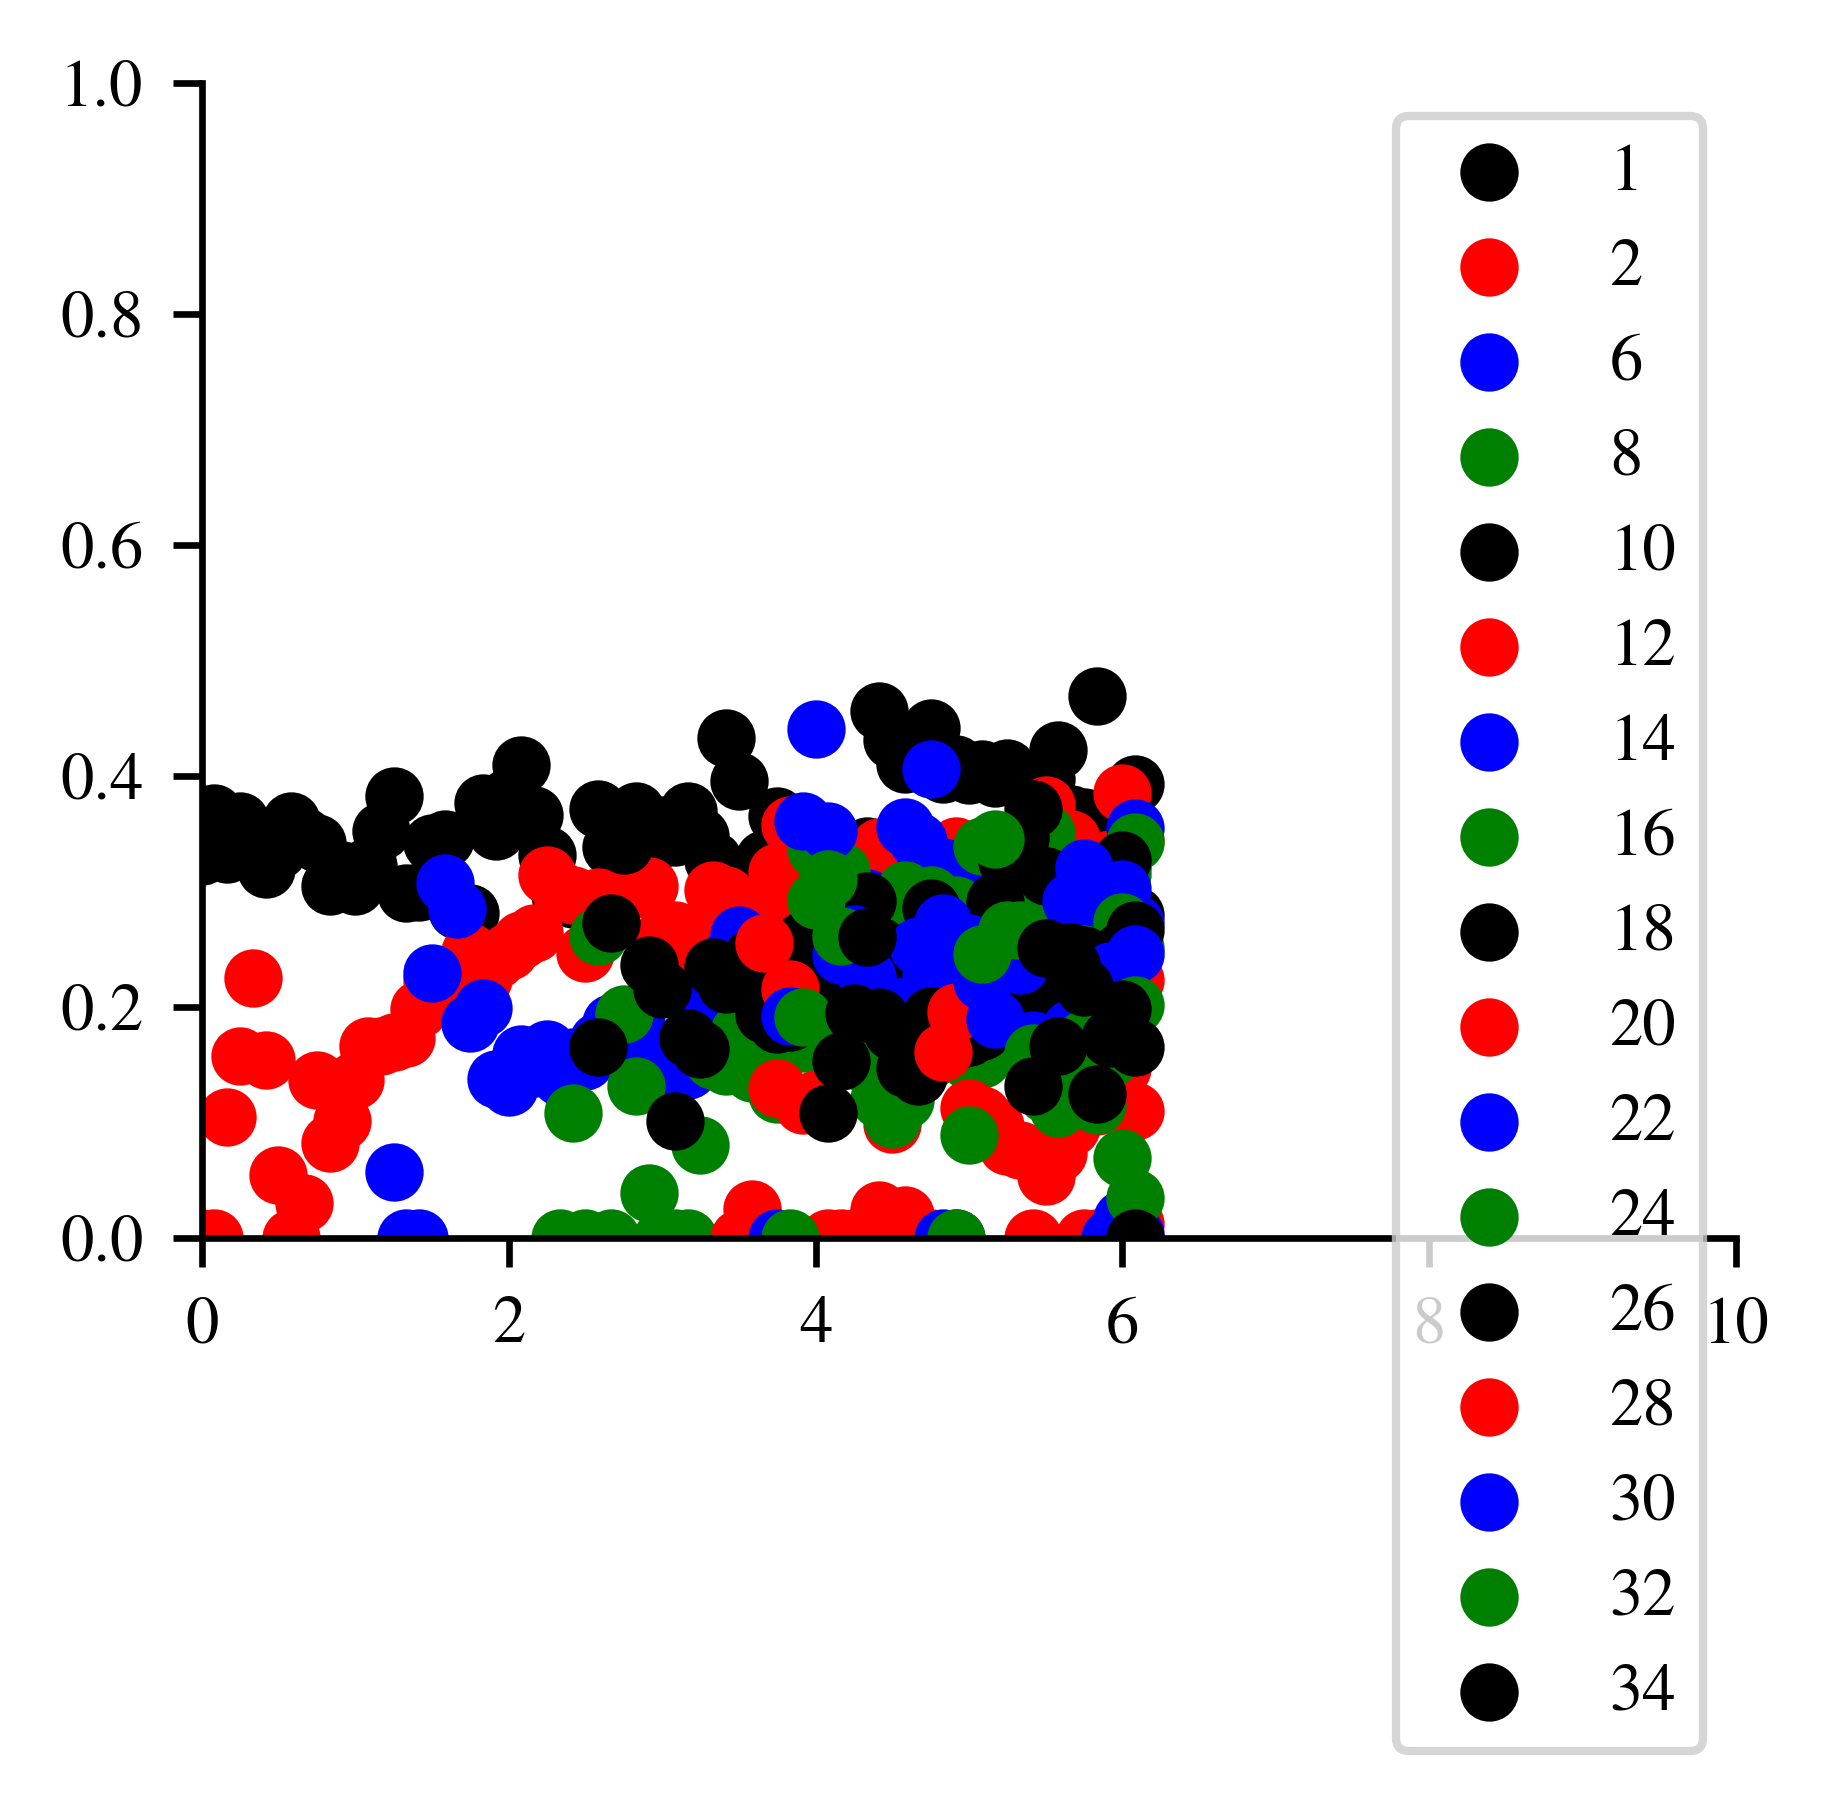

In [22]:
import scienceplots
plt.style.use('ieee')

fig,ax = plt.subplots()
for name, df in dataframes.items():

    print(f"DataFrame for {name}:")
    
    ax.scatter(np.array(range(74))*5/60,df["Vac_area"]/df["Cell_Area"],label=name)
    #ax.scatter(np.array(range(74))*5/60,df["Vac_area_relative"]/df["Relative_area"],label="Relative")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.xlim([0,10])
    plt.ylim([0,1])
    plt.savefig("vac_frac_all"+".tif",dpi=600)

In [21]:
import pandas as pd
from scipy import ndimage
#make masked vac time-series

#ROI1 mother

times=[0,115]



#noising
mu = 837.7
sigma = 7.76




    
vac_path = "/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/VacMaxProj_FOV2/"
roi_tuples = extract_roi_coordinates(roi_path+'ROIs'+'.zip')
l = len(roi_tuples)
    

#Go through ROI1


time=0

output = pd.DataFrame()
for k in range(0,116): #this range is the range of indices to get vac images of (see the FOV1.txt text file to find inforamtion)
    if k<10:
        

        

        if time<10:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother000'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI1/phase000"+str(time)+'.tif',-1)
        elif time<100:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother00'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI1/phase00"+str(time)+'.tif',-1)
        else:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother0'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI1/phase0"+str(time)+'.tif',-1)

        
        phase_array = np.array(phase_image)
        mask_array = np.array(mask_image)

        #Find cell sizes fo this time point from the masks
        cell_sizes = cell_size_extractor(mask_array)
        print(cell_sizes)
        mask_array[mask_array>0]=1
        kernel = np.ones((2,2),np.uint8)
        vac_mask = cv2.dilate(mask_array,kernel,iterations = 3)
        vac_mask_holes_filled=ndimage.binary_fill_holes(vac_mask).astype(int)
        roi_coordinates = roi_tuples[0][0]   #ROI1  therefor["0"][0]
        
        
        vac_img = cv2.imread(vac_path+"Vac000"+str(k)+".tif",-1)
        vac_cropped = np.array(crop_using_roi_tuple(roi_coordinates,np.array(vac_img)))
        vac_masked = np.multiply(mask_array,vac_cropped)
        vac_noised = noisify(vac_masked,mu,sigma)
        
        
        time+=1

    elif k<100:

        if time<10:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother000'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI1/phase000"+str(time)+'.tif',-1)
        elif time<100:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother00'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI1/phase00"+str(time)+'.tif',-1)
        else:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother0'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI1/phase0"+str(time)+'.tif',-1)

        
        phase_array = np.array(phase_image)
        mask_array = np.array(mask_image)

        #Find cell sizes fo this time point from the masks
        cell_sizes = cell_size_extractor(mask_array)
        print(cell_sizes)
        mask_array[mask_array>0]=1
        kernel = np.ones((2,2),np.uint8)
        vac_mask = cv2.dilate(mask_array,kernel,iterations = 3)
        vac_mask_holes_filled=ndimage.binary_fill_holes(vac_mask).astype(int)
        roi_coordinates = roi_tuples[0][0]   #ROI1  therefor["0"][0]
        
        
        vac_img = cv2.imread(vac_path+"Vac00"+str(k)+".tif",-1)
        vac_cropped = np.array(crop_using_roi_tuple(roi_coordinates,np.array(vac_img)))
        vac_masked = np.multiply(mask_array,vac_cropped)
        vac_noised = noisify(vac_masked,mu,sigma)
        
        
        time+=1
    else:

        if time<10:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother000'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI1/phase000"+str(time)+'.tif',-1)
        elif time<100:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother00'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI1/phase00"+str(time)+'.tif',-1)
        else:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother0'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI1/phase0"+str(time)+'.tif',-1)

        
        phase_array = np.array(phase_image)
        mask_array = np.array(mask_image)

        #Find cell sizes fo this time point from the masks
        cell_sizes = cell_size_extractor(mask_array)
        print(cell_sizes)
        mask_array[mask_array>0]=1
        kernel = np.ones((2,2),np.uint8)
        vac_mask = cv2.dilate(mask_array,kernel,iterations = 3)
        vac_mask_holes_filled=ndimage.binary_fill_holes(vac_mask).astype(int)
        roi_coordinates = roi_tuples[0][0]   #ROI1  therefor["0"][0]
        
        
        vac_img = cv2.imread(vac_path+"Vac0"+str(k)+".tif",-1)
        vac_cropped = np.array(crop_using_roi_tuple(roi_coordinates,np.array(vac_img)))
        vac_masked = np.multiply(mask_array,vac_cropped)
        vac_noised = noisify(vac_masked,mu,sigma)
        
        
        time+=1
    
    vac_noised=vac_noised.astype("uint16")
    # try:
    #     df_dictionary = pd.DataFrame([{"BudVol":cell_sizes[0],"MotherVol":cell_sizes[1]}])
    # except Exception as e:
    #     print(e)
    #     #df_dictionary = pd.DataFrame([{"BudVol":np.nan,"MotherVol":np.nan}])
    #output = pd.concat([output, df_dictionary], ignore_index=True)
    os.makedirs(f"{output_path}vac_series_roi1_mother/", exist_ok=True)
    os.makedirs(f"{output_path}vac_series_roi1_mother/phase/", exist_ok=True)
    
    imwrite(output_path+"vac_series_roi1_mother/"+str(time)+'.tif',vac_noised,dtype='uint16')
    imwrite(output_path+"vac_series_roi1_mother/phase/"+str(time)+'.tif',phase_array,dtype='uint16')

#output.to_csv(output_path+"vac_series_roi1_mother/"+"cell_sizes.csv")
        
        
        



[[18.143829694515553, 14.088683421902045, 197.0, 15085.454212678658], [28.205013446456448, 24.005733422104154, 530.0, 68083.97107220169]]
[[16.80009375557782, 13.903582657305616, 181.0, 13603.597101316062], [27.74939286780179, 24.17772763065677, 525.0, 67947.43338159841]]
[[17.919977738965926, 14.880526539049574, 207.0, 16621.2113783512], [27.950088311432726, 23.984979639520915, 524.0, 67352.00085142079]]
[[17.417489059226646, 14.59636560484464, 198.0, 15544.029846359044], [27.801025005459692, 24.00130525581429, 522.0, 67084.02908914423]]
[[17.535728725079174, 14.510237372767271, 198.0, 15465.41085264545], [28.414972853192122, 23.81227425031062, 530.0, 67489.71688163436]]
[[18.17311803000281, 15.755704846468575, 223.0, 18897.037703611288], [28.436759495324196, 24.318120065877398, 541.0, 70441.51875299936]]
[[18.844277557788594, 16.551911202773645, 244.0, 21625.4123460052], [28.675433877720824, 25.480748914205382, 572.0, 77987.13819128458]]
[[28.99121821715371, 26.245145034259245, 595.0

In [24]:
#Segmenting the vacuoles

#Segmenting the green vacuole hstacks

import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu,threshold_otsu
from skimage.filters import median
from skimage.morphology import disk

#os.mkdir(output_path+"/vac_series_roi1_mother/vac_otsu")

#Segment vacuoles using a Median filter followed by Otsu's thresholding
for i in range(116):
    f = cv2.imread(output_path+"/vac_series_roi1_mother/"+str(i+1)+".tif",-1)
    image = np.array(f)
    med = median(image, disk(4))
    thresholds = threshold_otsu(med)
    binary = med > thresholds
    binary = binary.astype('uint8') #step critical to be able to read the file later
    binary[binary>0] =1 
    imwrite(output_path+"/vac_series_roi1_mother/vac_otsu"+'/'+str(i+1)+'.tif', binary,dtype="uint8")



In [141]:
#mother - bud vac param extractor

#For strain SJSC33 - only volume extractor

def vac_param_extractor(mask_path,vacseg_path,vac_green_path):
    cleaned_mask = cv2.imread(mask_path,-1)
    cleaned_mask_arr = np.array(cleaned_mask)
    uniq = np.unique(cleaned_mask)
    if len(uniq)>2:
        a=np.array([cleaned_mask_arr==uniq[1]])
        b=np.array([cleaned_mask_arr==uniq[2]])

        if np.count_nonzero(a)>np.count_nonzero(b): # a is the mother
            cleaned_mask = cv2.imread(mask_path,-1)
            cleaned_mask_arr = np.array(cleaned_mask)
            mother_mask_arr = cleaned_mask_arr
            mother_mask_arr [mother_mask_arr==uniq[2]]=0


            cleaned_mask = cv2.imread(mask_path,-1)
            cleaned_mask_arr = np.array(cleaned_mask)
            bud_mask_arr = cleaned_mask_arr
            bud_mask_arr [bud_mask_arr==uniq[1]]=0

        else:
            cleaned_mask = cv2.imread(mask_path,-1) # a is bud
            cleaned_mask_arr = np.array(cleaned_mask)
            mother_mask_arr = cleaned_mask_arr
            mother_mask_arr [mother_mask_arr==uniq[1]]=0

            cleaned_mask = cv2.imread(mask_path,-1)
            cleaned_mask_arr = np.array(cleaned_mask)
            bud_mask_arr = cleaned_mask_arr
            bud_mask_arr [bud_mask_arr==uniq[2]]=0

    #cell masking vacuole images whose background has been removed by using mito segmentation as masks
        bud_mask_arr[bud_mask_arr>0]=1 #this is our bud mask
        mother_mask_arr[mother_mask_arr>0]=1 #this is our mother mask
        vac_segmented=np.array(cv2.imread(vacseg_path,-1))
        vac_segmented[vac_segmented>0]=1 #so we can use this as a mask without changing pixel values of the input image
        vac_noised_green = np.array(cv2.imread(vac_green_path,-1))


        mother_mask = mother_mask_arr
        bud_mask = bud_mask_arr

        # for i in range(60):
        #     mother_mask_hstack = np.hstack((mother_mask_hstack,mother_mask_arr))
        #     bud_mask_hstack = np.hstack((bud_mask_hstack,bud_mask_arr))    
        
        
        
        

        vac_segmented=np.array(cv2.imread(vacseg_path,-1))
        mother_vac_segmented = np.multiply(mother_mask,vac_segmented) #mother vac with zero background
        vac_segmented=np.array(cv2.imread(vacseg_path,-1))
        bud_vac_segmented = np.multiply(bud_mask,vac_segmented) #mother mito vac zero background
        mother_vac_noised_segmented = np.multiply(mother_vac_segmented,vac_noised_green)
        bud_vac_noised_segmented = np.multiply(bud_vac_segmented,vac_noised_green)

        non_zero_values = mother_vac_noised_segmented[mother_vac_noised_segmented != 0]
        if non_zero_values.size > 0:
            mother_median_intensity = np.median(non_zero_values)
        else:
            mother_median_intensity = 0  # or handle as needed

        non_zero_values = bud_vac_noised_segmented[bud_vac_noised_segmented != 0]
        if non_zero_values.size > 0:
            bud_median_intensity = np.median(non_zero_values)
        else:
            bud_median_intensity = 0  # or handle as needed
      

        return({'MotherVacVol':np.count_nonzero(mother_vac_segmented) , 'BudVacVol':np.count_nonzero(bud_vac_segmented),'MotherMedInt':mother_median_intensity,'BudMedInt':bud_median_intensity} )
    
    else: # Only mother present / G1 cells
        cleaned_mask = cv2.imread(mask_path,-1)
        cleaned_mask_arr = np.array(cleaned_mask)
        mother_mask_arr = cleaned_mask_arr
        mother_mask_arr[mother_mask_arr>0]=1 #this is our mother mask
        
        vac_segmented=np.array(cv2.imread(vacseg_path,-1)) #segmented vacuole
        vac_segmented[vac_segmented>0]=1 #so we can use this as a mask without changing pixel values of the input image        
        vac_noised_green = np.array(cv2.imread(vac_green_path,-1))
        
        #make a mother mask hstack with same dimensions as the vacuole hstack
        mother_mask = mother_mask_arr
        # for i in range(60):
        #     mother_mask_hstack = np.hstack((mother_mask_hstack,mother_mask_arr))

        mother_vac_segmented = np.multiply(mother_mask,vac_segmented) #mother vac with zero background

        
        mother_vac_noised_segmented = np.multiply(mother_vac_segmented,vac_noised_green) #mother vac with zero background



        non_zero_values = mother_vac_noised_segmented[mother_vac_noised_segmented != 0]
        if non_zero_values.size > 0:
            mother_median_intensity = np.median(non_zero_values)
        else:
            mother_median_intensity = 0  # or handle as needed

    
        return({'MotherVacVol':np.count_nonzero(mother_vac_segmented) , 'BudVacVol':0,'MotherMedInt':mother_median_intensity,'BudMedInt':0} )



In [93]:
#Extract cell size parameters using regionprops and vacuole size parameters using the above function and putting them in a CSV

import pandas as pd

#CSV files for cell and organelle params
cell_index = 0
output = pd.DataFrame()
for i in range(116):
    try:
        

        #Go through each timepoint
    
    
        #Bud and Mother Size Estimation and Extraction
        if i<10:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother000'+str(i)+'.tif',-1)
        elif i<100:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother00'+str(i)+'.tif',-1)
        else:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother0'+str(i)+'.tif',-1)

        mask_array = np.array(mask_image)
        regions = regionprops(mask_array)
        cell_size = []
        current_size = []
        for props in regions:
            y0, x0 = props.centroid
            orientation = props.orientation
            x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
            y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
            x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
            y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length
        
            minr, minc, maxr, maxc = props.bbox
            bx = (minc, maxc, maxc, minc, minc)
            by = (minr, minr, maxr, maxr, minr)
            current_size.append([props.major_axis_length,props.minor_axis_length])
        
        if len(current_size)==1:
            mother_major = current_size[0][0]
            mother_minor = current_size[0][1]
            bud_major = 0
            bud_minor = 0
        elif len(current_size)==2:
            if current_size[0][0]*current_size[0][1]>current_size[1][0]*current_size[1][1]:
                mother_major = current_size[0][0]
                mother_minor = current_size[0][1]
                bud_major = current_size[1][0]
                bud_minor = current_size[1][1]
            
            else:
                mother_major = current_size[1][0]
                mother_minor = current_size[1][1]
                bud_major = current_size[0][0]
                bud_minor = current_size[0][1]
        else:
            mother_major = np.nan
            mother_minor =np.nan
            bud_major = np.nan
            bud_minor = np.nan

        size_params = {"MotherMajor":mother_major,"MotherMinor":mother_minor,"BudMinor":bud_minor,"BudMajor":bud_major}

        #Bud and Mother Mito Size Estimation and Extraction
        if i<10:
            mask_path = "/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother000'+str(i)+'.tif'
        elif i<100:
            mask_path = "/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother00'+str(i)+'.tif'
        else:
            mask_path = "/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI1/Mother/"+'/mother0'+str(i)+'.tif'
        
        
        vacseg_path = output_path + "vac_series_roi1_mother/vac_otsu/" + str(i+1)+".tif"
        vac_green_path = output_path + "vac_series_roi1_mother/" + str(i+1)+".tif"
        vac_params = vac_param_extractor(mask_path,vacseg_path,vac_green_path)
        params = {**size_params,**vac_params}
        #print(output)
        df_dictionary = pd.DataFrame([params])
        output = pd.concat([output, df_dictionary], ignore_index=True)
        output.to_csv(str("mother_ROI1")+".csv")

                                
    except Exception as e:
        print(e)

(0.0, 30.0)

<Figure size 1980x1500 with 0 Axes>

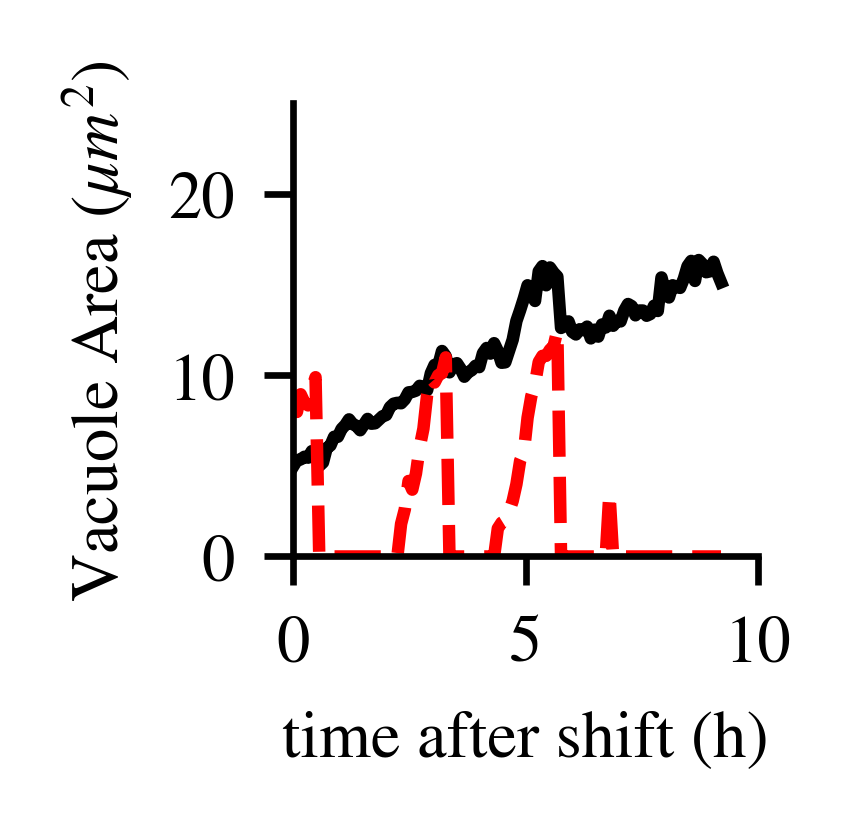

<Figure size 1980x1500 with 0 Axes>

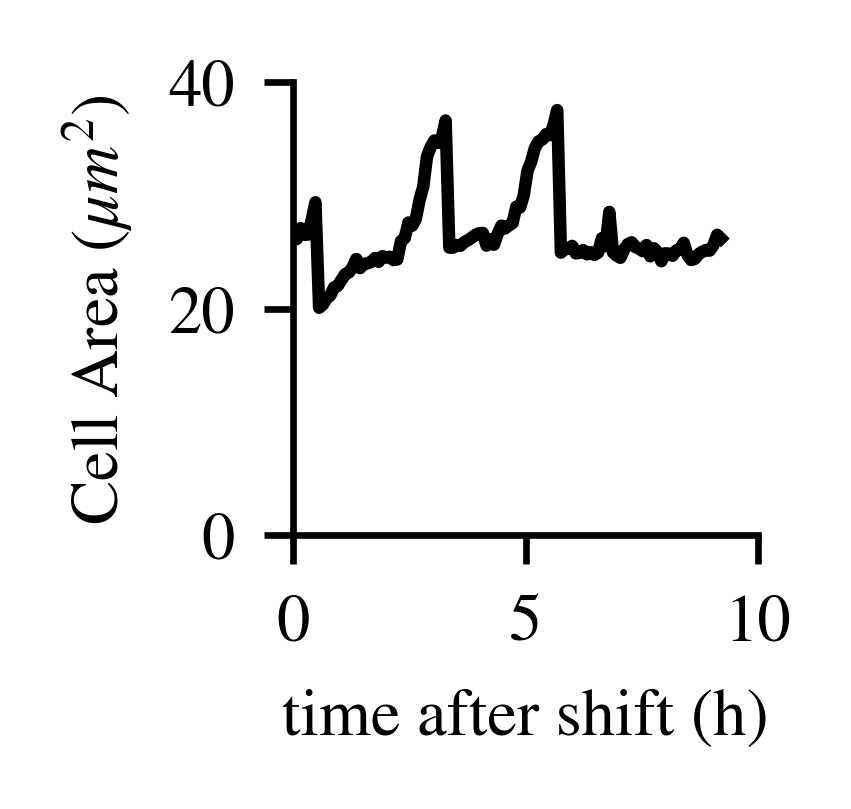

<Figure size 1980x1500 with 0 Axes>

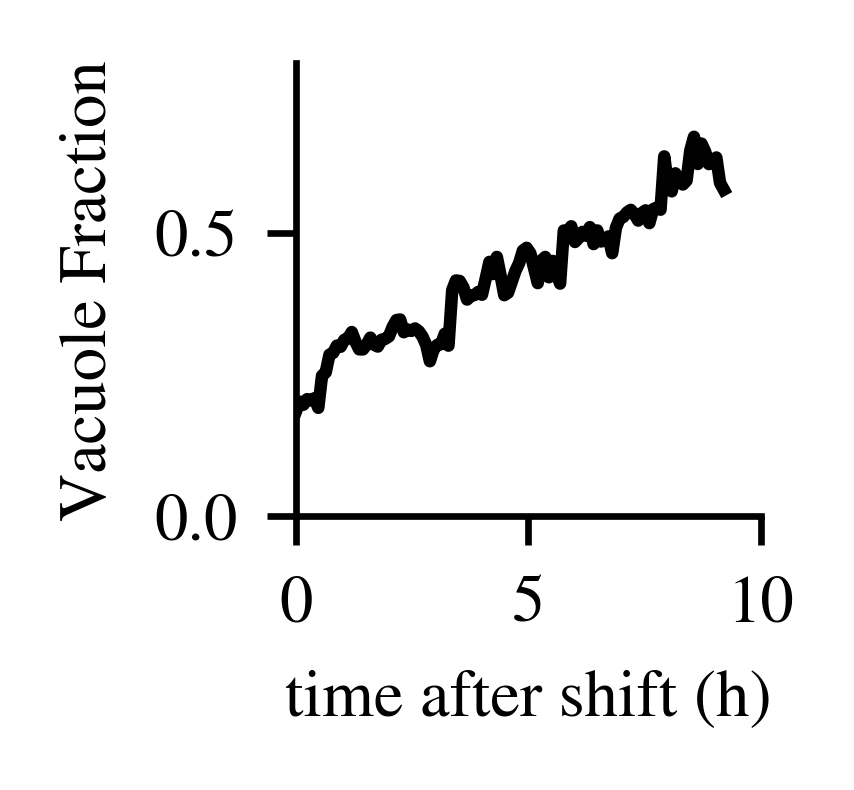

<Figure size 1980x1500 with 0 Axes>

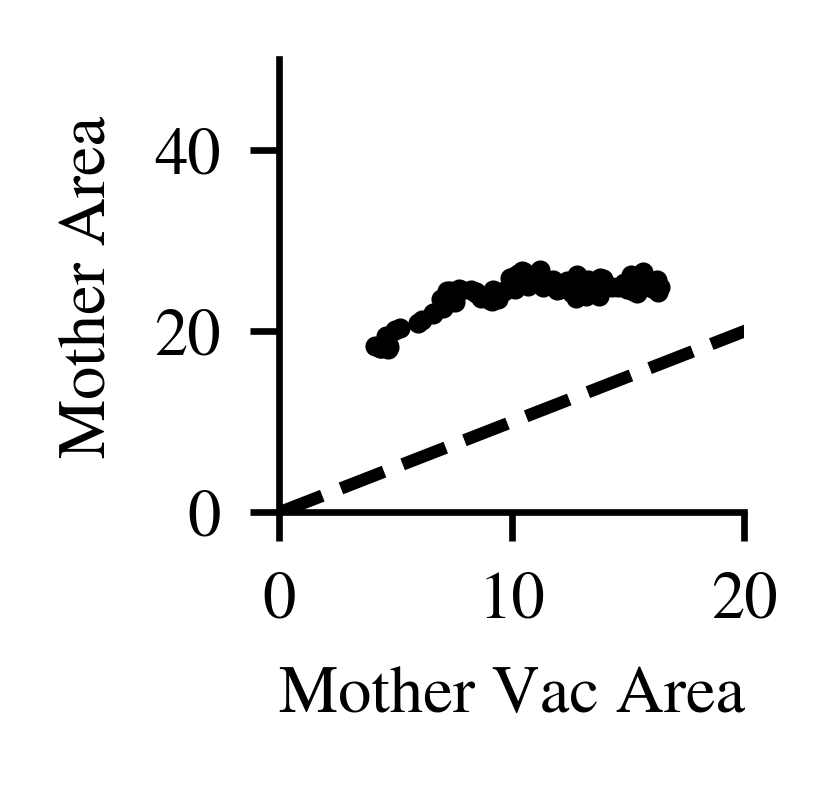

<Figure size 1980x1500 with 0 Axes>

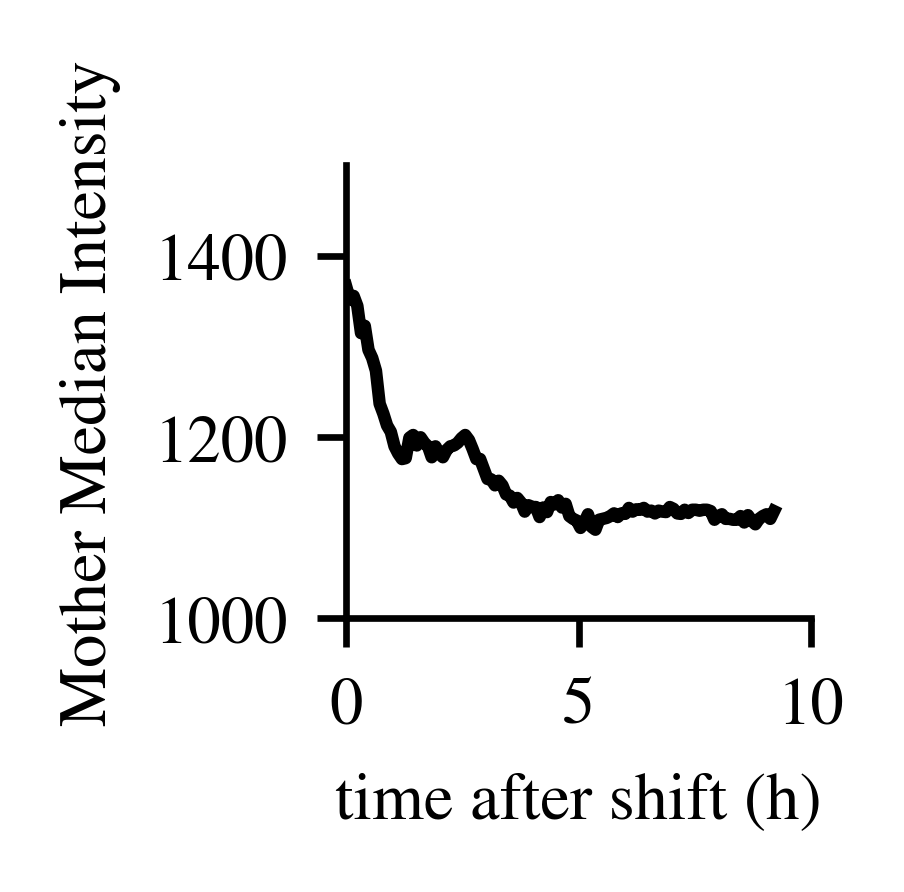

<Figure size 1980x1500 with 0 Axes>

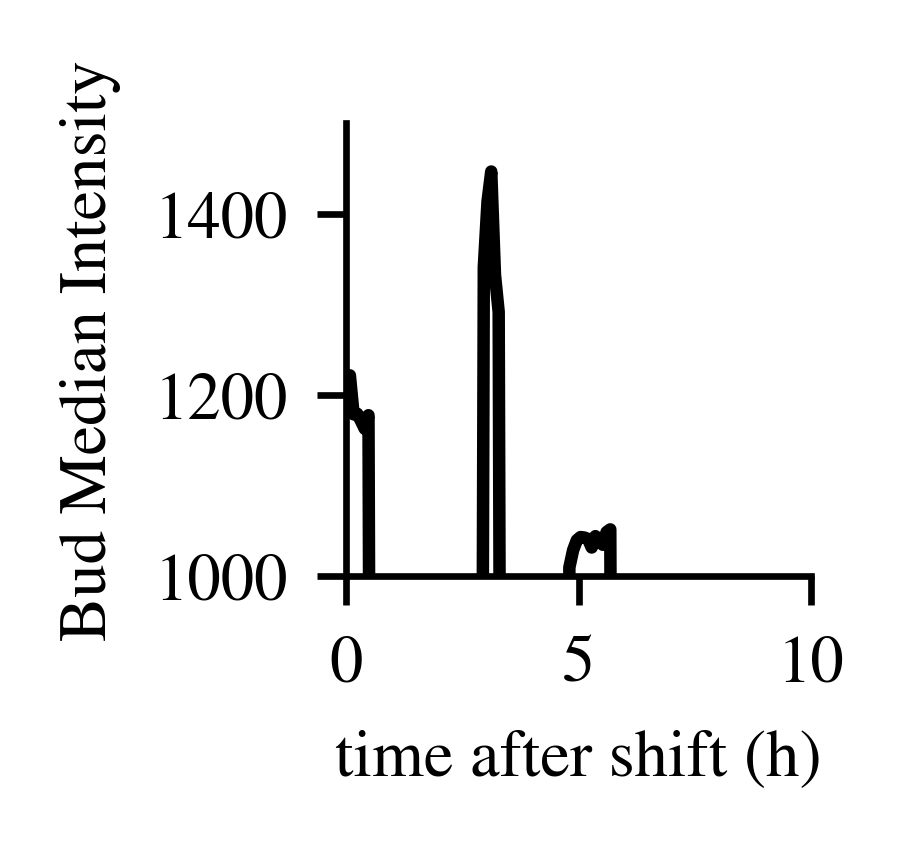

<Figure size 1980x1500 with 0 Axes>

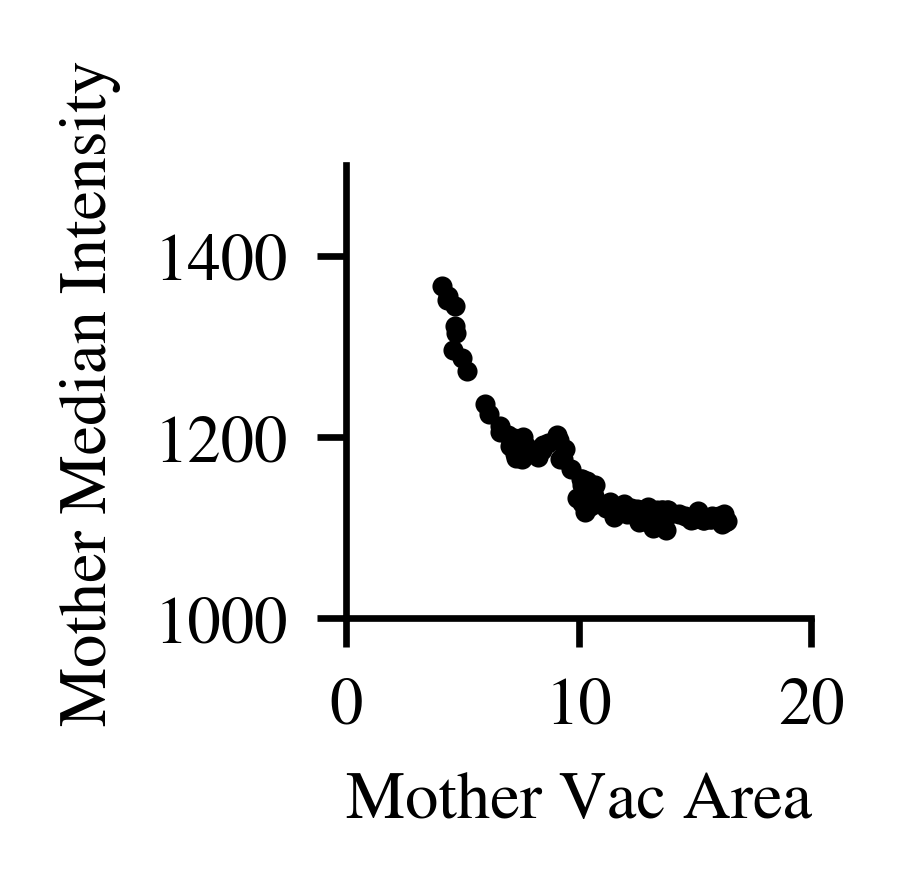

<Figure size 1980x1500 with 0 Axes>

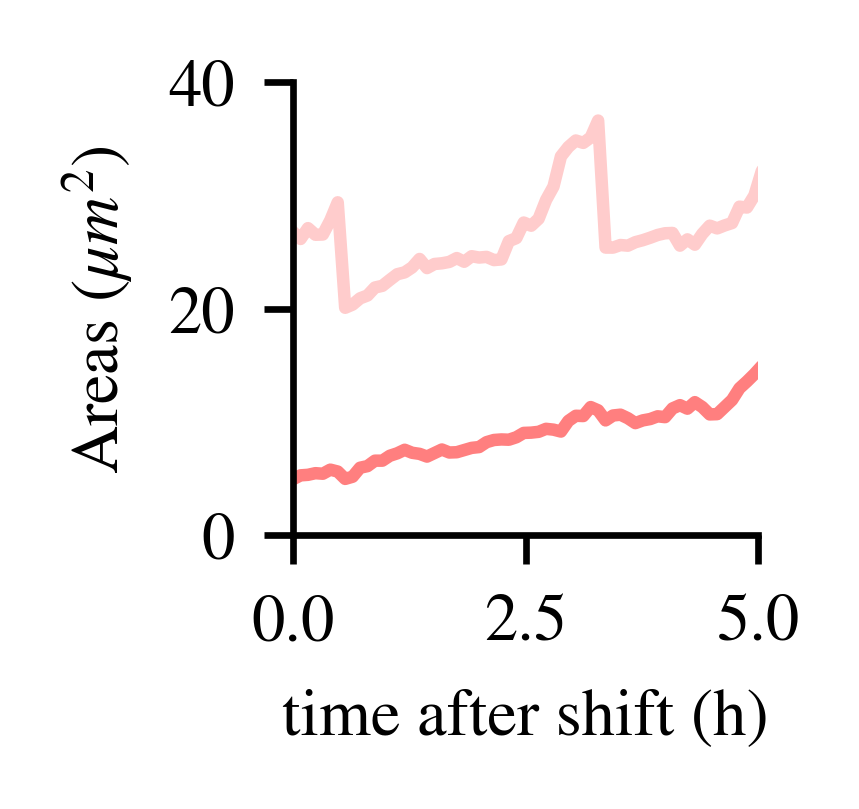

<Figure size 1980x1500 with 0 Axes>

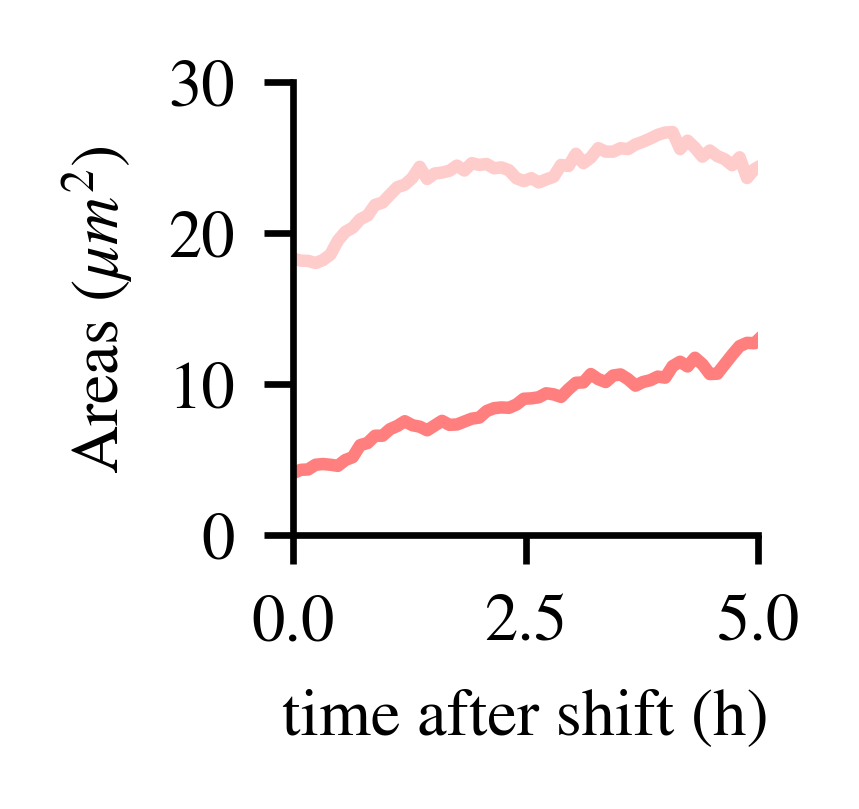

(0.0, 30.0)

<Figure size 1980x1500 with 0 Axes>

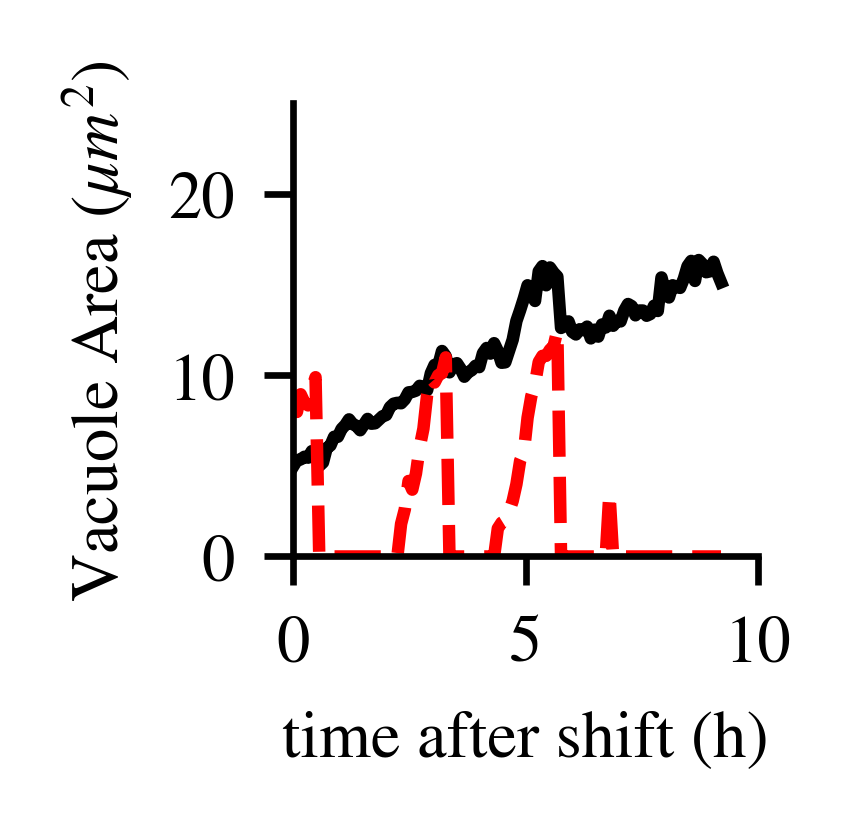

<Figure size 1980x1500 with 0 Axes>

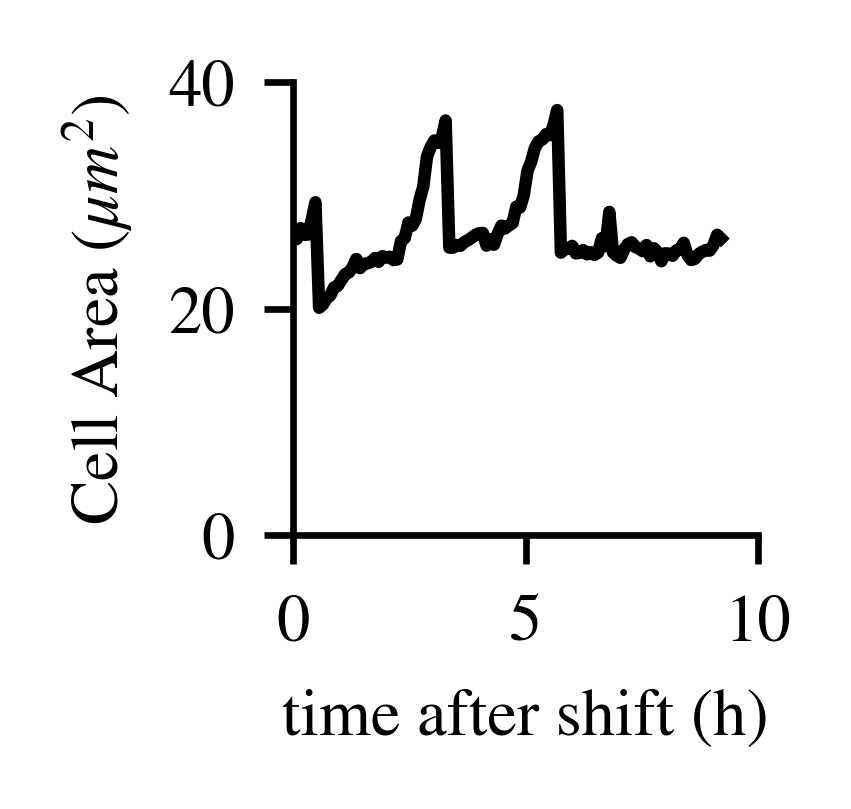

<Figure size 1980x1500 with 0 Axes>

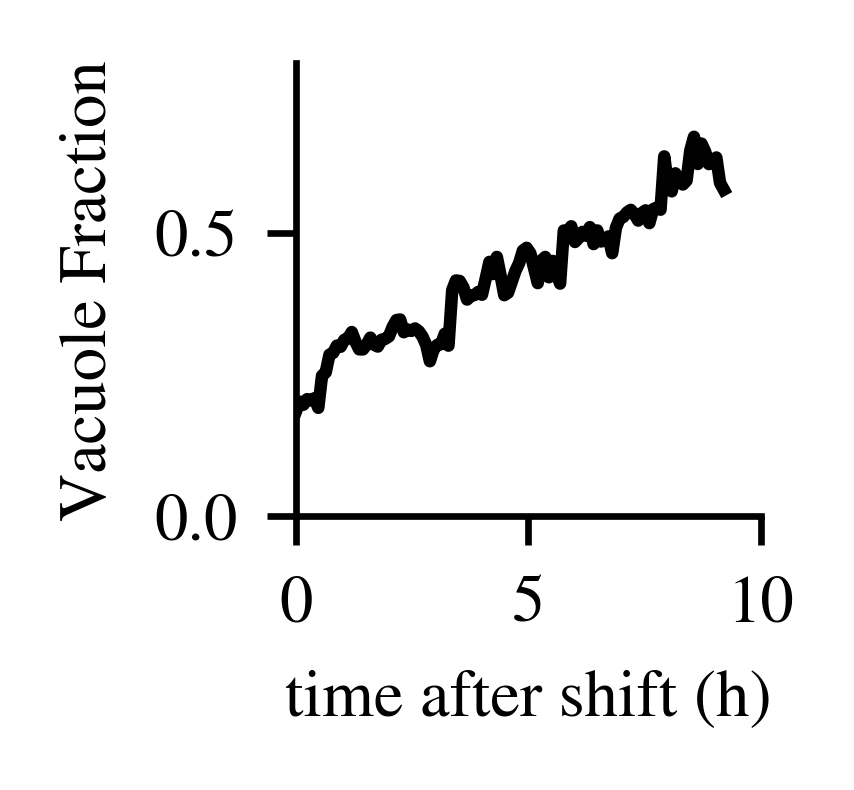

<Figure size 1980x1500 with 0 Axes>

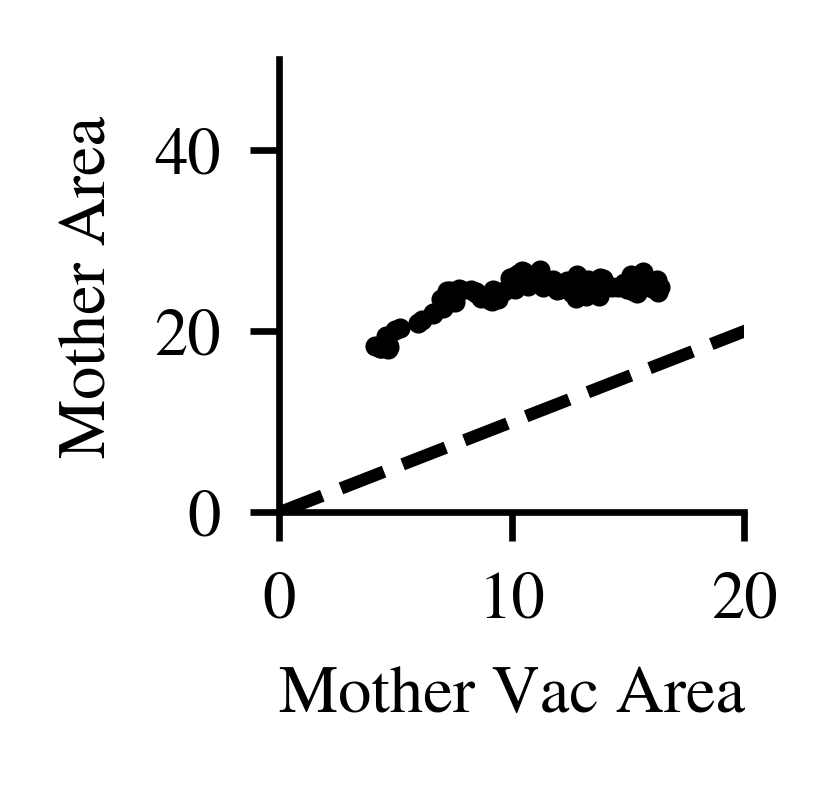

<Figure size 1980x1500 with 0 Axes>

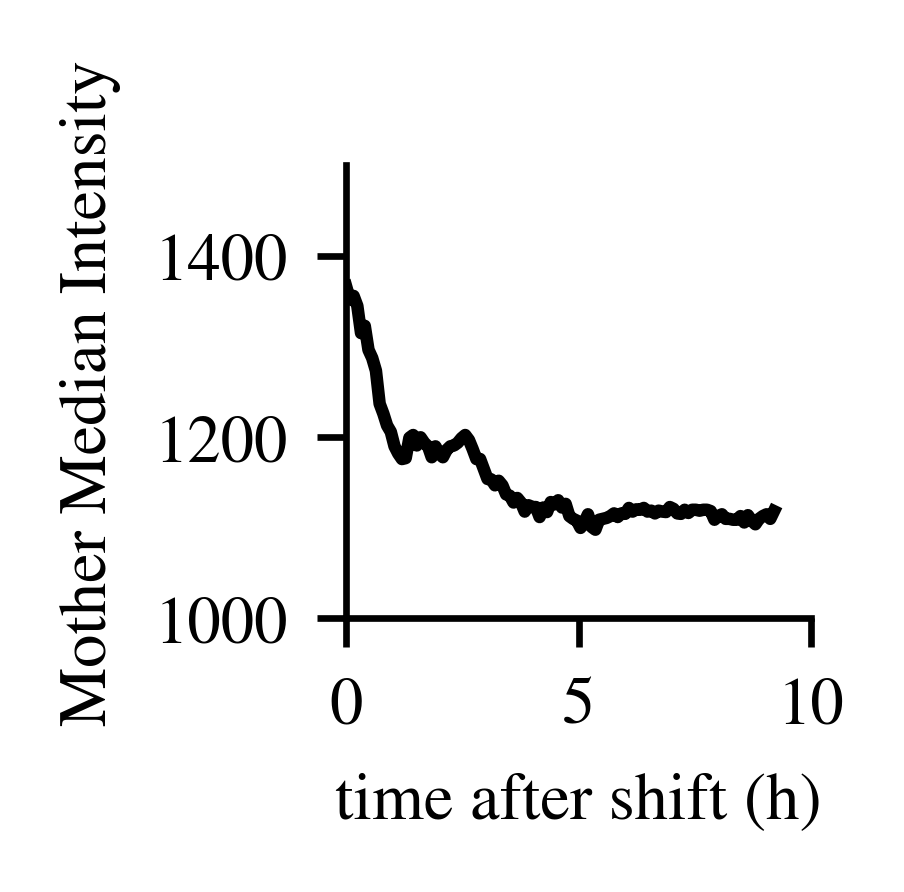

<Figure size 1980x1500 with 0 Axes>

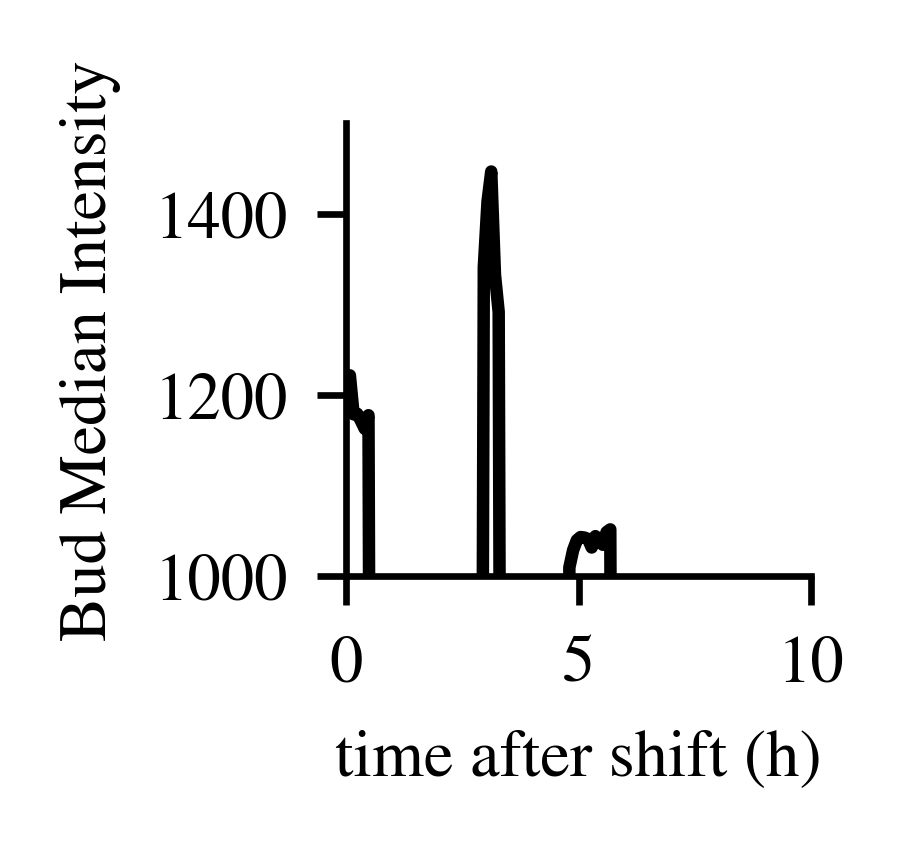

<Figure size 1980x1500 with 0 Axes>

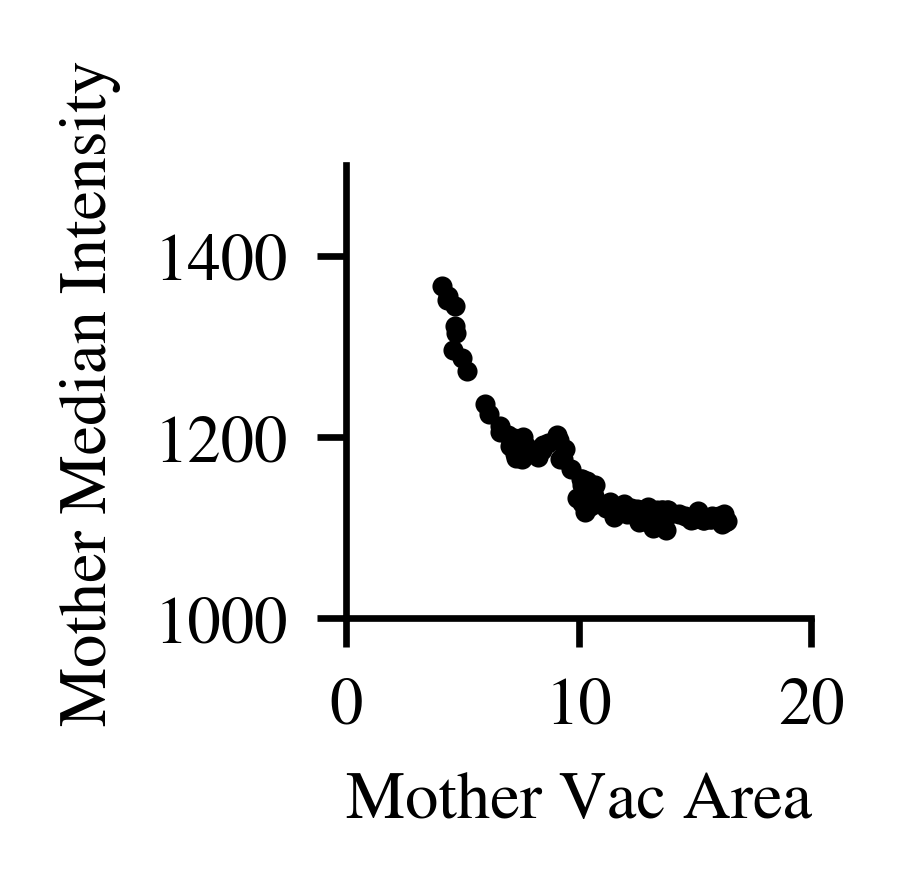

<Figure size 1980x1500 with 0 Axes>

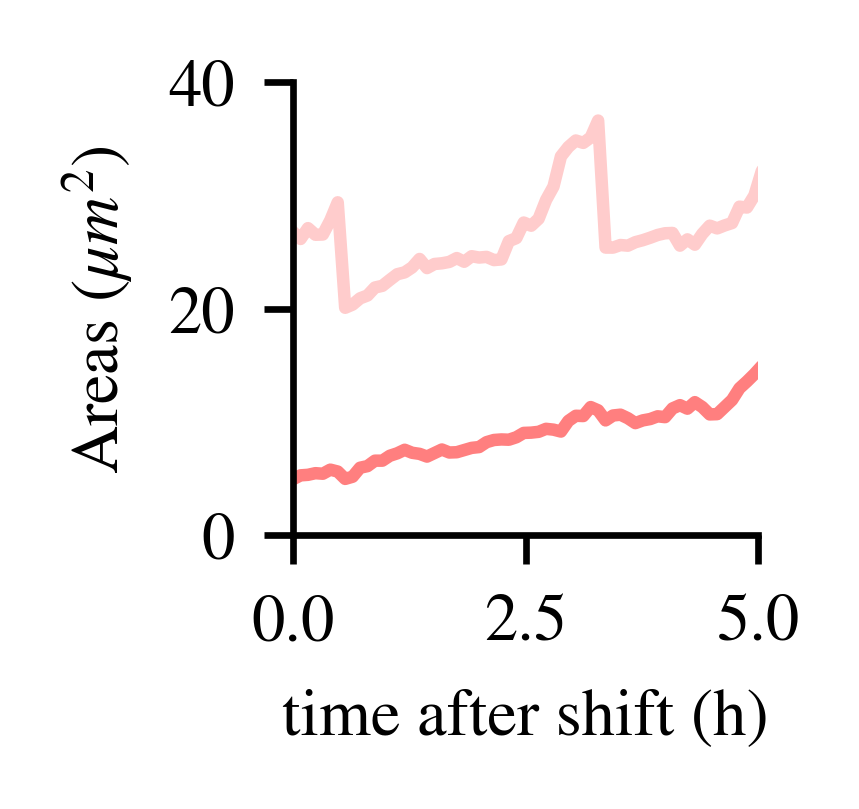

<Figure size 1980x1500 with 0 Axes>

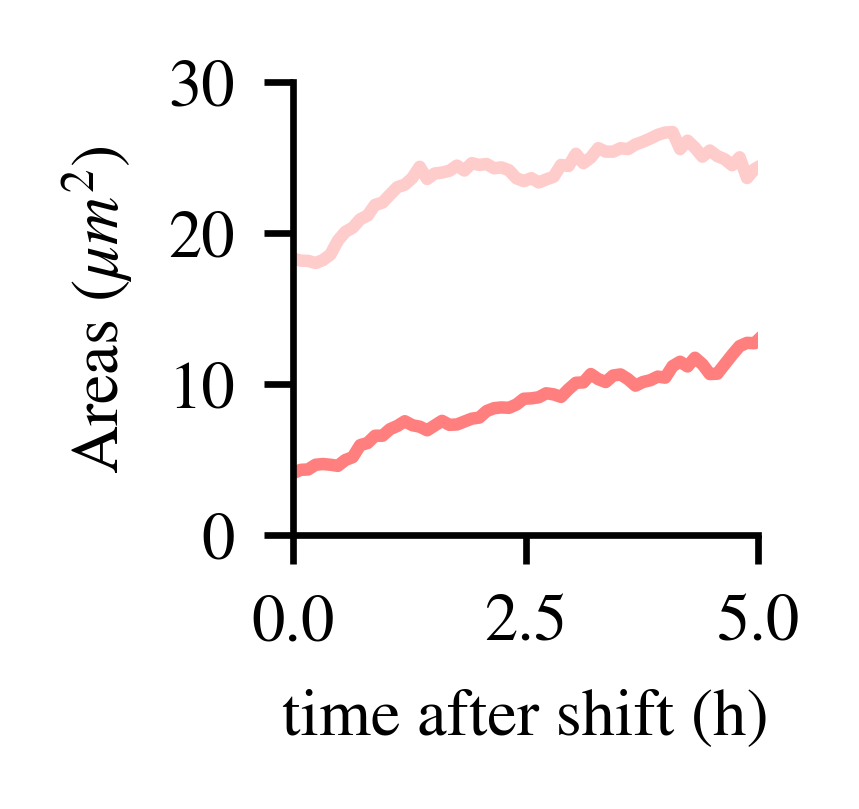

In [225]:
## Plotting data from the above CSVs
import scienceplots

plt.style.use("ieee")
df_mother_ROI1 =  pd.read_csv("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/Scripts/mother_ROI1.csv")
df_mother_ROI1["MotherArea"] = 1/4*np.pi*df_mother_ROI1.MotherMajor*df_mother_ROI1.MotherMinor*0.155*0.155 #pixel size corresponding to 2by2 Fire
df_mother_ROI1["BudArea"] = 1/4*np.pi*df_mother_ROI1.BudMajor*df_mother_ROI1.BudMinor*0.155*0.155 #pixel size corresponding to 2by2 Fire

df_mother_ROI1["VacFrac_Cell"] = ((df_mother_ROI1.MotherVacVol+df_mother_ROI1.BudVacVol)/(df_mother_ROI1.MotherArea+df_mother_ROI1.BudArea))*0.155*0.155
df_mother_ROI1['VacFrac_Mother'] = ((df_mother_ROI1.MotherVacVol)/(df_mother_ROI1.MotherArea))*0.155*0.155
df_mother_ROI1['VacFrac_Bud'] = ((df_mother_ROI1.BudVacVol)/(df_mother_ROI1.BudArea))*0.155*0.155

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherVacVol"]+df_mother_ROI1["BudVacVol"])*0.155*0.155)
ax.plot(np.array(range(116))*0.08,df_mother_ROI1["BudArea"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Vacuole Area ($\mu m^2$)")
plt.xlim([0,10])
plt.ylim([0,25])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.plot(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"]+df_mother_ROI1["BudArea"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Cell Area ($\mu m^2$)")
plt.xlim([0,10])
plt.ylim([0,40])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.plot(np.array(range(116))*0.08,df_mother_ROI1["VacFrac_Cell"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Vacuole Fraction")
plt.xlim([0,10])
plt.ylim([0,0.8])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.scatter((df_mother_ROI1["MotherVacVol"])*0.155*0.155,df_mother_ROI1["MotherArea"],s=2)
ax.plot(range(100),range(100),'--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Mother Vac Area")
plt.ylabel("Mother Area")
plt.xlim([0,20])
plt.ylim([0,50])


plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.plot(np.array(range(116))*0.08,df_mother_ROI1["MotherMedInt"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Mother Median Intensity")
plt.xlim([0,10])
plt.ylim([1000,1500])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.plot(np.array(range(116))*0.08,df_mother_ROI1["BudMedInt"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Bud Median Intensity")
plt.xlim([0,10])
plt.ylim([1000,1500])



plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.scatter(df_mother_ROI1["MotherVacVol"]*0.155*0.155,df_mother_ROI1["MotherMedInt"],s=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Mother Vac Area")
plt.ylabel("Mother Median Intensity")
plt.xlim([0,20])
plt.ylim([1000,1500])

#Cell and vac vol normalized
plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])

ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherVacVol"]+df_mother_ROI1["BudVacVol"])*0.155*0.155,'-',color='red',alpha=0.5,label="Mother")

ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherArea"]+df_mother_ROI1["BudArea"]),'-',color='red',alpha=0.2,label="Mother Vacuole")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Areas ($\mu m^2$)")
plt.xlim([0,5])
plt.ylim([0,40])

#Cell and vac vol normalized
plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])

ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherVacVol"])*0.155*0.155,'-',color='red',alpha=0.5,label="Mother")

ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherArea"]),'-',color='red',alpha=0.2,label="Mother Vacuole")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Areas ($\mu m^2$)")
plt.xlim([0,5])
plt.ylim([0,30])


In [ ]:
## Plotting data from the above CSVs
import scienceplots

plt.style.use("ieee")
df_mother_ROI1 =  pd.read_csv("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/Scripts/mother_ROI1.csv")
df_mother_ROI1["MotherArea"] = 1/4*np.pi*df_mother_ROI1.MotherMajor*df_mother_ROI1.MotherMinor*0.155*0.155 #pixel size corresponding to 2by2 Fire
df_mother_ROI1["BudArea"] = 1/4*np.pi*df_mother_ROI1.BudMajor*df_mother_ROI1.BudMinor*0.155*0.155 #pixel size corresponding to 2by2 Fire

df_mother_ROI1["VacFrac_Cell"] = ((df_mother_ROI1.MotherVacVol+df_mother_ROI1.BudVacVol)*0.155*0.155/(df_mother_ROI1.MotherArea+df_mother_ROI1.BudArea))
df_mother_ROI1['VacFrac_Mother'] = ((df_mother_ROI1.MotherVacVol)*0.155*0.155/(df_mother_ROI1.MotherArea))
df_mother_ROI1['VacFrac_Bud'] = ((df_mother_ROI1.BudVacVol)*0.155*0.155/(df_mother_ROI1.BudArea))

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherVacVol"]+df_mother_ROI1["BudVacVol"])*0.155*0.155)
ax.plot(np.array(range(116))*0.08,df_mother_ROI1["BudArea"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Vacuole Area ($\mu m^2$)")
plt.xlim([0,10])
plt.ylim([0,25])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.plot(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"]+df_mother_ROI1["BudArea"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Cell Area ($\mu m^2$)")
plt.xlim([0,10])
plt.ylim([0,40])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.plot(np.array(range(116))*0.08,df_mother_ROI1["VacFrac_Cell"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Vacuole Fraction")
plt.xlim([0,10])
plt.ylim([0,0.8])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.scatter((df_mother_ROI1["MotherVacVol"])*0.155*0.155,df_mother_ROI1["MotherArea"],s=2)
ax.plot(range(100),range(100),'--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Mother Vac Area")
plt.ylabel("Mother Area")
plt.xlim([0,20])
plt.ylim([0,50])


plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.plot(np.array(range(116))*0.08,df_mother_ROI1["MotherMedInt"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Mother Median Intensity")
plt.xlim([0,10])
plt.ylim([1000,1500])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.plot(np.array(range(116))*0.08,df_mother_ROI1["BudMedInt"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Bud Median Intensity")
plt.xlim([0,10])
plt.ylim([1000,1500])



plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.scatter(df_mother_ROI1["MotherVacVol"]*0.155*0.155,df_mother_ROI1["MotherMedInt"],s=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Mother Vac Area")
plt.ylabel("Mother Median Intensity")
plt.xlim([0,20])
plt.ylim([1000,1500])

#Cell and vac vol normalized
plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])

ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherVacVol"]+df_mother_ROI1["BudVacVol"])*0.155*0.155,'-',color='red',alpha=0.5,label="Mother")

ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherArea"]+df_mother_ROI1["BudArea"]),'-',color='red',alpha=0.2,label="Mother Vacuole")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Areas ($\mu m^2$)")
plt.xlim([0,5])
plt.ylim([0,40])

#Cell and vac vol normalized
plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])

ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherVacVol"])*0.155*0.155,'-',color='red',alpha=0.5,label="Mother")

ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherArea"]),'-',color='red',alpha=0.2,label="Mother Vacuole")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Areas ($\mu m^2$)")
plt.xlim([0,5])
plt.ylim([0,30])


In [102]:
#ROI2 mother


import pandas as pd
from scipy import ndimage
#make masked vac time-series

times=[0,115]



#noising
mu = 837.7
sigma = 7.76




    
vac_path = "/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/VacMaxProj_FOV2/"
roi_tuples = extract_roi_coordinates(roi_path+'ROIs'+'.zip')
l = len(roi_tuples)
    

#Go through ROI1


time=0

output = pd.DataFrame()
for k in range(0,216): #this range is the range of indices to get vac images of (see the FOV1.txt text file to find inforamtion)
    if k<10:
        

        

        if time<10:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/Mother/"+'/mother000'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI2/phase000"+str(time)+'.tif',-1)
        elif time<100:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/Mother/"+'/mother00'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI2/phase00"+str(time)+'.tif',-1)
        else:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/Mother/"+'/mother0'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI2/phase0"+str(time)+'.tif',-1)

        
        phase_array = np.array(phase_image)
        mask_array = np.array(mask_image)

        #Find cell sizes fo this time point from the masks
        cell_sizes = cell_size_extractor(mask_array)
        print(cell_sizes)
        mask_array[mask_array>0]=1
        kernel = np.ones((2,2),np.uint8)
        vac_mask = cv2.dilate(mask_array,kernel,iterations = 3)
        vac_mask_holes_filled=ndimage.binary_fill_holes(vac_mask).astype(int)
        roi_coordinates = roi_tuples[1][0]   #ROI1  therefor["0"][0]
        
        
        vac_img = cv2.imread(vac_path+"Vac000"+str(k)+".tif",-1)
        vac_cropped = np.array(crop_using_roi_tuple(roi_coordinates,np.array(vac_img)))
        vac_masked = np.multiply(mask_array,vac_cropped)
        vac_noised = noisify(vac_masked,mu,sigma)
        
        
        time+=1

    elif k<100:

        if time<10:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/Mother/"+'/mother000'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI2/phase000"+str(time)+'.tif',-1)
        elif time<100:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/Mother/"+'/mother00'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI2/phase00"+str(time)+'.tif',-1)
        else:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/Mother/"+'/mother0'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI2/phase0"+str(time)+'.tif',-1)

        
        phase_array = np.array(phase_image)
        mask_array = np.array(mask_image)

        #Find cell sizes fo this time point from the masks
        cell_sizes = cell_size_extractor(mask_array)
        print(cell_sizes)
        mask_array[mask_array>0]=1
        kernel = np.ones((2,2),np.uint8)
        vac_mask = cv2.dilate(mask_array,kernel,iterations = 3)
        vac_mask_holes_filled=ndimage.binary_fill_holes(vac_mask).astype(int)
        roi_coordinates = roi_tuples[1][0]   #ROI1  therefor["0"][0]
        
        
        vac_img = cv2.imread(vac_path+"Vac00"+str(k)+".tif",-1)
        vac_cropped = np.array(crop_using_roi_tuple(roi_coordinates,np.array(vac_img)))
        vac_masked = np.multiply(mask_array,vac_cropped)
        vac_noised = noisify(vac_masked,mu,sigma)
        
        
        time+=1
    else:

        if time<10:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/Mother/"+'/mother000'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI2/phase000"+str(time)+'.tif',-1)
        elif time<100:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/Mother/"+'/mother00'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI2/phase00"+str(time)+'.tif',-1)
        else:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/Mother/"+'/mother0'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI2/phase0"+str(time)+'.tif',-1)

        
        phase_array = np.array(phase_image)
        mask_array = np.array(mask_image)

        #Find cell sizes fo this time point from the masks
        cell_sizes = cell_size_extractor(mask_array)
        print(cell_sizes)
        mask_array[mask_array>0]=1
        kernel = np.ones((2,2),np.uint8)
        vac_mask = cv2.dilate(mask_array,kernel,iterations = 3)
        vac_mask_holes_filled=ndimage.binary_fill_holes(vac_mask).astype(int)
        roi_coordinates = roi_tuples[1][0]   #ROI1  therefor["0"][0]
        
        
        vac_img = cv2.imread(vac_path+"Vac0"+str(k)+".tif",-1)
        vac_cropped = np.array(crop_using_roi_tuple(roi_coordinates,np.array(vac_img)))
        vac_masked = np.multiply(mask_array,vac_cropped)
        vac_noised = noisify(vac_masked,mu,sigma)
        
        
        time+=1
    
    vac_noised=vac_noised.astype("uint16")
    # try:
    #     df_dictionary = pd.DataFrame([{"BudVol":cell_sizes[0],"MotherVol":cell_sizes[1]}])
    # except Exception as e:
    #     print(e)
    #     #df_dictionary = pd.DataFrame([{"BudVol":np.nan,"MotherVol":np.nan}])
    #output = pd.concat([output, df_dictionary], ignore_index=True)
    os.makedirs(f"{output_path}vac_series_roi2_mother/", exist_ok=True)
    os.makedirs(f"{output_path}vac_series_roi2_mother/phase/", exist_ok=True)
    
    imwrite(output_path+"vac_series_roi2_mother/"+str(time)+'.tif',vac_noised,dtype='uint16')
    imwrite(output_path+"vac_series_roi2_mother/phase/"+str(time)+'.tif',phase_array,dtype='uint16')

#output.to_csv(output_path+"vac_series_roi1_mother/"+"cell_sizes.csv")
        
        
        



[[25.859732333942226, 22.41167184265829, 454.0, 54407.79734529472]]
[[26.149494989488808, 22.24840395429962, 455.0, 54218.76709482132]]
[[25.75795183277563, 22.188179851678143, 446.0, 53118.1928121644]]
[[26.689112761283578, 22.550636242106904, 471.0, 56851.292793822526]]
[[26.259004618254334, 22.922942462759934, 471.0, 57797.30620988255]]
[[26.429763171490528, 22.756631982882045, 471.0, 57332.10047619035]]
[[26.355587637663525, 23.138552870834616, 478.0, 59106.290088111666]]
[[26.412528131901944, 23.26911812858611, 482.0, 59904.35972393485]]
[[26.425369107635657, 23.764990149602273, 492.0, 62515.102668558895]]
[[26.209685005307417, 22.67735229503475, 466.0, 56459.24999328053]]
[[26.750528843148558, 23.475531815350973, 492.0, 61752.11840419697]]
[[27.291934224608934, 24.59977575689097, 526.0, 69180.74295191314]]
[[27.265767670433544, 24.026827009625354, 514.0, 65932.44514980908]]
[[27.674200932979097, 24.371389336852847, 529.0, 68853.22303767144]]
[[27.661155655280755, 25.1203185961422

[ WARN:0@20783.021] imread_('/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/Mother//mother0210.tif'): can't open/read file: check file path/integrity
[ WARN:0@20783.021] imread_('/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI2/phase0210.tif'): can't open/read file: check file path/integrity


TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [103]:
#Segmenting the vacuoles

#Segmenting the green vacuole hstacks

import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu,threshold_otsu
from skimage.filters import median
from skimage.morphology import disk

os.mkdir(output_path+"/vac_series_roi2_mother/vac_otsu")

#Segment vacuoles using a Median filter followed by Otsu's thresholding
for i in range(210):
    f = cv2.imread(output_path+"/vac_series_roi2_mother/"+str(i+1)+".tif",-1)
    image = np.array(f)
    med = median(image, disk(4))
    thresholds = threshold_otsu(med)
    binary = med > thresholds
    binary = binary.astype('uint8') #step critical to be able to read the file later
    binary[binary>0] =1 
    imwrite(output_path+"/vac_series_roi2_mother/vac_otsu"+'/'+str(i+1)+'.tif', binary,dtype="uint8")



In [143]:
#Extract cell size parameters using regionprops and vacuole size parameters using the above function and putting them in a CSV

import pandas as pd

#CSV files for cell and organelle params
cell_index = 0
output = pd.DataFrame()
for i in range(210):
    try:
        

        #Go through each timepoint
    
    
        #Bud and Mother Size Estimation and Extraction
        if i<10:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/mother/"+'/mother000'+str(i)+'.tif',-1)
        elif i<100:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/mother/"+'/mother00'+str(i)+'.tif',-1)
        else:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/mother/"+'/mother0'+str(i)+'.tif',-1)

        mask_array = np.array(mask_image)
        regions = regionprops(mask_array)
        cell_size = []
        current_size = []
        for props in regions:
            y0, x0 = props.centroid
            orientation = props.orientation
            x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
            y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
            x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
            y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length
        
            minr, minc, maxr, maxc = props.bbox
            bx = (minc, maxc, maxc, minc, minc)
            by = (minr, minr, maxr, maxr, minr)
            current_size.append([props.major_axis_length,props.minor_axis_length])
        
        if len(current_size)==1:
            mother_major = current_size[0][0]
            mother_minor = current_size[0][1]
            bud_major = 0
            bud_minor = 0
        elif len(current_size)==2:
            if current_size[0][0]*current_size[0][1]>current_size[1][0]*current_size[1][1]:
                mother_major = current_size[0][0]
                mother_minor = current_size[0][1]
                bud_major = current_size[1][0]
                bud_minor = current_size[1][1]
            
            else:
                mother_major = current_size[1][0]
                mother_minor = current_size[1][1]
                bud_major = current_size[0][0]
                bud_minor = current_size[0][1]
        else:
            mother_major = np.nan
            mother_minor =np.nan
            bud_major = np.nan
            bud_minor = np.nan

        size_params = {"MotherMajor":mother_major,"MotherMinor":mother_minor,"BudMinor":bud_minor,"BudMajor":bud_major}

        #Bud and Mother Mito Size Estimation and Extraction
        if i<10:
            mask_path = "/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/mother/"+'/mother000'+str(i)+'.tif'
        elif i<100:
            mask_path = "/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/mother/"+'/mother00'+str(i)+'.tif'
        else:
            mask_path = "/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI2/mother/"+'/mother0'+str(i)+'.tif'
        
        
        vacseg_path = output_path + "vac_series_roi2_mother/vac_otsu/" + str(i+1)+".tif"
        vac_green_path = output_path + "vac_series_roi2_mother/" + str(i+1)+".tif"
        vac_params = vac_param_extractor(mask_path,vacseg_path,vac_green_path)
        params = {**size_params,**vac_params}
        #print(output)
        df_dictionary = pd.DataFrame([params])
        output = pd.concat([output, df_dictionary], ignore_index=True)
        output.to_csv(str("mother_ROI2")+".csv")

                                
    except Exception as e:
        print(e)

(0.0, 50.0)

<Figure size 1980x1500 with 0 Axes>

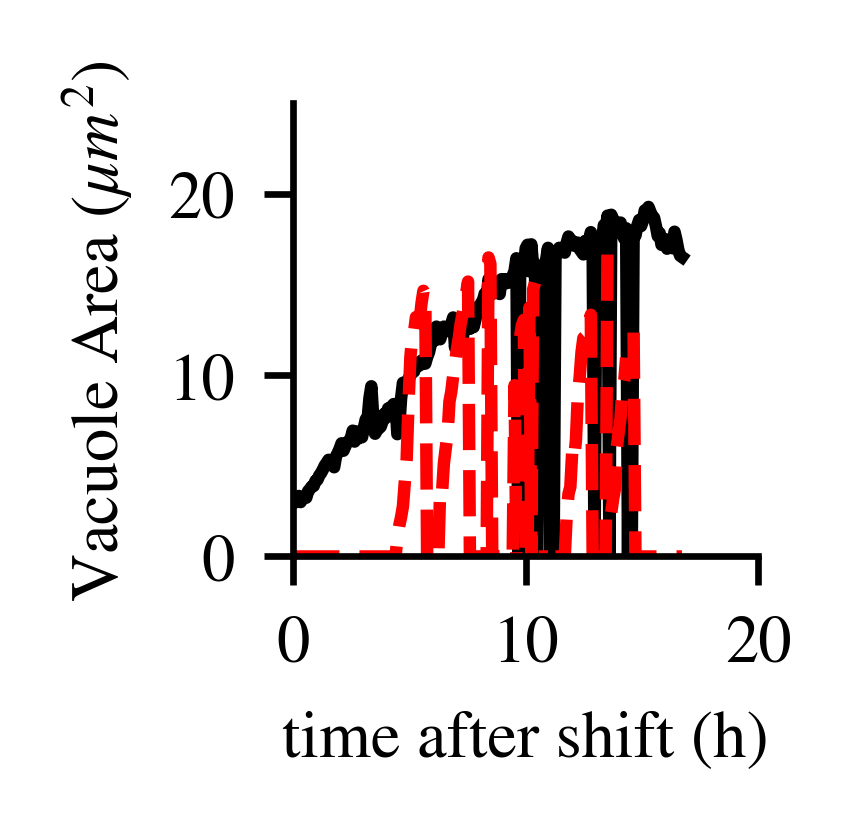

<Figure size 1980x1500 with 0 Axes>

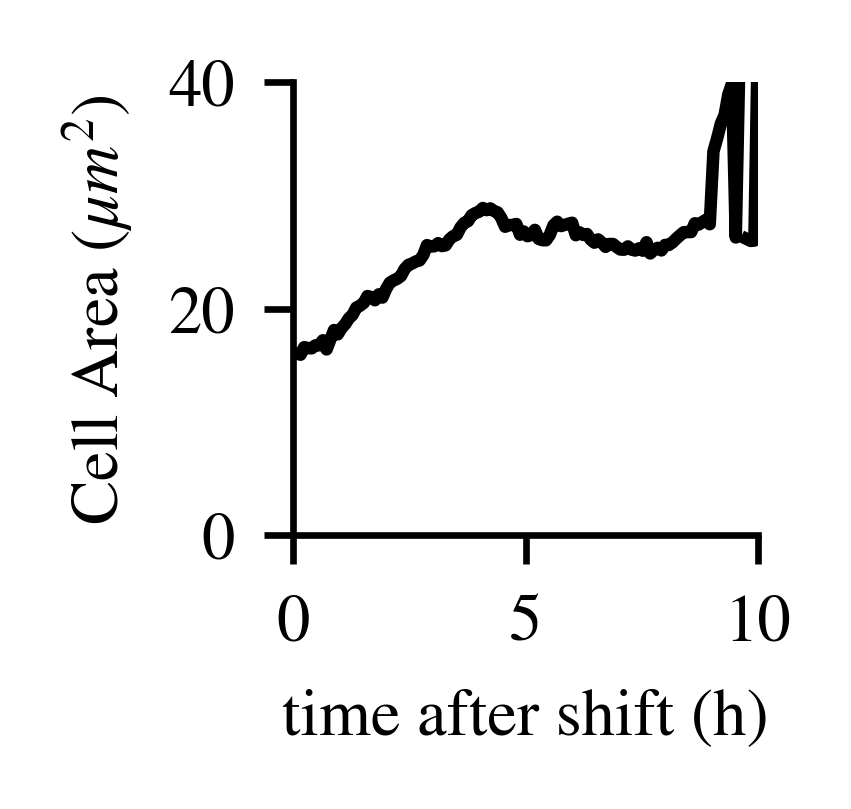

<Figure size 1980x1500 with 0 Axes>

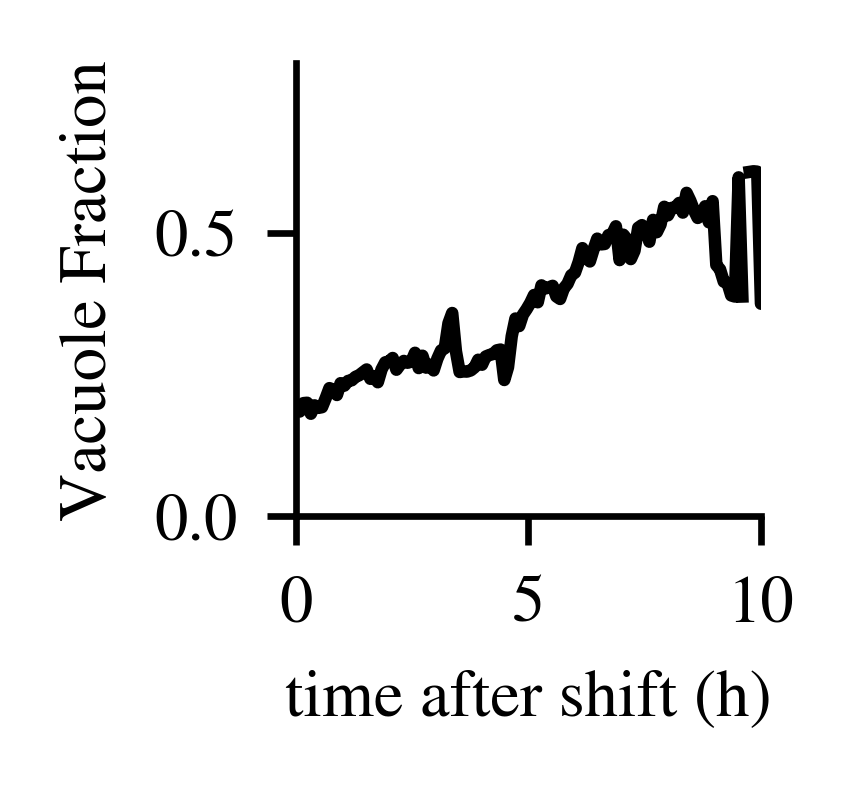

<Figure size 1980x1500 with 0 Axes>

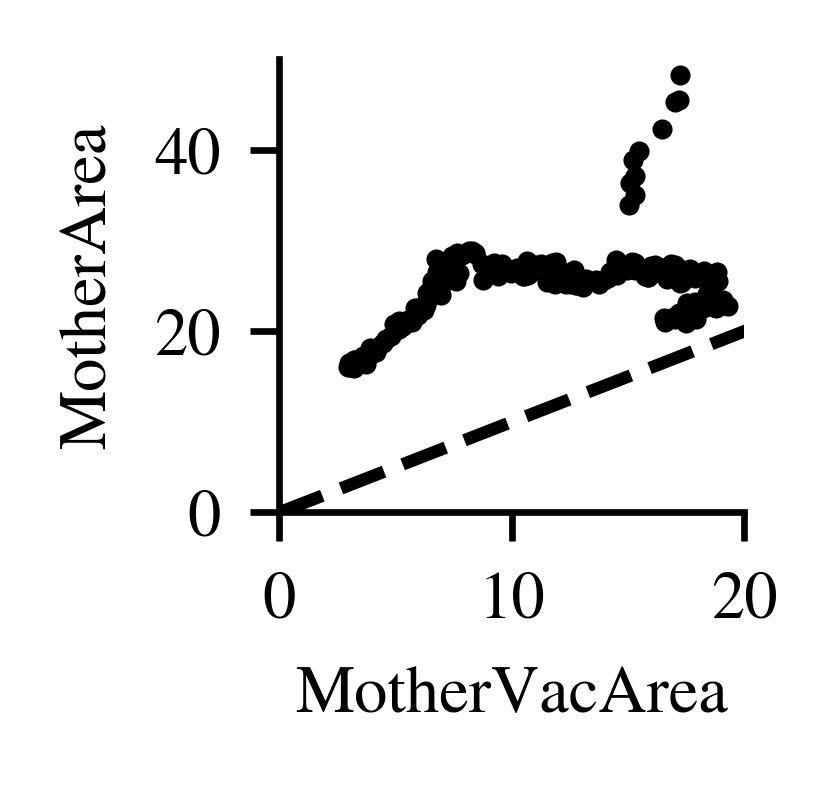

<Figure size 1980x1500 with 0 Axes>

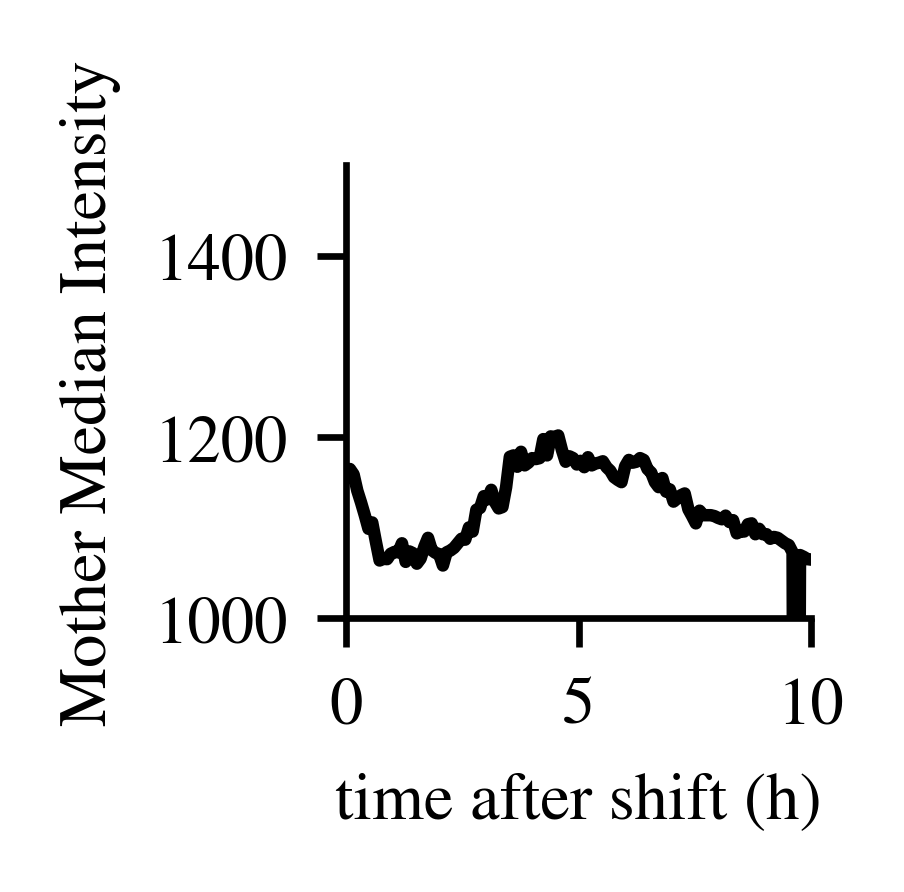

<Figure size 1980x1500 with 0 Axes>

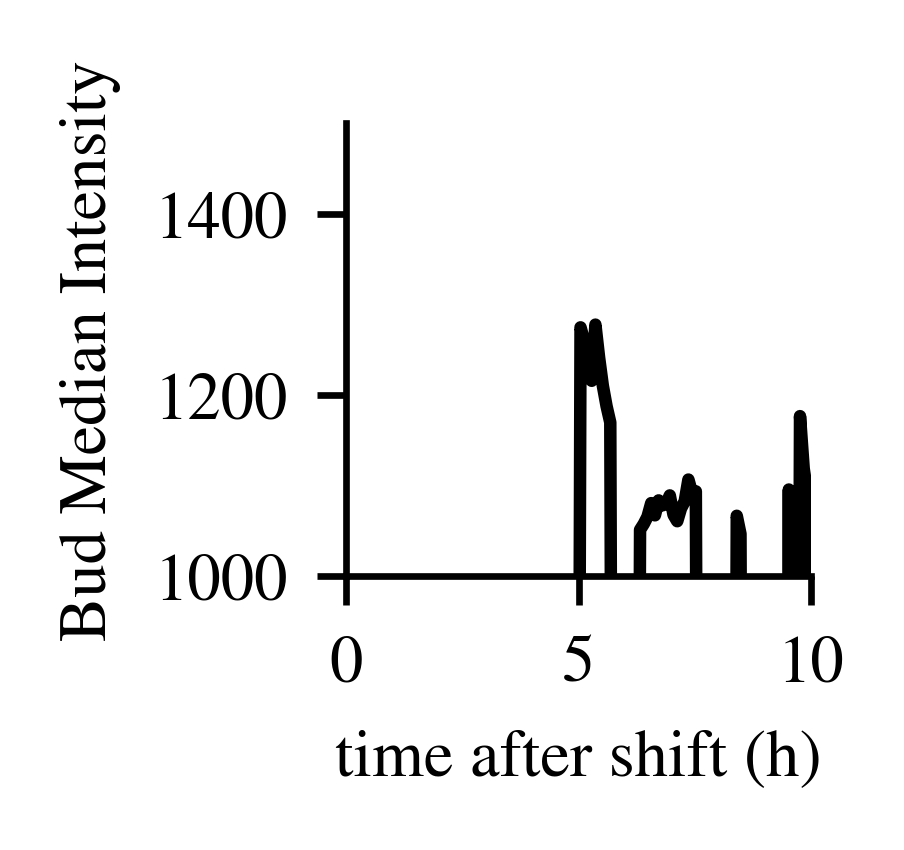

<Figure size 1980x1500 with 0 Axes>

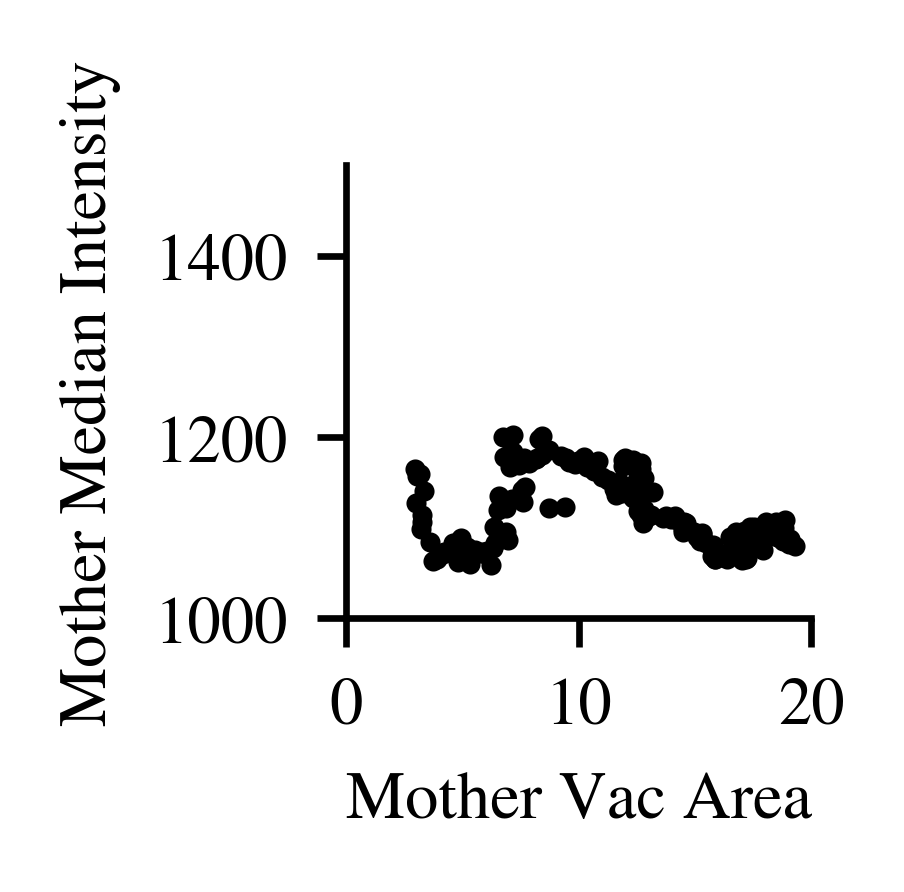

<Figure size 1980x1500 with 0 Axes>

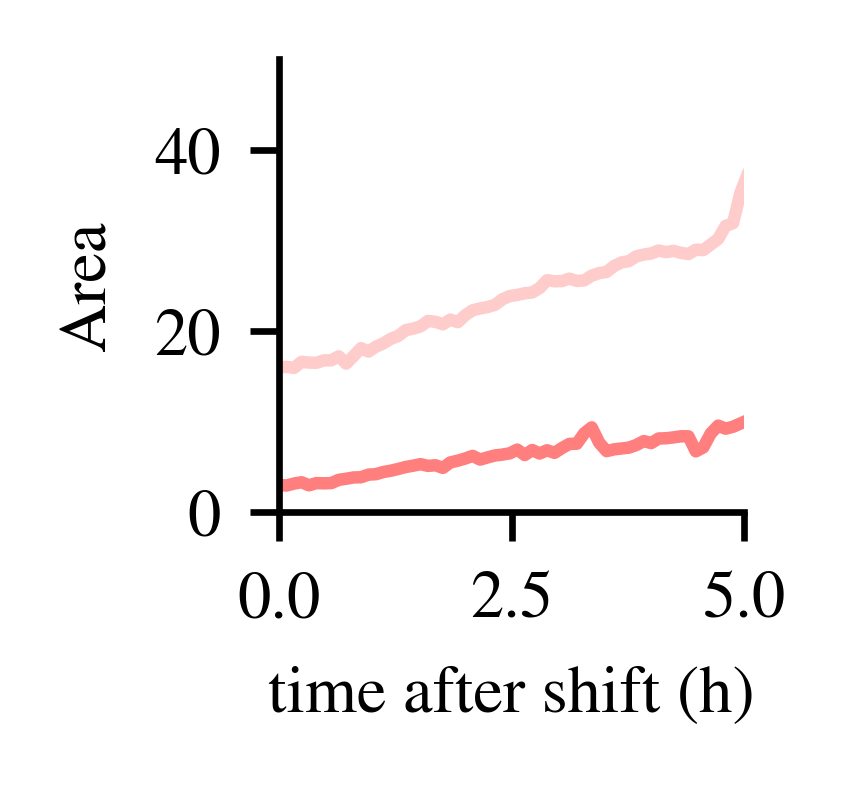

<Figure size 1980x1500 with 0 Axes>

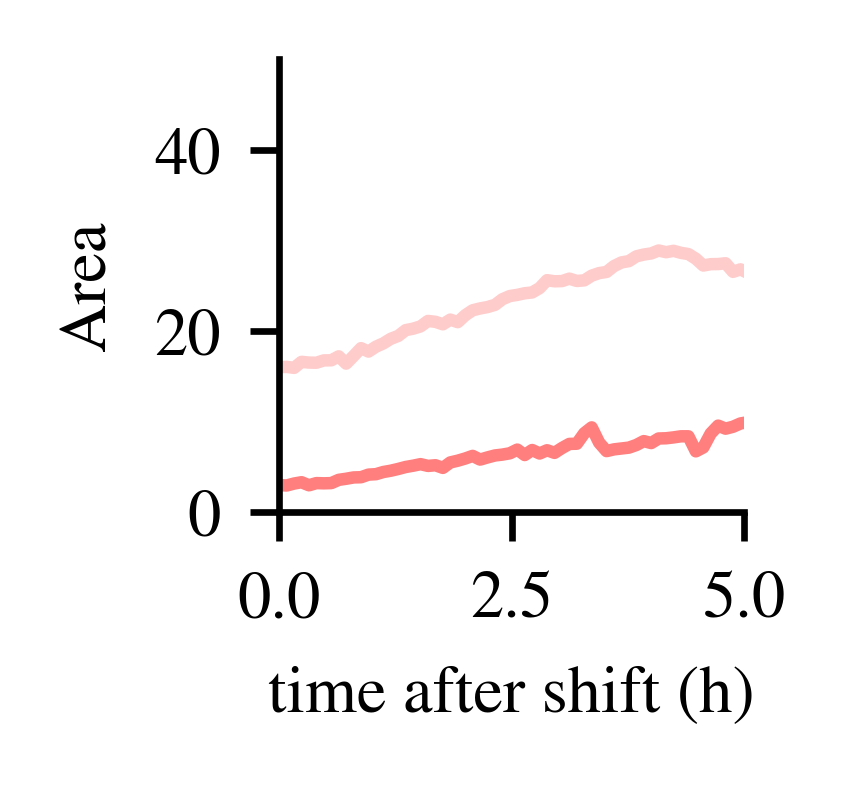

In [204]:
## Plotting data from the above CSVs
import scienceplots

plt.style.use("ieee")
df_mother_ROI2 =  pd.read_csv("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/Scripts/mother_ROI2.csv")
df_mother_ROI2["MotherArea"] = 1/4*np.pi*df_mother_ROI2.MotherMajor*df_mother_ROI2.MotherMinor*0.155*0.155 #pixel size corresponding to 2by2 Fire
df_mother_ROI2["BudArea"] = 1/4*np.pi*df_mother_ROI2.BudMajor*df_mother_ROI2.BudMinor*0.155*0.155 #pixel size corresponding to 2by2 Fire

df_mother_ROI2["VacFrac_Cell"] = ((df_mother_ROI2.MotherVacVol+df_mother_ROI2.BudVacVol)/(df_mother_ROI2.MotherArea+df_mother_ROI2.BudArea))*0.155*0.155
df_mother_ROI2['VacFrac_Mother'] = ((df_mother_ROI2.MotherVacVol)/(df_mother_ROI2.MotherArea))*0.155*0.155
df_mother_ROI2['VacFrac_Bud'] = ((df_mother_ROI2.BudVacVol)/(df_mother_ROI2.BudArea))*0.155*0.155

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.plot(np.array(range(210))*0.08,(df_mother_ROI2["MotherVacVol"])*0.155*0.155)
ax.plot(np.array(range(210))*0.08,df_mother_ROI2["BudArea"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Vacuole Area ($\mu m^2$)")
plt.xlim([0,20])
plt.ylim([0,25])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.plot(np.array(range(210))*0.08,df_mother_ROI2["MotherArea"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Cell Area ($\mu m^2$)")
plt.xlim([0,10])
plt.ylim([0,40])




plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.plot(np.array(range(210))*0.08,df_mother_ROI2["VacFrac_Mother"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Vacuole Fraction")
plt.xlim([0,10])
plt.ylim([0,0.8])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.scatter(df_mother_ROI2["MotherVacVol"]*0.155*0.155,df_mother_ROI2["MotherArea"],s=2)
ax.plot(range(100),range(100),'--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("MotherVacArea")
plt.ylabel("MotherArea")
plt.xlim([0,20])
plt.ylim([0,50])


plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.plot(np.array(range(210))*0.08,df_mother_ROI2["MotherMedInt"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Mother Median Intensity")
plt.xlim([0,10])
plt.ylim([1000,1500])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.plot(np.array(range(210))*0.08,df_mother_ROI2["BudMedInt"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Bud Median Intensity")
plt.xlim([0,10])
plt.ylim([1000,1500])



plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.scatter(df_mother_ROI2["MotherVacVol"]*0.155*0.155,df_mother_ROI2["MotherMedInt"],s=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Mother Vac Area")
plt.ylabel("Mother Median Intensity")
plt.xlim([0,20])
plt.ylim([1000,1500])


#Cell and vac vol normalized
plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])

ax.plot(np.array(range(210))*0.08,(df_mother_ROI2["MotherVacVol"]+df_mother_ROI2["BudVacVol"])*0.155*0.155,'-',color='red',alpha=0.5,label="Mother")

ax.plot(np.array(range(210))*0.08,(df_mother_ROI2["MotherArea"]+df_mother_ROI2["BudArea"]),'-',color='red',alpha=0.2,label="Mother Vacuole")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Area")
plt.xlim([0,5])
plt.ylim([0,50])


#Cell and vac vol normalized
plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])

ax.plot(np.array(range(210))*0.08,(df_mother_ROI2["MotherVacVol"])*0.155*0.155,'-',color='red',alpha=0.5,label="Mother")

ax.plot(np.array(range(210))*0.08,(df_mother_ROI2["MotherArea"]),'-',color='red',alpha=0.2,label="Mother Vacuole")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Area")
plt.xlim([0,5])
plt.ylim([0,50])


In [118]:
#ROI2 mother


import pandas as pd
from scipy import ndimage
#make masked vac time-series

times=[0,120]



#noising
mu = 837.7
sigma = 7.76




    
vac_path = "/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/VacMaxProj_FOV2/"
roi_tuples = extract_roi_coordinates(roi_path+'ROIs'+'.zip')
l = len(roi_tuples)
    

#Go through ROI1


time=0

output = pd.DataFrame()
for k in range(0,120): #this range is the range of indices to get vac images of (see the FOV1.txt text file to find inforamtion)
    if k<10:
        

        

        if time<10:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother000'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI3/phase000"+str(time)+'.tif',-1)
        elif time<100:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother00'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI3/phase00"+str(time)+'.tif',-1)
        else:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother0'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI3/phase0"+str(time)+'.tif',-1)

        
        phase_array = np.array(phase_image)
        mask_array = np.array(mask_image)

        #Find cell sizes fo this time point from the masks
        cell_sizes = cell_size_extractor(mask_array)
        print(cell_sizes)
        mask_array[mask_array>0]=1
        kernel = np.ones((2,2),np.uint8)
        vac_mask = cv2.dilate(mask_array,kernel,iterations = 3)
        vac_mask_holes_filled=ndimage.binary_fill_holes(vac_mask).astype(int)
        roi_coordinates = roi_tuples[2][0]   #ROI1  therefor["0"][0]
        
        
        vac_img = cv2.imread(vac_path+"Vac000"+str(k)+".tif",-1)
        vac_cropped = np.array(crop_using_roi_tuple(roi_coordinates,np.array(vac_img)))
        vac_masked = np.multiply(mask_array,vac_cropped)
        vac_noised = noisify(vac_masked,mu,sigma)
        
        
        time+=1

    elif k<100:

        if time<10:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother000'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI3/phase000"+str(time)+'.tif',-1)
        elif time<100:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother00'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI3/phase00"+str(time)+'.tif',-1)
        else:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother0'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI3/phase0"+str(time)+'.tif',-1)

        
        phase_array = np.array(phase_image)
        mask_array = np.array(mask_image)

        #Find cell sizes fo this time point from the masks
        cell_sizes = cell_size_extractor(mask_array)
        print(cell_sizes)
        mask_array[mask_array>0]=1
        kernel = np.ones((2,2),np.uint8)
        vac_mask = cv2.dilate(mask_array,kernel,iterations = 3)
        vac_mask_holes_filled=ndimage.binary_fill_holes(vac_mask).astype(int)
        roi_coordinates = roi_tuples[2][0]   #ROI1  therefor["0"][0]
        
        
        vac_img = cv2.imread(vac_path+"Vac00"+str(k)+".tif",-1)
        vac_cropped = np.array(crop_using_roi_tuple(roi_coordinates,np.array(vac_img)))
        vac_masked = np.multiply(mask_array,vac_cropped)
        vac_noised = noisify(vac_masked,mu,sigma)
        
        
        time+=1
    else:

        if time<10:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother000'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI3/phase000"+str(time)+'.tif',-1)
        elif time<100:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother00'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI3/phase00"+str(time)+'.tif',-1)
        else:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother0'+str(time)+'.tif',-1)
            phase_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cropped_phase/ROI3/phase0"+str(time)+'.tif',-1)

        
        phase_array = np.array(phase_image)
        mask_array = np.array(mask_image)

        #Find cell sizes fo this time point from the masks
        cell_sizes = cell_size_extractor(mask_array)
        print(cell_sizes)
        mask_array[mask_array>0]=1
        kernel = np.ones((2,2),np.uint8)
        vac_mask = cv2.dilate(mask_array,kernel,iterations = 3)
        vac_mask_holes_filled=ndimage.binary_fill_holes(vac_mask).astype(int)
        roi_coordinates = roi_tuples[2][0]   #ROI1  therefor["0"][0]
        
        
        vac_img = cv2.imread(vac_path+"Vac0"+str(k)+".tif",-1)
        vac_cropped = np.array(crop_using_roi_tuple(roi_coordinates,np.array(vac_img)))
        vac_masked = np.multiply(mask_array,vac_cropped)
        vac_noised = noisify(vac_masked,mu,sigma)
        
        
        time+=1
    
    vac_noised=vac_noised.astype("uint16")
    # try:
    #     df_dictionary = pd.DataFrame([{"BudVol":cell_sizes[0],"MotherVol":cell_sizes[1]}])
    # except Exception as e:
    #     print(e)
    #     #df_dictionary = pd.DataFrame([{"BudVol":np.nan,"MotherVol":np.nan}])
    #output = pd.concat([output, df_dictionary], ignore_index=True)
    os.makedirs(f"{output_path}vac_series_roi3_mother/", exist_ok=True)
    os.makedirs(f"{output_path}vac_series_roi3_mother/phase/", exist_ok=True)
    
    imwrite(output_path+"vac_series_roi3_mother/"+str(time)+'.tif',vac_noised,dtype='uint16')
    imwrite(output_path+"vac_series_roi3_mother/phase/"+str(time)+'.tif',phase_array,dtype='uint16')

#output.to_csv(output_path+"vac_series_roi1_mother/"+"cell_sizes.csv")
        
        
        



[[26.549618732563875, 25.37612219332483, 528.0, 71613.9142403086], [5.460024892577854, 4.168408350009653, 16.0, 397.39623330818205]]
[[26.458695940495456, 25.577301380807025, 531.0, 72504.75452130384], [8.166878177488876, 5.354009958280237, 34.0, 980.6251694310383]]
[[26.309504766760767, 25.510460150595932, 527.0, 71719.60141938849], [8.570150181594936, 7.140652801000583, 47.0, 1830.428948821322]]
[[26.61358787609132, 25.377728028982553, 530.0, 71795.54791092906], [8.355396290976326, 6.046443287059911, 39.0, 1279.545193615397]]
[[26.78115392586346, 25.798051737705173, 542.0, 74660.64090854362], [10.081275320867219, 7.0169489384053305, 54.0, 2079.221308471054]]
[[27.130694088390552, 25.08349187719474, 534.0, 71503.20405912162], [10.765515193930478, 8.97158657036366, 74.0, 3629.626456542989]]
[[27.110080766300452, 25.209852652617734, 536.0, 72170.55338114825], [10.46420664006725, 9.527135318227186, 76.0, 3978.502030130012]]
[[27.32173427850486, 25.293184682338005, 542.0, 73215.6466946923

In [124]:
#Segmenting the vacuoles

#Segmenting the green vacuole hstacks

import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu,threshold_otsu
from skimage.filters import median
from skimage.morphology import disk

#os.mkdir(output_path+"/vac_series_roi3_mother/vac_otsu")

#Segment vacuoles using a Median filter followed by Otsu's thresholding
for i in range(120):
    f = cv2.imread(output_path+"/vac_series_roi3_mother/"+str(i+1)+".tif",-1)
    image = np.array(f)
    med = median(image, disk(4))
    thresholds = threshold_otsu(med)
    binary = med > thresholds
    binary = binary.astype('uint8') #step critical to be able to read the file later
    binary[binary>0] =1 
    imwrite(output_path+"/vac_series_roi3_mother/vac_otsu"+'/'+str(i+1)+'.tif', binary,dtype="uint8")



In [126]:
#Extract cell size parameters using regionprops and vacuole size parameters using the above function and putting them in a CSV

import pandas as pd

#CSV files for cell and organelle params
cell_index = 0
output = pd.DataFrame()
for i in range(120):
    try:
        

        #Go through each timepoint
    
    
        #Bud and Mother Size Estimation and Extraction
        if i<10:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother000'+str(i)+'.tif',-1)
        elif i<100:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother00'+str(i)+'.tif',-1)
        else:
            mask_image = cv2.imread("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother0'+str(i)+'.tif',-1)

        mask_array = np.array(mask_image)
        regions = regionprops(mask_array)
        cell_size = []
        current_size = []
        for props in regions:
            y0, x0 = props.centroid
            orientation = props.orientation
            x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
            y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
            x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
            y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length
        
            minr, minc, maxr, maxc = props.bbox
            bx = (minc, maxc, maxc, minc, minc)
            by = (minr, minr, maxr, maxr, minr)
            current_size.append([props.major_axis_length,props.minor_axis_length])
        
        if len(current_size)==1:
            mother_major = current_size[0][0]
            mother_minor = current_size[0][1]
            bud_major = 0
            bud_minor = 0
        elif len(current_size)==2:
            if current_size[0][0]*current_size[0][1]>current_size[1][0]*current_size[1][1]:
                mother_major = current_size[0][0]
                mother_minor = current_size[0][1]
                bud_major = current_size[1][0]
                bud_minor = current_size[1][1]
            
            else:
                mother_major = current_size[1][0]
                mother_minor = current_size[1][1]
                bud_major = current_size[0][0]
                bud_minor = current_size[0][1]
        else:
            mother_major = np.nan
            mother_minor =np.nan
            bud_major = np.nan
            bud_minor = np.nan

        size_params = {"MotherMajor":mother_major,"MotherMinor":mother_minor,"BudMinor":bud_minor,"BudMajor":bud_major}

        #Bud and Mother Mito Size Estimation and Extraction
        if i<10:
            mask_path = "/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother000'+str(i)+'.tif'
        elif i<100:
            mask_path = "/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother00'+str(i)+'.tif'
        else:
            mask_path = "/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/cleaned_masks/ROI3/mother/"+'/mother0'+str(i)+'.tif'
        
        
        vacseg_path = output_path + "vac_series_roi3_mother/vac_otsu/" + str(i+1)+".tif"
        vac_green_path = output_path + "vac_series_roi3_mother/" + str(i+1)+".tif"
        vac_params = vac_param_extractor(mask_path,vacseg_path,vac_green_path)
        params = {**size_params,**vac_params}
        #print(output)
        df_dictionary = pd.DataFrame([params])
        output = pd.concat([output, df_dictionary], ignore_index=True)
        output.to_csv(str("mother_ROI3")+".csv")

                                
    except Exception as e:
        print(e)

(1000.0, 1500.0)

<Figure size 1980x1500 with 0 Axes>

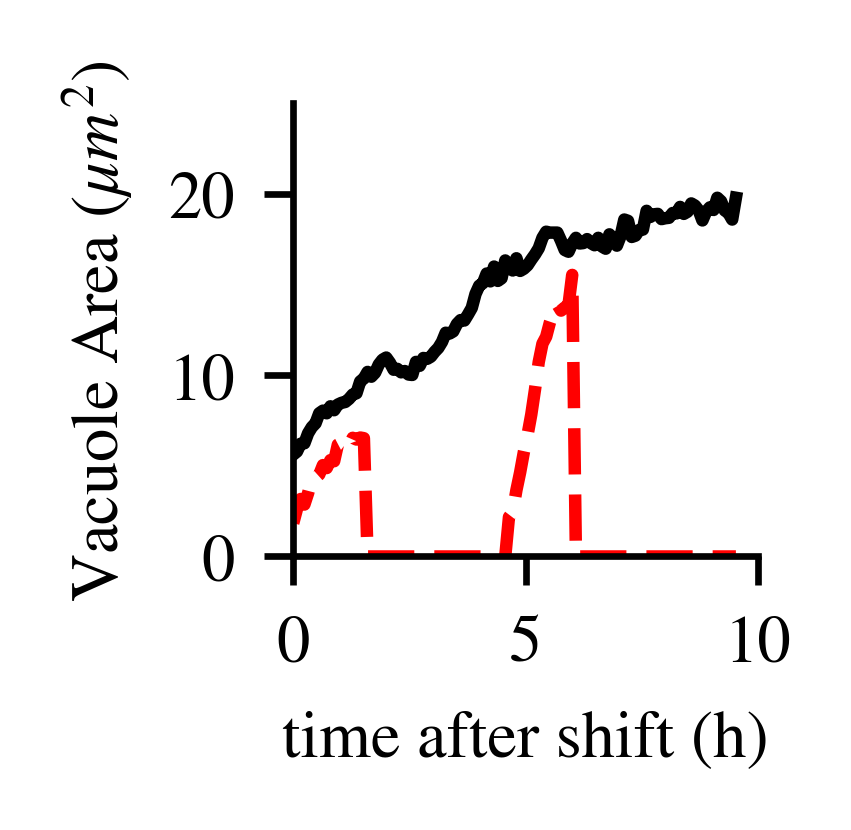

<Figure size 1980x1500 with 0 Axes>

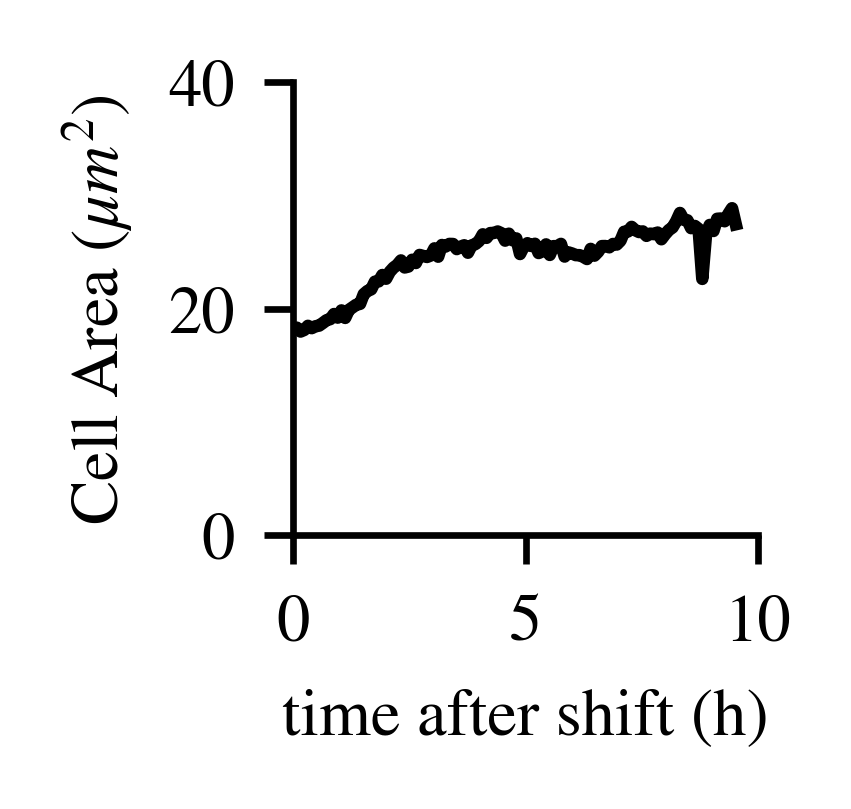

<Figure size 1980x1500 with 0 Axes>

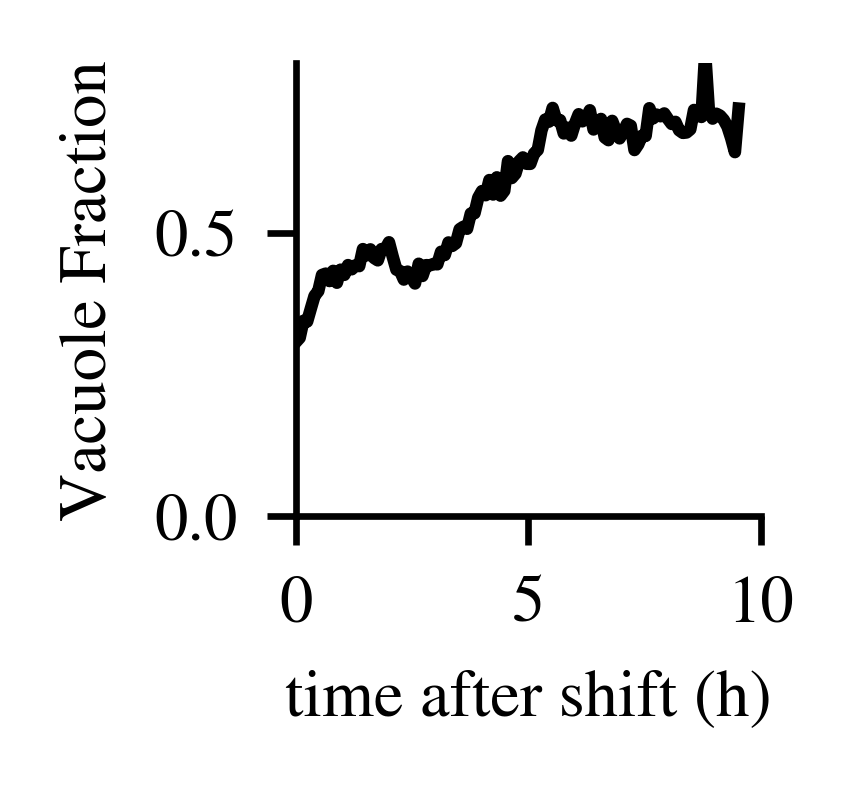

<Figure size 1980x1500 with 0 Axes>

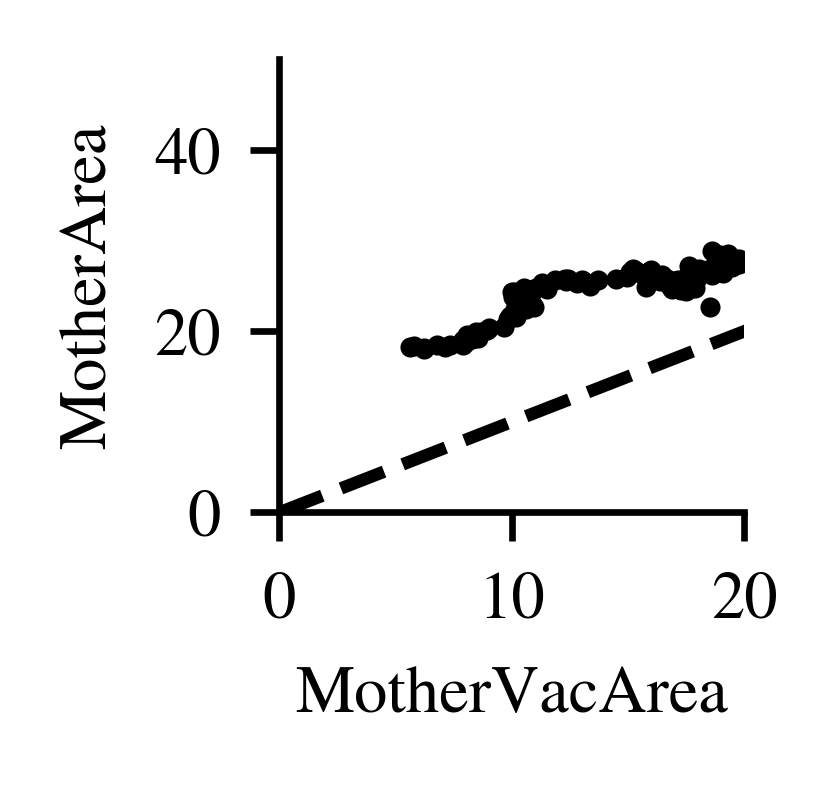

<Figure size 1980x1500 with 0 Axes>

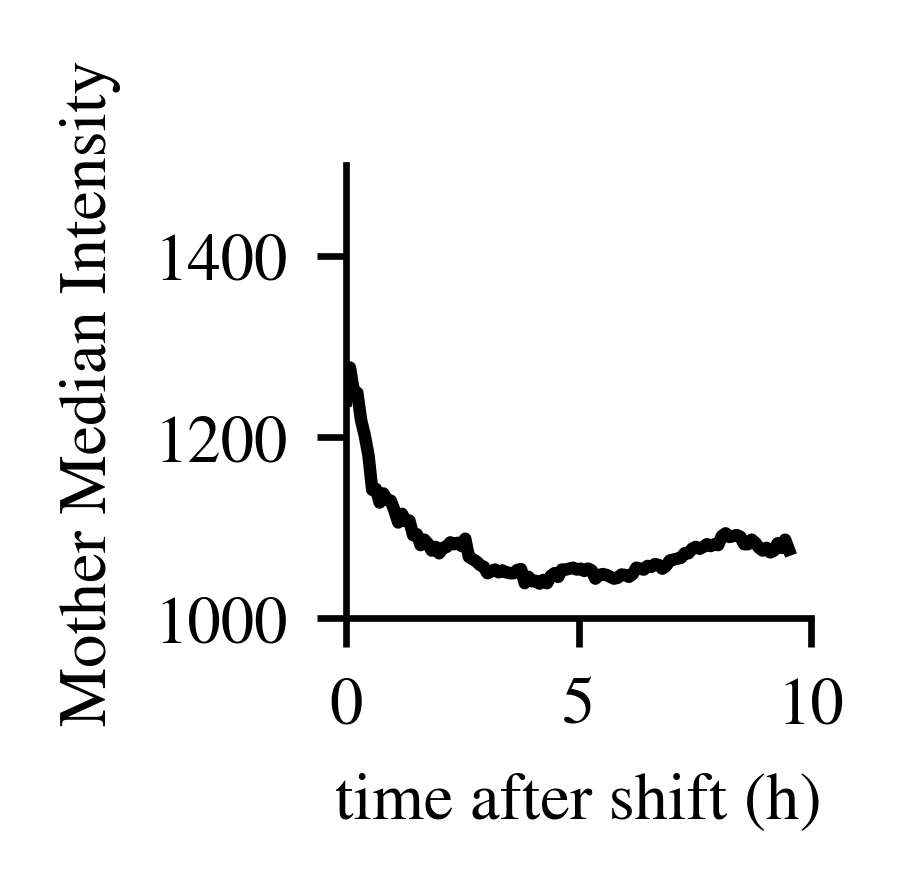

<Figure size 1980x1500 with 0 Axes>

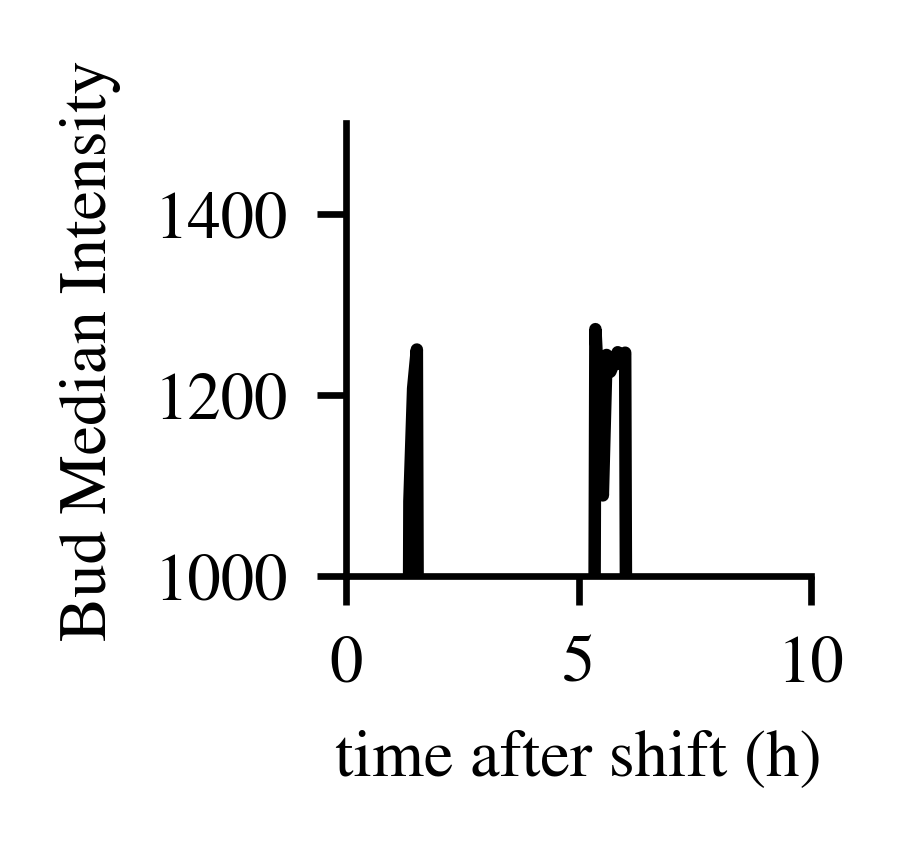

<Figure size 1980x1500 with 0 Axes>

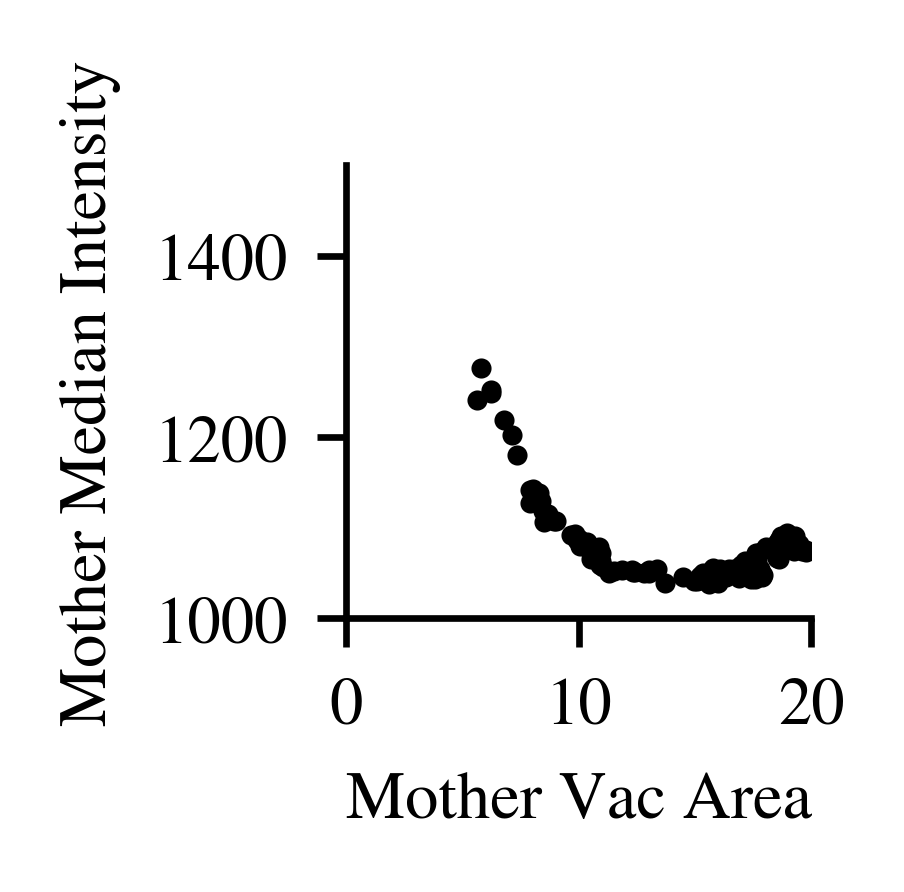

In [128]:
## Plotting data from the above CSVs
import scienceplots

plt.style.use("ieee")
df_mother_ROI3 =  pd.read_csv("/Users/saranshumale/Documents/Data/Vacuole/YNBD+various/2024.09.21/Scripts/mother_ROI3.csv")
df_mother_ROI3["MotherArea"] = 1/4*np.pi*df_mother_ROI3.MotherMajor*df_mother_ROI3.MotherMinor*0.155*0.155 #pixel size corresponding to 2by2 Fire
df_mother_ROI3["BudArea"] = 1/4*np.pi*df_mother_ROI3.BudMajor*df_mother_ROI3.BudMinor*0.155*0.155 #pixel size corresponding to 2by2 Fire

df_mother_ROI3["VacFrac_Cell"] = ((df_mother_ROI3.MotherVacVol+df_mother_ROI3.BudVacVol)/(df_mother_ROI3.MotherArea+df_mother_ROI3.BudArea))*0.155*0.155
df_mother_ROI3['VacFrac_Mother'] = ((df_mother_ROI3.MotherVacVol)/(df_mother_ROI3.MotherArea))*0.155*0.155
df_mother_ROI3['VacFrac_Bud'] = ((df_mother_ROI3.BudVacVol)/(df_mother_ROI3.BudArea))*0.155*0.155

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.plot(np.array(range(120))*0.08,(df_mother_ROI3["MotherVacVol"])*0.155*0.155)
ax.plot(np.array(range(120))*0.08,df_mother_ROI3["BudArea"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Vacuole Area ($\mu m^2$)")
plt.xlim([0,10])
plt.ylim([0,25])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.plot(np.array(range(120))*0.08,df_mother_ROI3["MotherArea"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Cell Area ($\mu m^2$)")
plt.xlim([0,10])
plt.ylim([0,40])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.plot(np.array(range(120))*0.08,df_mother_ROI3["VacFrac_Mother"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Vacuole Fraction")
plt.xlim([0,10])
plt.ylim([0,0.8])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.scatter(df_mother_ROI3["MotherVacVol"]*0.155*0.155,df_mother_ROI3["MotherArea"],s=2)
ax.plot(range(100),range(100),'--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("MotherVacArea")
plt.ylabel("MotherArea")
plt.xlim([0,20])
plt.ylim([0,50])


plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.plot(np.array(range(120))*0.08,df_mother_ROI3["MotherMedInt"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Mother Median Intensity")
plt.xlim([0,10])
plt.ylim([1000,1500])

plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.plot(np.array(range(120))*0.08,df_mother_ROI3["BudMedInt"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Bud Median Intensity")
plt.xlim([0,10])
plt.ylim([1000,1500])



plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
ax.scatter(df_mother_ROI3["MotherVacVol"]*0.155*0.155,df_mother_ROI3["MotherMedInt"],s=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Mother Vac Area")
plt.ylabel("Mother Median Intensity")
plt.xlim([0,20])
plt.ylim([1000,1500])



(10.0, 50.0)

<Figure size 1980x1500 with 0 Axes>

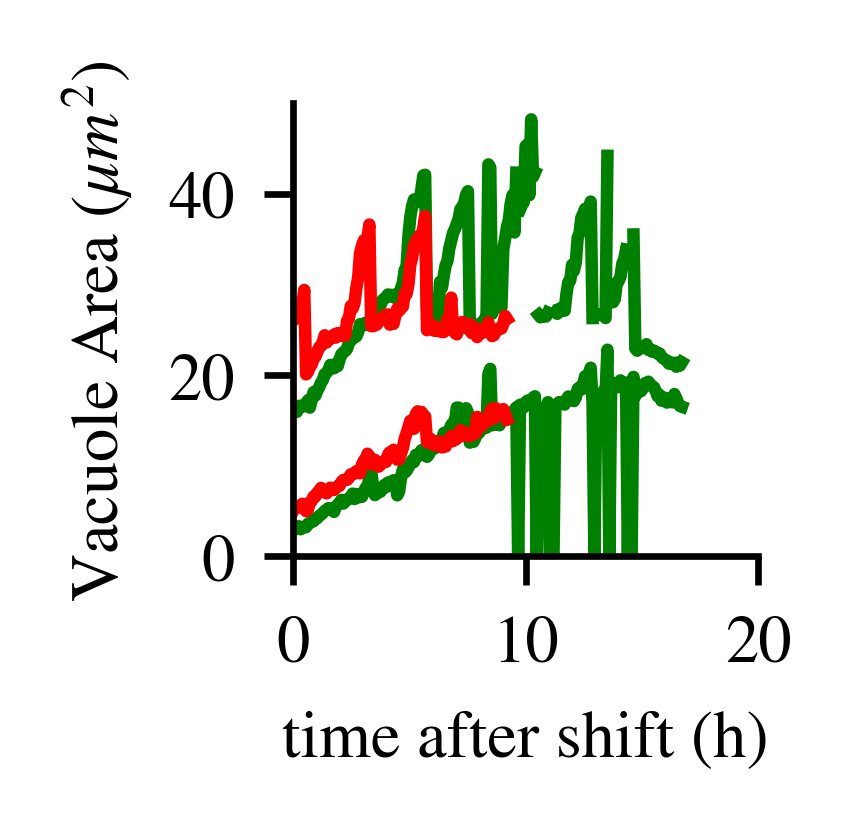

<Figure size 1980x1500 with 0 Axes>

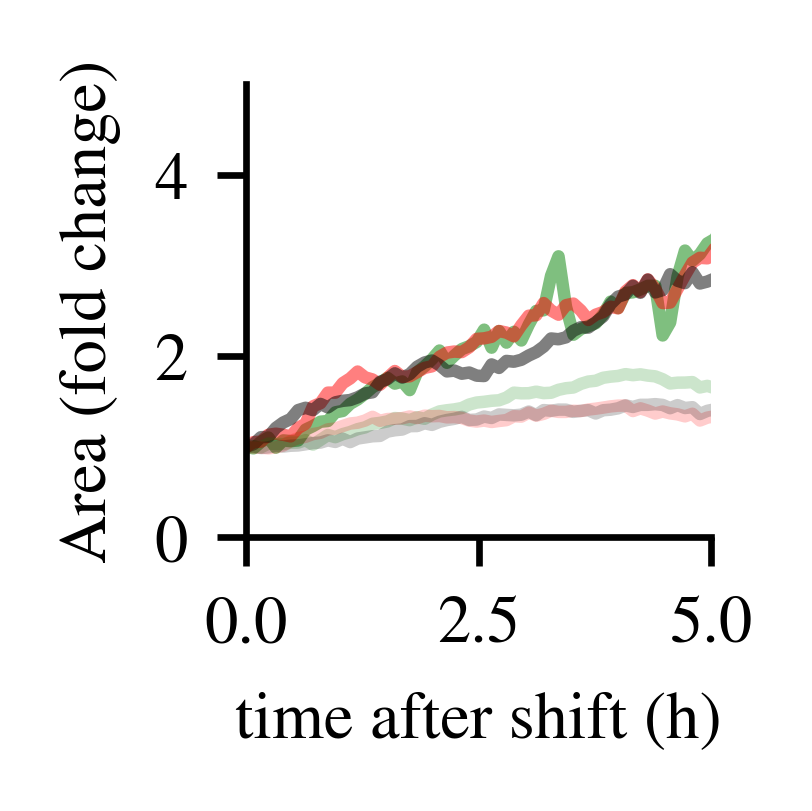

<Figure size 1980x1500 with 0 Axes>

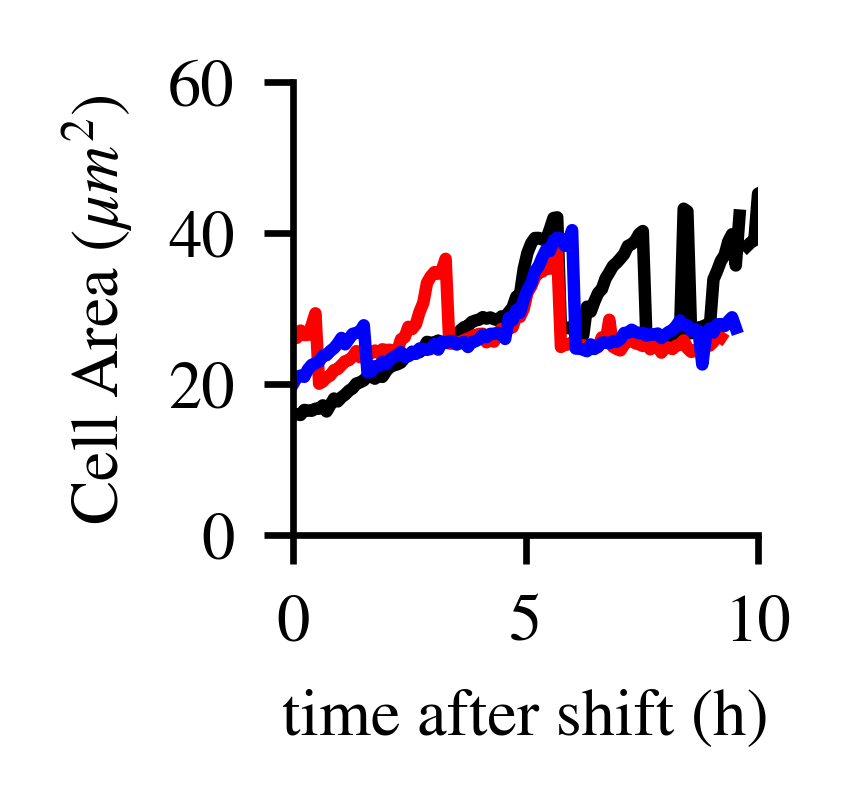

<Figure size 1980x1500 with 0 Axes>

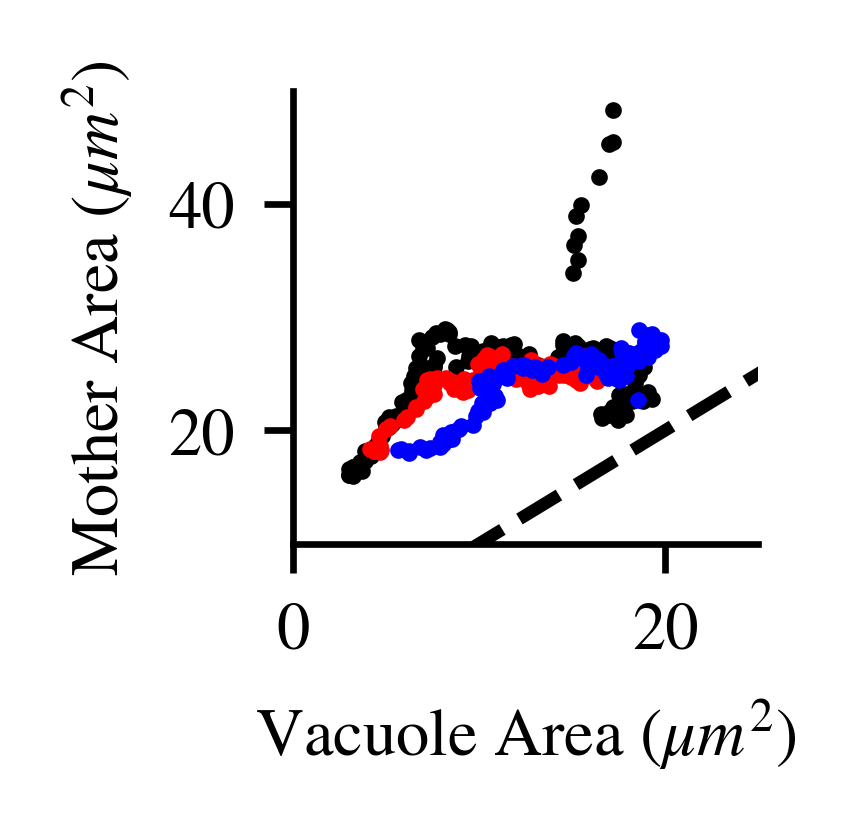

<Figure size 1980x1500 with 0 Axes>

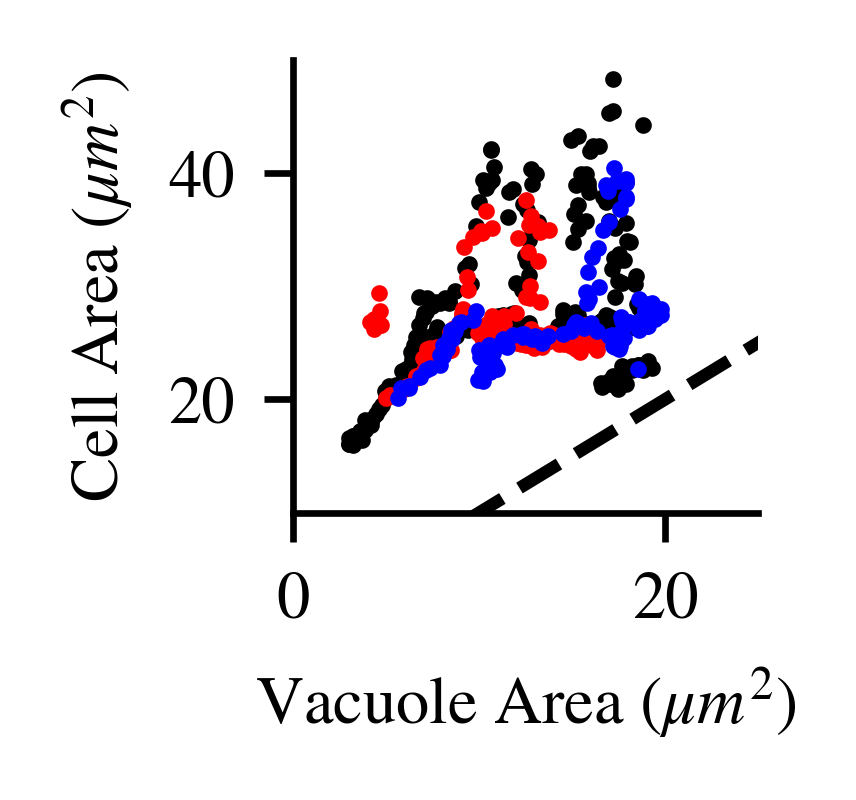

In [226]:
plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.plot(np.array(range(210))*0.08,(df_mother_ROI2["MotherVacVol"]+df_mother_ROI2["BudVacVol"])*0.155*0.155,'-',color='green')
ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherVacVol"]+df_mother_ROI1["BudVacVol"])*0.155*0.155,'-',color='red')
#ax.plot(np.array(range(120))*0.08,(df_mother_ROI3["MotherVacVol"]+df_mother_ROI3["BudVacVol"])*0.155*0.155,'-',color='black')

ax.plot(np.array(range(210))*0.08,(df_mother_ROI2["MotherArea"]+df_mother_ROI2["BudArea"]),'-',color='green')
ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherArea"]+df_mother_ROI1["BudArea"]),'-',color='red')
#ax.plot(np.array(range(120))*0.08,(df_mother_ROI3["MotherArea"]+df_mother_ROI3["BudArea"]),'-',color='black')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Vacuole Area ($\mu m^2$)")
plt.xlim([0,20])
plt.ylim([0,50])


#Cell and vac vol normalized
plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.plot(np.array(range(210))*0.08,(df_mother_ROI2["MotherVacVol"])/df_mother_ROI2["MotherVacVol"][0],'-',color='green',alpha=0.5)
ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherVacVol"])/df_mother_ROI1["MotherVacVol"][0],'-',color='red',alpha=0.5)
ax.plot(np.array(range(120))*0.08,(df_mother_ROI3["MotherVacVol"])/df_mother_ROI3["MotherVacVol"][0],'-',color='black',alpha=0.5)

ax.plot(np.array(range(210))*0.08,(df_mother_ROI2["MotherArea"])/df_mother_ROI2["MotherArea"][0],'-',color='green',alpha=0.2)
ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherArea"])/df_mother_ROI1["MotherArea"][0],'-',color='red',alpha=0.2)
ax.plot(np.array(range(120))*0.08,(df_mother_ROI3["MotherArea"])/df_mother_ROI3["MotherArea"][0],'-',color='black',alpha=0.2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Area (fold change)")
plt.xlim([0,5])
plt.ylim([0,5])



plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.plot(np.array(range(210))*0.08,(df_mother_ROI2["MotherArea"]+df_mother_ROI2["BudArea"]),'-')
ax.plot(np.array(range(116))*0.08,(df_mother_ROI1["MotherArea"]+df_mother_ROI1["BudArea"]),'-')
ax.plot(np.array(range(120))*0.08,(df_mother_ROI3["MotherArea"]+df_mother_ROI3["BudArea"]),'-')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("time after shift (h)")
plt.ylabel("Cell Area ($\mu m^2$)")
plt.xlim([0,10])
plt.ylim([0,60])



plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.scatter(df_mother_ROI2["MotherVacVol"]*0.155*0.155,(df_mother_ROI2["MotherArea"]),s=1)
ax.scatter(df_mother_ROI1["MotherVacVol"]*0.155*0.155,(df_mother_ROI1["MotherArea"]),s=1)
ax.scatter(df_mother_ROI3["MotherVacVol"]*0.155*0.155,(df_mother_ROI3["MotherArea"]),s=1)
ax.plot(range(100),range(100),'--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Vacuole Area ($\mu m^2$)")
plt.ylabel("Mother Area ($\mu m^2$)")
plt.xlim([0,25])
plt.ylim([10,50])


plt.figure()
fig,ax=plt.subplots(figsize=(1,1))
#ax.scatter(np.array(range(116))*0.08,df_mother_ROI1["MotherArea"])
ax.scatter(df_mother_ROI2["MotherVacVol"]*0.155*0.155,(df_mother_ROI2["MotherArea"]+df_mother_ROI2["BudArea"]),s=1)
ax.scatter(df_mother_ROI1["MotherVacVol"]*0.155*0.155,(df_mother_ROI1["MotherArea"]+df_mother_ROI1["BudArea"]),s=1)
ax.scatter(df_mother_ROI3["MotherVacVol"]*0.155*0.155,(df_mother_ROI3["MotherArea"]+df_mother_ROI3["BudArea"]),s=1)
ax.plot(range(100),range(100),'--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Vacuole Area ($\mu m^2$)")
plt.ylabel("Cell Area ($\mu m^2$)")
plt.xlim([0,25])
plt.ylim([10,50])




In [96]:
def cell_size_extractor(cleaned_mask):
    cell_sizes=[]; #should return [BudSize,MotherSize]
    dummy = cleaned_mask.astype("uint8")
    regions = regionprops(dummy)

    cell_size = []
    current_size = []

    for props in regions:
        
        volume=4/24*np.pi*props.major_axis_length*props.minor_axis_length*props.minor_axis_length*0.092*0.092*0.092

        cell_sizes.append(volume)
    

    #Finding mother and bud
    if len(cell_sizes)==1: #Mother only
        return [0,cell_sizes[0]]
    elif len(cell_sizes)==2: #Mother and Bud Present
        return [np.min(cell_sizes),np.max(cell_sizes)]
    else:
        print("More than two cell regions in this image!!!")
        
    
    

In [97]:
import numpy as np

image = cv2.imread("/Users/saranshumale/Documents/Data/MitoNetwork_Project/AgarPadAnalysis/Gal_ylb128/FOV1/Output/masks_cleaned/1/masks0060.tif",-1)
num = np.array(image).astype("uint8")
print(type(num))
print(cell_size_extractor(num))



<class 'numpy.ndarray'>
[27.802529457073863, 47.682844124381454]


In [37]:

#Segmenting the green vacuole hstacks

import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.filters import median
from skimage.morphology import disk

#os.mkdir(output_path+"green_otsu")

#Segment vacuoles using a Median filter followed by Otsu's thresholding
for i in range(508):
    f = cv2.imread(output_path+"/green_hstacks/"+str(i+1)+".tif",-1)
    image = np.array(f)
    med = median(image, disk(2))
    thresh = threshold_otsu(med)
    binary = med > thresh
    binary = binary.astype('uint8') #step critical to be able to read the file later
    binary[binary>0] =1 
    imwrite(output_path+"green_otsu"+'/'+str(i+1)+'.tif', binary)

In [38]:
f= cv2.imread(output_path+"/green_hstacks/"+str(1)+".tif",-1)

In [43]:
#mother - bud vac param extractor

#For strain SJSC33 - pH sensor

def vac_param_extractor(mask_path,vacseg_path,vac_green_path,vac_red_path):
    cleaned_mask = cv2.imread(mask_path,-1)
    cleaned_mask_arr = np.array(cleaned_mask)
    uniq = np.unique(cleaned_mask)
    if len(uniq)>2:
        a=np.array([cleaned_mask_arr==uniq[1]])
        b=np.array([cleaned_mask_arr==uniq[2]])

        if np.count_nonzero(a)>np.count_nonzero(b): # a is the mother
            cleaned_mask = cv2.imread(mask_path,-1)
            cleaned_mask_arr = np.array(cleaned_mask)
            mother_mask_arr = cleaned_mask_arr
            mother_mask_arr [mother_mask_arr==uniq[2]]=0


            cleaned_mask = cv2.imread(mask_path,-1)
            cleaned_mask_arr = np.array(cleaned_mask)
            bud_mask_arr = cleaned_mask_arr
            bud_mask_arr [bud_mask_arr==uniq[1]]=0

        else:
            cleaned_mask = cv2.imread(mask_path,-1) # a is bud
            cleaned_mask_arr = np.array(cleaned_mask)
            mother_mask_arr = cleaned_mask_arr
            mother_mask_arr [mother_mask_arr==uniq[1]]=0

            cleaned_mask = cv2.imread(mask_path,-1)
            cleaned_mask_arr = np.array(cleaned_mask)
            bud_mask_arr = cleaned_mask_arr
            bud_mask_arr [bud_mask_arr==uniq[2]]=0

    #cell masking vacuole images whose background has been removed by using mito segmentation as masks
        bud_mask_arr[bud_mask_arr>0]=1 #this is our bud mask
        mother_mask_arr[mother_mask_arr>0]=1 #this is our mother mask
        vac_segmented=np.array(cv2.imread(vacseg_path,-1))
        vac_segmented[vac_segmented>0]=1 #so we can use this as a mask without changing pixel values of the input image
        vac_noised_green = np.array(cv2.imread(vac_green_path,-1))
        vac_noised_red = np.array(cv2.imread(vac_red_path,-1))


       #For bg subtraction
        bg_green = np.random.normal(807,8.4,size=np.shape(vac_noised_green))
        bg_red = np.random.normal(809,8.8,size=np.shape(vac_noised_red))

        vac_of_interest_green = np.multiply(vac_segmented,vac_noised_green-bg_green)
        vac_of_interest_red = np.multiply(vac_segmented,vac_noised_red-bg_red)
        
        mother_mask_hstack = mother_mask_arr
        bud_mask_hstack = bud_mask_arr

        for i in range(65):
            mother_mask_hstack = np.hstack((mother_mask_hstack,mother_mask_arr))
            bud_mask_hstack = np.hstack((bud_mask_hstack,bud_mask_arr))    
        
        
        
        mother_vac_green = np.multiply(mother_mask_hstack,vac_of_interest_green) #mother mito with zero background
        bud_vac_green = np.multiply(bud_mask_hstack,vac_of_interest_green) #mother mito with zero background

        mother_vac_red = np.multiply(mother_mask_hstack,vac_of_interest_red) #mother mito with zero background
        bud_vac_red = np.multiply(bud_mask_hstack,vac_of_interest_red) #mother mito with zero background


        vac_segmented=np.array(cv2.imread(vacseg_path,-1))
        mother_vac_segmented = np.multiply(mother_mask_hstack,vac_segmented) #mother mito with zero background
        vac_segmented=np.array(cv2.imread(vacseg_path,-1))
        bud_vac_segmented = np.multiply(bud_mask_hstack,vac_segmented) #mother mito with zero background
        
        #doing statistics, i.e putting intensities in a linear array and excluding zeros
        linear_mother_vac_green=[]
        linear_bud_vac_green=[]
        linear_mother_vac_red=[]
        linear_bud_vac_red=[]

        #Sifting through the 2d array and putting non_zero values in a list

        for (i,j), value in np.ndenumerate(mother_vac_green):    #mother extraction
            if value!=0:
                linear_mother_vac_green.append(value)

        for (i,j), value in np.ndenumerate(bud_vac_green):     # bud extraction
            if value!=0:
                linear_bud_vac_green.append(value)


        for (i,j), value in np.ndenumerate(mother_vac_red):    #mother extraction
            if value!=0:
                linear_mother_vac_red.append(value)

        for (i,j), value in np.ndenumerate(bud_vac_red):     # bud extraction
            if value!=0:
                linear_bud_vac_red.append(value)

        mother_GR_ratio = np.array(linear_mother_vac_green)/np.array(linear_mother_vac_red)
        bud_GR_ratio = np.array(linear_bud_vac_green)/np.array(linear_bud_vac_red)

        return({'MotherVacVol':np.count_nonzero(mother_vac_segmented) , 'BudVacVol':np.count_nonzero(bud_vac_segmented) , 'Bud_Median_GreenIntensity':np.nanmedian(linear_bud_vac_green),'Mother_Median_GreenIntensity':np.nanmedian(linear_mother_vac_green),'Bud_Median_RedIntensity':np.nanmedian(linear_bud_vac_red),'Mother_Median_RedIntensity':np.nanmedian(linear_mother_vac_red),'Bud_Std_GreenIntensity':np.std(linear_bud_vac_green),'Mother_Std_GreenIntensity':np.std(linear_mother_vac_green),'Bud_Std_RedIntensity':np.std(linear_bud_vac_red),'Mother_Std_RedIntensity':np.std(linear_mother_vac_red),'MotherRatio_Median':np.nanmedian(mother_GR_ratio),'MotherRatio_Std':np.std(mother_GR_ratio),'BudRatio_Median':np.nanmedian(bud_GR_ratio),'BudRatio_Std':np.std(bud_GR_ratio)} )
    
    else: # Only mother present / G1 cells
        cleaned_mask = cv2.imread(mask_path,-1)
        cleaned_mask_arr = np.array(cleaned_mask)
        mother_mask_arr = cleaned_mask_arr
        mother_mask_arr[mother_mask_arr>0]=1 #this is our mother mask
        
        vac_segmented=np.array(cv2.imread(vacseg_path,-1)) #segmented vacuole
        vac_segmented[vac_segmented>0]=1 #so we can use this as a mask without changing pixel values of the input image
        
        vac_noised_green = np.array(cv2.imread(vac_green_path,-1))
        vac_noised_red = np.array(cv2.imread(vac_red_path,-1))
        
        #For bg subtraction
        bg_green = np.random.normal(807,8.4,size=np.shape(vac_noised_green))
        bg_red = np.random.normal(809,8.8,size=np.shape(vac_noised_red))

        vac_of_interest_green = np.multiply(vac_segmented,vac_noised_green-bg_green)
        vac_of_interest_red = np.multiply(vac_segmented,vac_noised_red-bg_red)
        
        #make a mother mask hstack with same dimensions as the vacuole hstack
        mother_mask_hstack = mother_mask_arr
        for i in range(65):
            mother_mask_hstack = np.hstack((mother_mask_hstack,mother_mask_arr))


        mother_vac_green = np.multiply(mother_mask_hstack,vac_of_interest_green) #mother mito with zero background
        mother_vac_red = np.multiply(mother_mask_hstack,vac_of_interest_red) #mother mito with zero background

        
        vac_segmented=np.array(cv2.imread(vacseg_path,-1))
        mother_vac_segmented = np.multiply(mother_mask_hstack,vac_segmented) #mother mito with zero background
        
        linear_mother_vac_green=[]
        linear_mother_vac_red=[]

        #Sifting through the 2d array and putting non_zero values in a list

        for (i,j), value in np.ndenumerate(mother_vac_green):    #mother extraction
            if value!=0:
                linear_mother_vac_green.append(value)

   

        for (i,j), value in np.ndenumerate(mother_vac_red):    #mother extraction
            if value!=0:
                linear_mother_vac_red.append(value)

        mother_GR_ratio = np.array(linear_mother_vac_green)/np.array(linear_mother_vac_red)






        return({'MotherVacVol':np.count_nonzero(mother_vac_segmented) , 'BudVacVol':0 , 'Bud_Median_GreenIntensity':np.nan,'Mother_Median_GreenIntensity':np.nanmedian(linear_mother_vac_green),'Bud_Median_RedIntensity':np.nan,'Mother_Median_RedIntensity':np.nanmedian(linear_mother_vac_red),'Bud_Std_GreenIntensity':np.nan,'Mother_Std_GreenIntensity':np.std(linear_mother_vac_green),'Bud_Std_RedIntensity':np.nan,'Mother_Std_RedIntensity':np.std(linear_mother_vac_red),'MotherRatio_Median':np.nanmedian(mother_GR_ratio),'MotherRatio_Std':np.std(mother_GR_ratio)} )



In [44]:
import pandas as pd

#CSV files for cell and organelle params
cell_index = 0
output = pd.DataFrame()
for i in range(number_of_FOVs):

    roi_tuples = extract_roi_coordinates(roi_path+'/fov'+str(i+2)+'.zip'); 
    l = len(roi_tuples)
    for j in range(l):

        #Go through each ROI
        
        try:
            #Bud and Mother Size Estimation and Extraction
            mask_image = cv2.imread(output_path+"masks_cleaned/"+str(cell_index+1)+".tif",-1)
            mask_array = np.array(mask_image)
            regions = regionprops(mask_array)
            cell_size = []
            current_size = []
            for props in regions:
                y0, x0 = props.centroid
                orientation = props.orientation
                x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
                y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
                x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
                y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length
            
                minr, minc, maxr, maxc = props.bbox
                bx = (minc, maxc, maxc, minc, minc)
                by = (minr, minr, maxr, maxr, minr)
                current_size.append([props.major_axis_length,props.minor_axis_length])
            
            if len(current_size)==1:
                mother_major = current_size[0][0]
                mother_minor = current_size[0][1]
                bud_major = 0
                bud_minor = 0
            elif len(current_size)==2:
                if current_size[0][0]*current_size[0][1]>current_size[1][0]*current_size[1][1]:
                    mother_major = current_size[0][0]
                    mother_minor = current_size[0][1]
                    bud_major = current_size[1][0]
                    bud_minor = current_size[1][1]
                
                else:
                    mother_major = current_size[1][0]
                    mother_minor = current_size[1][1]
                    bud_major = current_size[0][0]
                    bud_minor = current_size[0][1]
            else:
                mother_major = np.nan
                mother_minor =np.nan
                bud_major = np.nan
                bud_minor = np.nan

            size_params = {"MotherMajor":mother_major,"MotherMinor":mother_minor,"BudMinor":bud_minor,"BudMajor":bud_major}

            #Bud and Mother Mito Size Estimation and Extraction
            mask_path = output_path+"masks_cleaned/"+str(cell_index+1)+".tif"
            vacseg_path = output_path + "green_otsu/" + str(cell_index+1)+".tif"
            vac_green_path = output_path + "green_hstacks/" + str(cell_index+1)+".tif"
            vac_red_path = output_path + "red_hstacks/" + str(cell_index+1)+".tif"
            vac_params = vac_param_extractor(mask_path,vacseg_path,vac_green_path,vac_red_path)
            params = {**size_params,**vac_params}
            #print(output)
            df_dictionary = pd.DataFrame([params])
            output = pd.concat([output, df_dictionary], ignore_index=True)
            output.to_csv(str("proline_26")+".csv")
        except Exception as e:
            print(e)
                
        #print(output)
        cell_index+=1

/opt/anaconda3/envs/BPy_v1/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/BPy_v1/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/BPy_v1/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/envs/BPy_v1/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/envs/BPy_v1/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/BPy_v1/lib/python3.10/site-pac

In [42]:
print(cell_index)

508


In [34]:
from tifffile import imread
f= imread("/Volumes/SJs_SSD/WI24/AgarosePads/2024.03.23/20240323_YBDP4mM_OD0.26_5/output/green_otsu/1.tif")
np.min(f)

False

[1.3444444444444443, 33.422222222222224, 2.6111111111111107, 27.200000000000003, 2.933333333333333, 11.433333333333332, 1.7000000000000002, 4.622222222222223, 2.022222222222222, 1.8000000000000005, 1.4, 1.1111111111111112, 8.0, 13.166666666666668, 15.311111111111112, 8.61111111111111, 24.25]
[4.888888888888889, 5.066666666666666, 3.0666666666666673, 38.644444444444446, 3.466666666666667, 6.166666666666667, 3.4444444444444446, 4.333333333333334, 1.25, 1.8333333333333335, 2.566666666666667, 1.1111111111111112, 4.800000000000001, 352.00000000000006, 33.15, 5.127777777777778, 6.222222222222222]


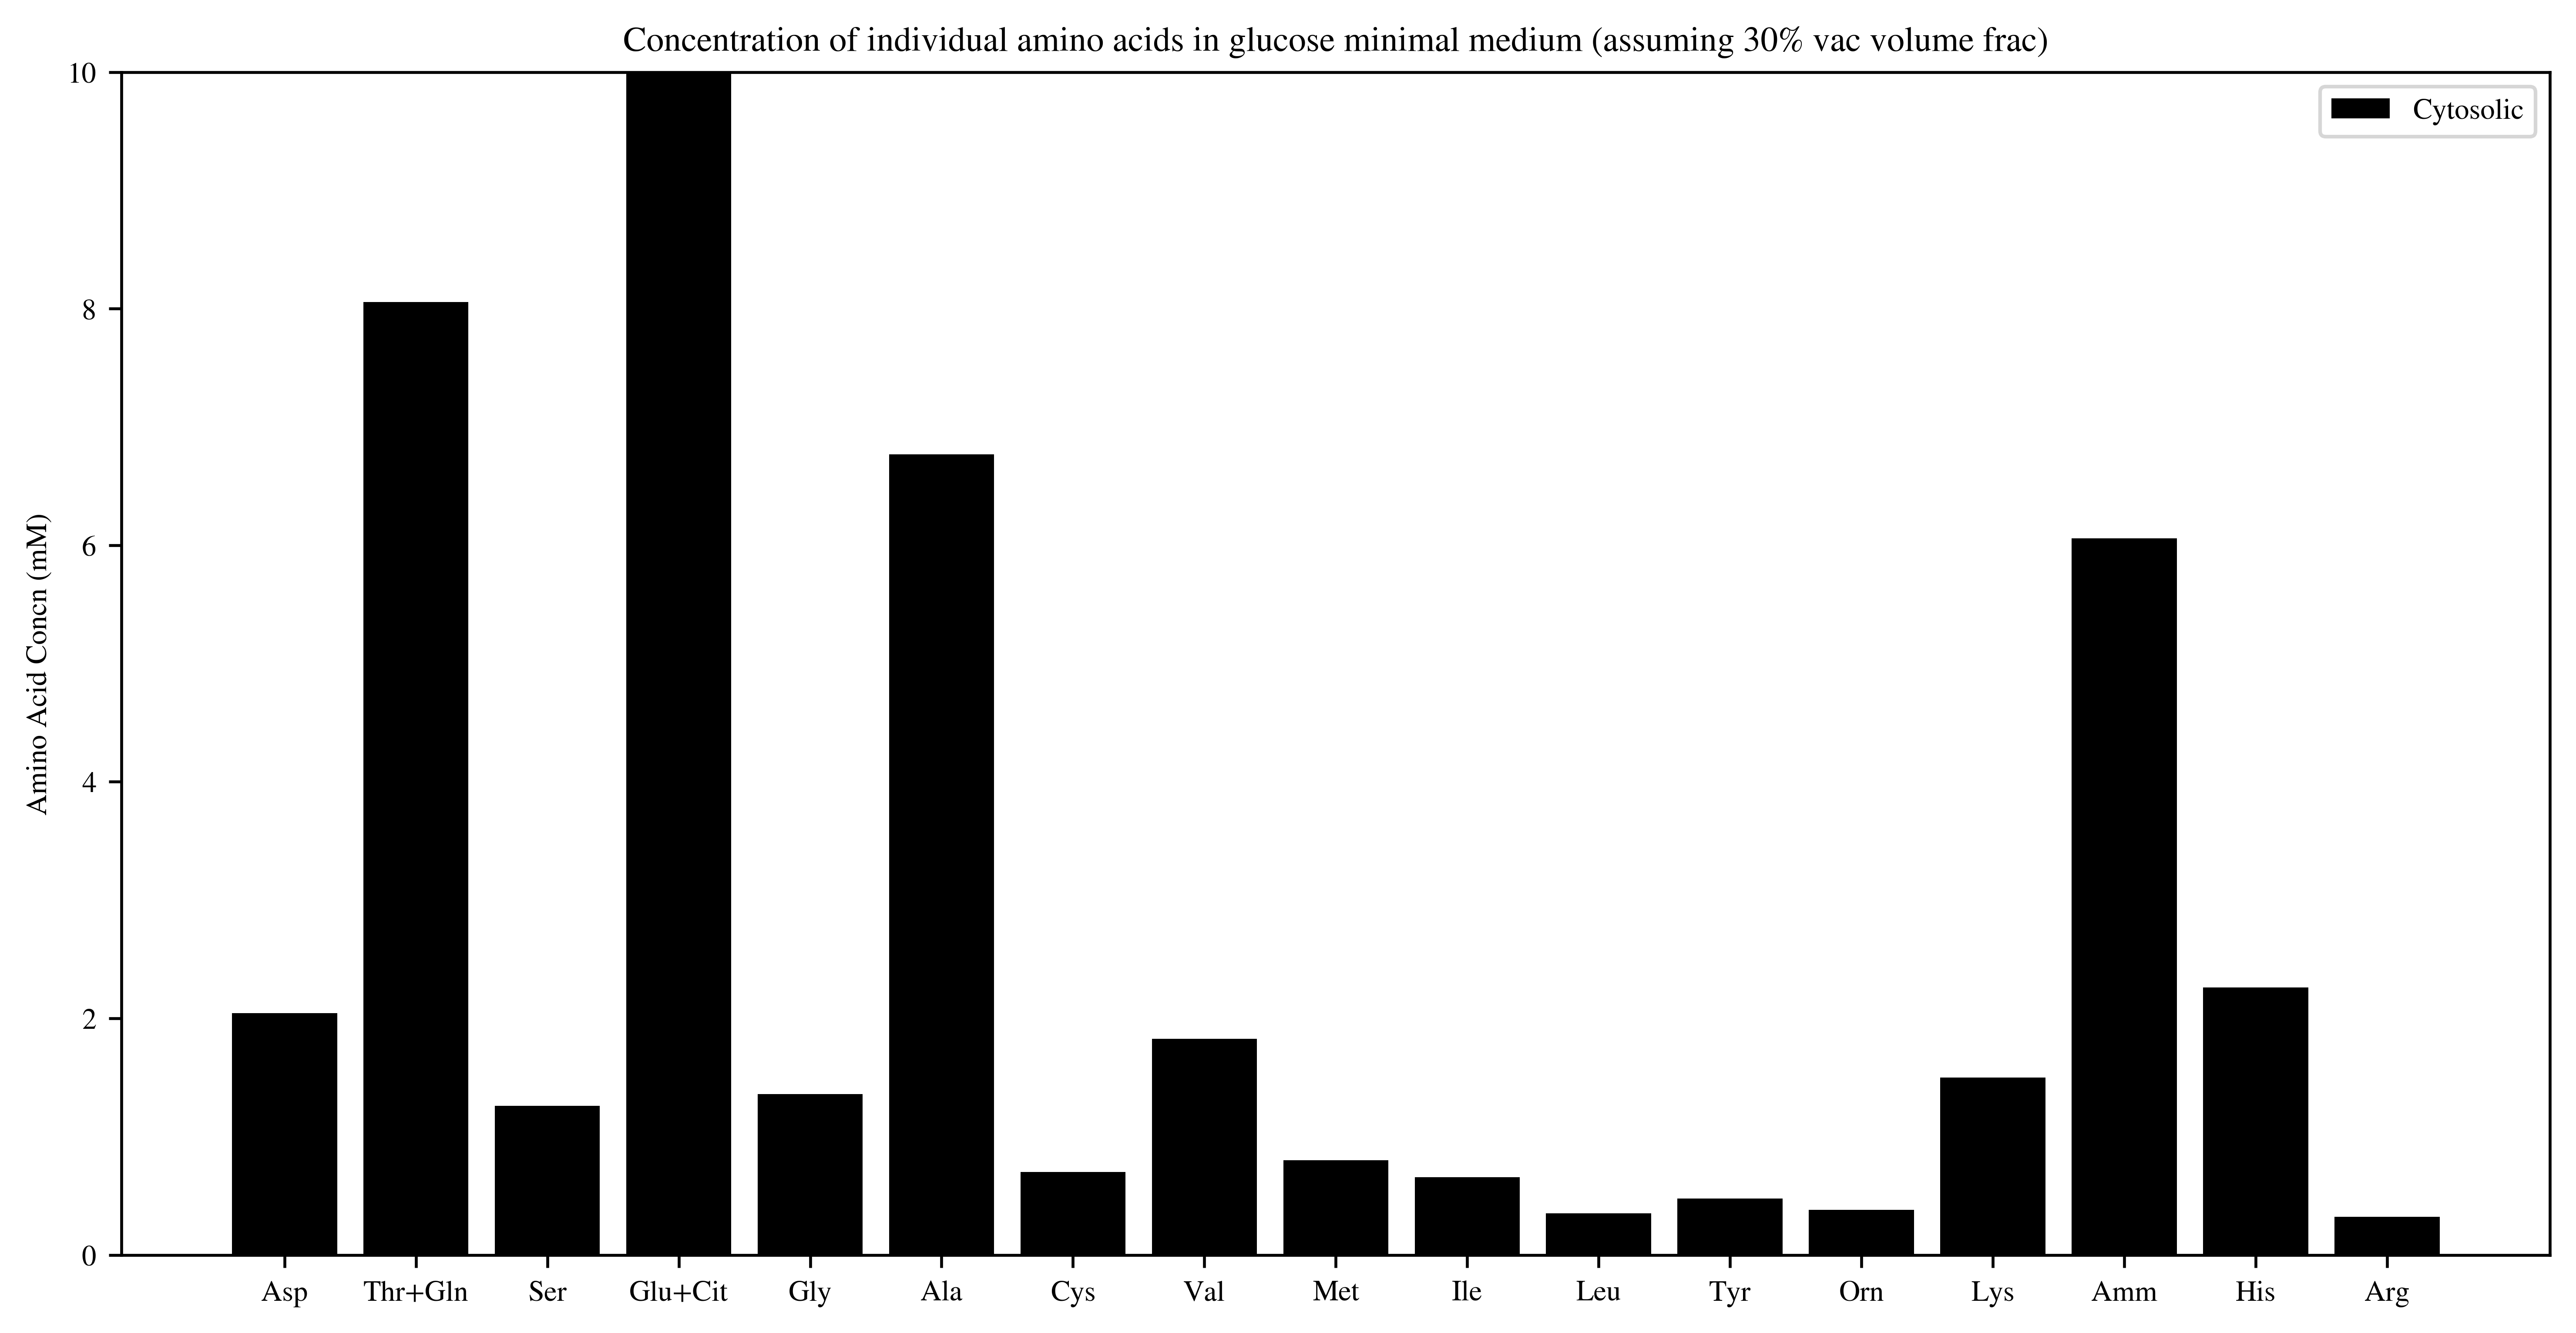

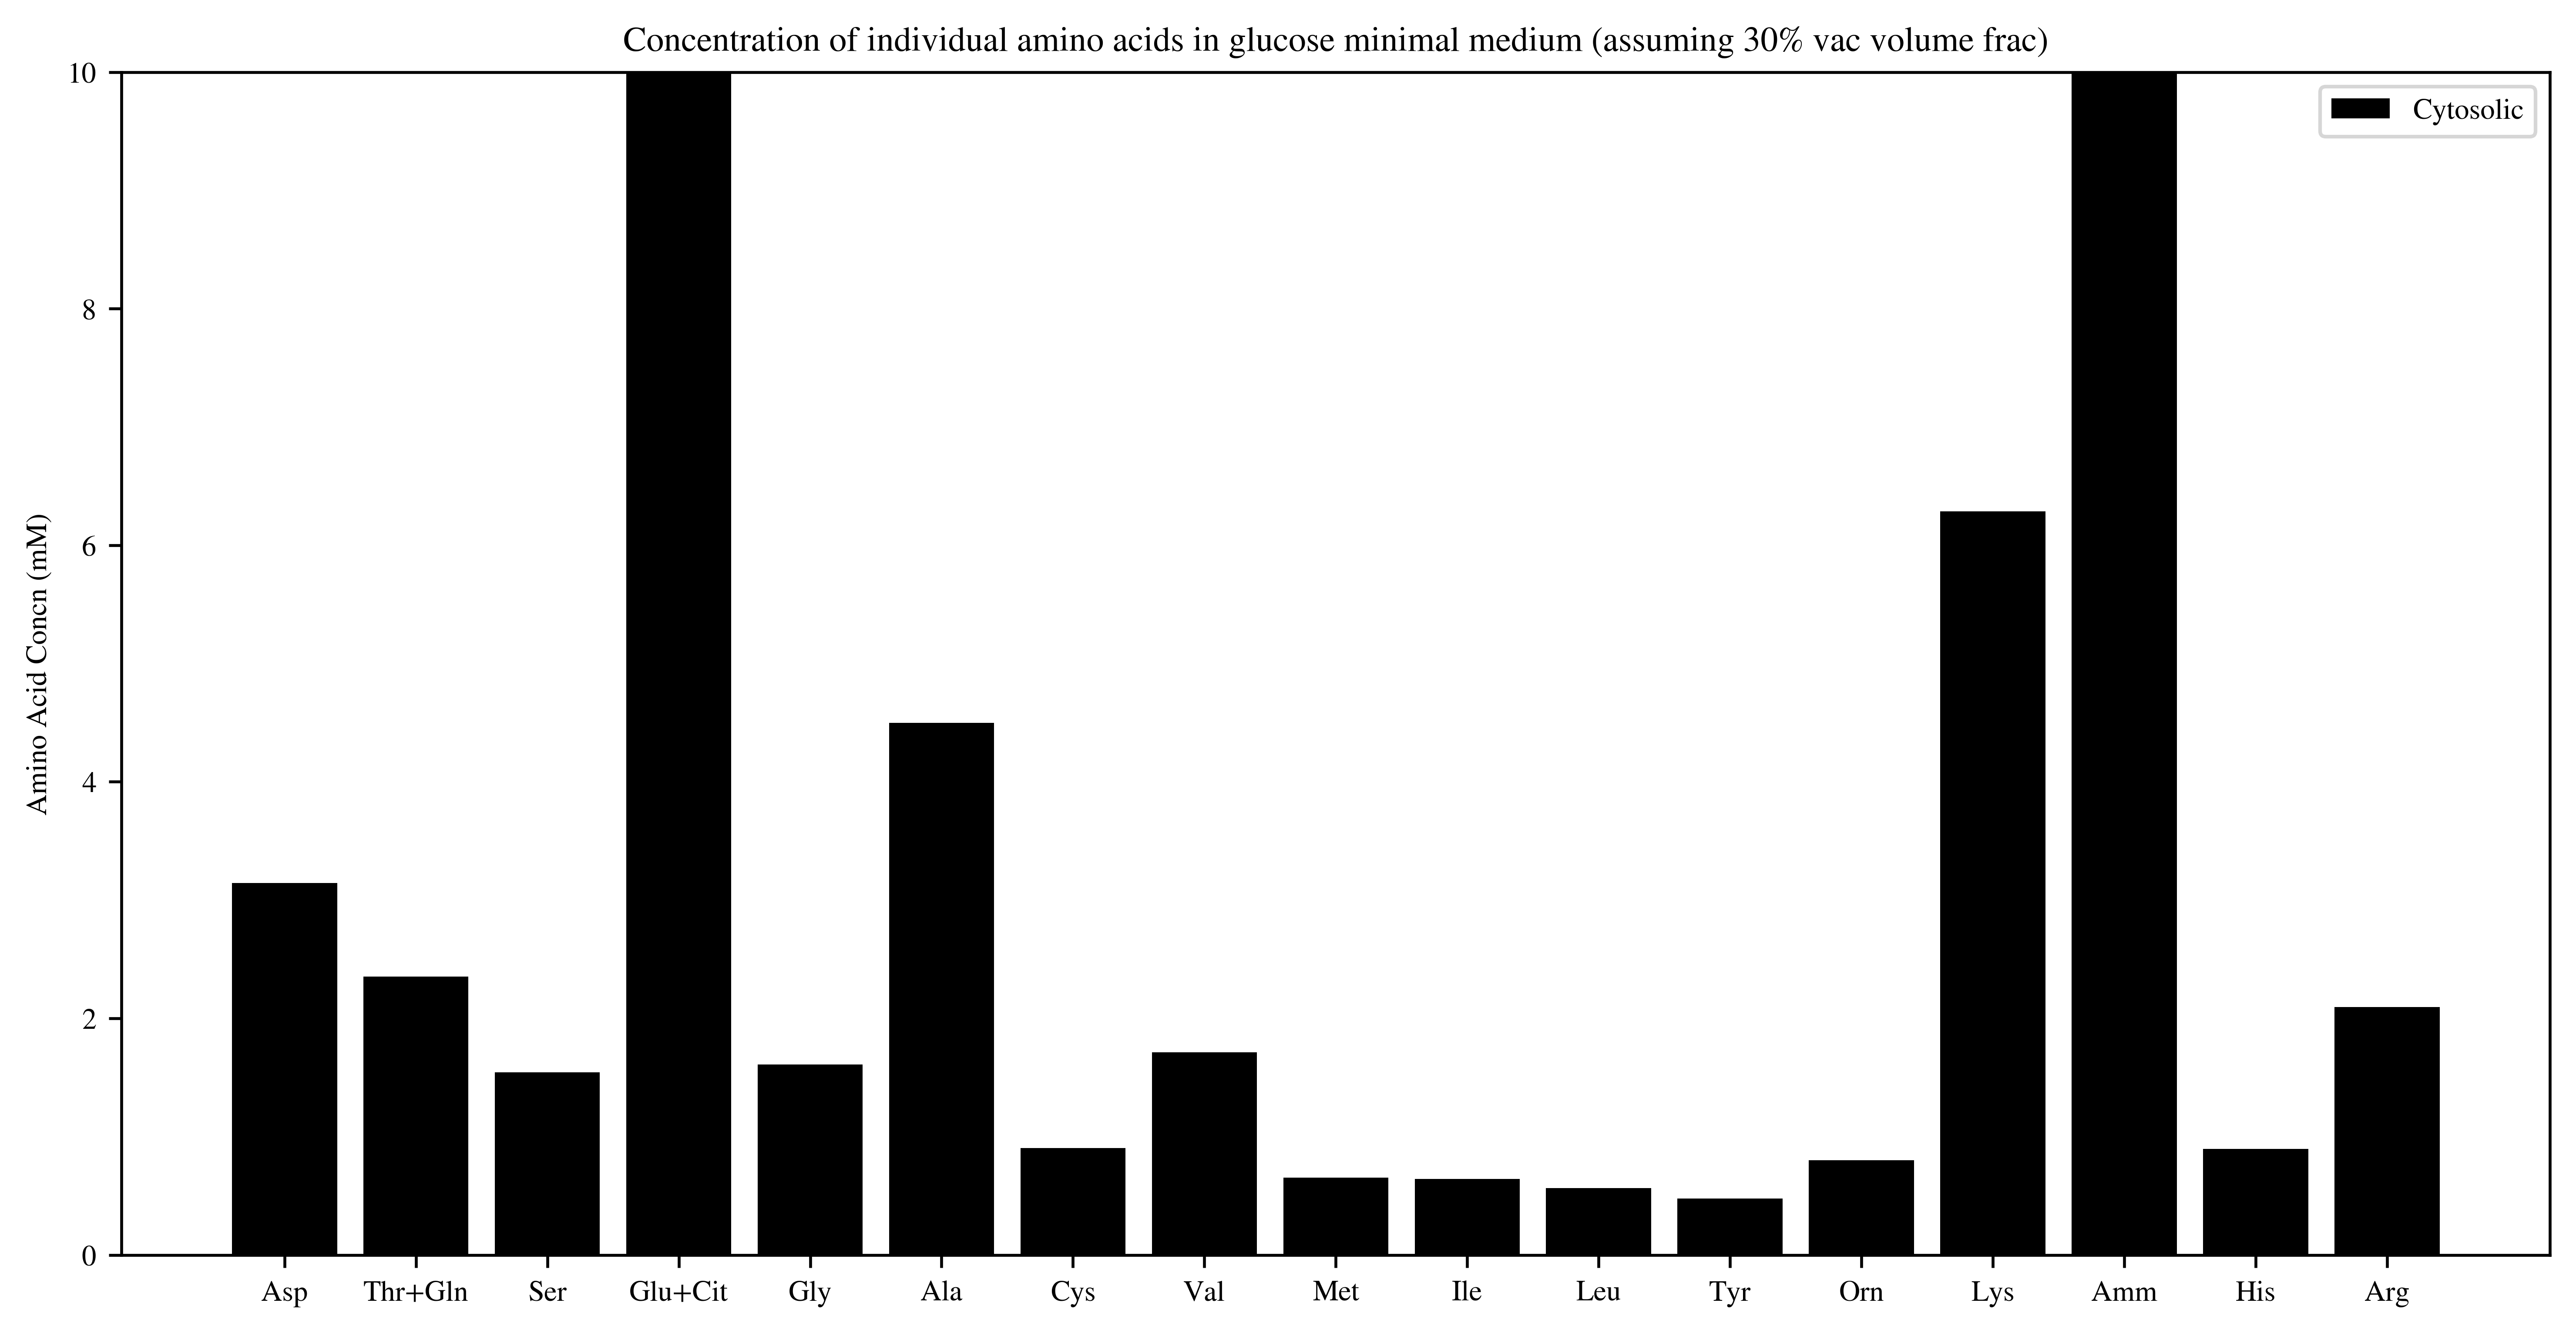

In [219]:
def conc_spitter(total_pool,fraction_vacuolar,phiv):
    cytosolic_concn = total_pool*(1-fraction_vacuolar)*0.01/((1-phiv)*60)
    vacuolar_conc = total_pool*(fraction_vacuolar)*0.01/(phiv*60)
    
    return([cytosolic_concn*1000,vacuolar_conc*1000])


cyto=[]
vac=[]
total_pool = [11,94,10,144,11,49,6,16,7,6,4,4,16,30,53,25,45]
fraction_vacuolar = [0.22,0.64,0.47,0.34,0.48,0.42,0.51,0.52,0.52,0.54,0.63,0.50,0.90,0.79,0.52,0.62,0.97]
for i in range(17):
    cyto.append(conc_spitter(total_pool[i],fraction_vacuolar[i],0.3)[0])
    vac.append(conc_spitter(total_pool[i],fraction_vacuolar[i],0.3)[1])

plt.figure(figsize=(12,6))
plt.bar(['Asp',"Thr+Gln",'Ser','Glu+Cit','Gly','Ala','Cys','Val','Met','Ile','Leu','Tyr','Orn','Lys','Amm','His','Arg'],cyto,label="Cytosolic")
plt.ylim([0,10])
plt.ylabel("Amino Acid Concn (mM)")
plt.title("Concentration of individual amino acids in glucose minimal medium (assuming 30% vac volume frac)")
plt.legend()
print(vac)


cyto=[]
vac=[]
total_pool = [22,19,12,148,13,30,10,15,5,6,7,4,12,660,117,13,20]
fraction_vacuolar = [0.4,0.48,0.46,0.47,0.48,0.37,0.62,0.52,0.45,0.55,0.66,0.5,0.72,0.96,0.51,0.71,0.56]
for i in range(17):
    cyto.append(conc_spitter(total_pool[i],fraction_vacuolar[i],0.3)[0])
    vac.append(conc_spitter(total_pool[i],fraction_vacuolar[i],0.3)[1])

plt.figure(figsize=(12,6))
plt.bar(['Asp',"Thr+Gln",'Ser','Glu+Cit','Gly','Ala','Cys','Val','Met','Ile','Leu','Tyr','Orn','Lys','Amm','His','Arg'],cyto,label="Cytosolic")
plt.ylim([0,10])
plt.ylabel("Amino Acid Concn (mM)")
plt.title("Concentration of individual amino acids in glucose minimal medium (assuming 30% vac volume frac)")
plt.legend()
print(vac)
